# **Import dataset/libraries**

In [1]:
!pip install contractions
!pip install -U nltk
!pip install pandas
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [3]:
import numpy as np # import numpy
import pandas as pd # import pandas
import re
import string
from collections import Counter

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

import warnings
warnings.filterwarnings(action = 'ignore')

In [4]:
reviews = pd.read_csv("/kaggle/input/employee-reviews-with-star-ratings/employee_reviews.csv", encoding= 'unicode_escape')
reviews.head(5)

dates                                   job-title  \
0   Oct 15, 2017       Current Employee - Program Manager II   
1   Aug 15, 2017       Current Employee - Anonymous Employee   
2    Sep 5, 2017       Current Employee - Anonymous Employee   
3   Mar 19, 2016                Former Employee - Specialist   
4    Nov 3, 2017  Current Employee - Senior Technical Writer   

                                             summary  \
0                                 My Stint at Amazon   
1                          Software Developer Intern   
2                                             QAE-II   
3                               Part Time Specialist   
4  A great place for Technical Writers/Programmin...   

                                           pros&cons  overall-ratings  \
0  * Learning Opportunities * Growth Opportunitie...              4.0   
1  Nice work culture. Projects have scale of real...              4.0   
2  Good Work culture.. Flexi timings... ---------...              4.0   
3                                                NaN              4.0   
4  - A growing team - as Amazon adds new web serv...              5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                  3                    4                          5   
1               none                 none                       none   
2               none                    4                       none   
3                  5                    5                          3   
4                  5                    5                          4   

  comp-benefit-stars senior-mangemnet-stars  
0                  4                      4  
1               none                   none  
2               none                   none  
3                  5                      5  
4                  4                      4

In [5]:
reviews['pros&cons'].replace('', np.nan, inplace=True)

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65640 entries, 0 to 65639
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dates                       65640 non-null  object 
 1   job-title                   65640 non-null  object 
 2   summary                     65520 non-null  object 
 3   pros&cons                   64665 non-null  object 
 4   overall-ratings             65639 non-null  float64
 5   work-balance-stars          65639 non-null  object 
 6   culture-values-stars        65639 non-null  object 
 7   carrer-opportunities-stars  65638 non-null  object 
 8   comp-benefit-stars          65638 non-null  object 
 9   senior-mangemnet-stars      65638 non-null  object 
dtypes: float64(1), object(9)
memory usage: 5.0+ MB


In [7]:
# To drop all null or missing values

reviews_na = reviews.dropna()
reviews_na.head()

dates                                   job-title  \
0   Oct 15, 2017       Current Employee - Program Manager II   
1   Aug 15, 2017       Current Employee - Anonymous Employee   
2    Sep 5, 2017       Current Employee - Anonymous Employee   
4    Nov 3, 2017  Current Employee - Senior Technical Writer   
5   Jun 29, 2014   Current Employee - Cloud Support Engineer   

                                             summary  \
0                                 My Stint at Amazon   
1                          Software Developer Intern   
2                                             QAE-II   
4  A great place for Technical Writers/Programmin...   
5                                Great place to work   

                                           pros&cons  overall-ratings  \
0  * Learning Opportunities * Growth Opportunitie...              4.0   
1  Nice work culture. Projects have scale of real...              4.0   
2  Good Work culture.. Flexi timings... ---------...              4.0   
4  - A growing team - as Amazon adds new web serv...              5.0   
5  So many pros, I'll do this bullet point style ...              5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                  3                    4                          5   
1               none                 none                       none   
2               none                    4                       none   
4                  5                    5                          4   
5                  5                    4                          5   

  comp-benefit-stars senior-mangemnet-stars  
0                  4                      4  
1               none                   none  
2               none                   none  
4                  4                      4  
5                  4                      5

In [8]:
reviews_na.describe()

overall-ratings
count     64545.000000
mean          3.827330
std           1.154445
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000

In [9]:
reviews_na.shape

(64545, 10)

In [10]:
def wc(data):
    plt.figure(figsize=(18,15))
    wc = WordCloud(min_font_size=3,max_words=1000,width=1600,height=720,
                       colormap = 'Set2', background_color='white').generate(' '.join(data))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')

In [11]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [12]:
#remove special characters from pros&cons column
reviews_na['pros&cons'] = reviews_na['pros&cons'].str.replace('\W', ' ', regex=True)

In [13]:
#Removed contractions and tokenized

import contractions
reviews_na['contract_removed'] = reviews_na['pros&cons'].apply(lambda x: [contractions.fix(word) for word in x.split()])
reviews_na.head(5)

dates                                   job-title  \
0   Oct 15, 2017       Current Employee - Program Manager II   
1   Aug 15, 2017       Current Employee - Anonymous Employee   
2    Sep 5, 2017       Current Employee - Anonymous Employee   
4    Nov 3, 2017  Current Employee - Senior Technical Writer   
5   Jun 29, 2014   Current Employee - Cloud Support Engineer   

                                             summary  \
0                                 My Stint at Amazon   
1                          Software Developer Intern   
2                                             QAE-II   
4  A great place for Technical Writers/Programmin...   
5                                Great place to work   

                                           pros&cons  overall-ratings  \
0    Learning Opportunities   Growth Opportunitie...              4.0   
1  Nice work culture  Projects have scale of real...              4.0   
2  Good Work culture   Flexi timings             ...              4.0   
4    A growing team   as Amazon adds new web serv...              5.0   
5  So many pros  I ll do this bullet point style ...              5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                  3                    4                          5   
1               none                 none                       none   
2               none                    4                       none   
4                  5                    5                          4   
5                  5                    4                          5   

  comp-benefit-stars senior-mangemnet-stars  \
0                  4                      4   
1               none                   none   
2               none                   none   
4                  4                      4   
5                  4                      5   

                                    contract_removed  
0  [Learning, Opportunities, Growth, Opportunitie...  
1  [Nice, work, culture, Projects, have, scale, o...  
2              [Good, Work, culture, Flexi, timings]  
4  [A, growing, team, as, Amazon, adds, new, web,...  
5  [So, many, pros, I, ll, do, this, bullet, poin...

In [14]:
# Tokenised

reviews_na['tokenized'] = reviews_na['pros&cons'].apply(word_tokenize)
reviews_na.head()

dates                                   job-title  \
0   Oct 15, 2017       Current Employee - Program Manager II   
1   Aug 15, 2017       Current Employee - Anonymous Employee   
2    Sep 5, 2017       Current Employee - Anonymous Employee   
4    Nov 3, 2017  Current Employee - Senior Technical Writer   
5   Jun 29, 2014   Current Employee - Cloud Support Engineer   

                                             summary  \
0                                 My Stint at Amazon   
1                          Software Developer Intern   
2                                             QAE-II   
4  A great place for Technical Writers/Programmin...   
5                                Great place to work   

                                           pros&cons  overall-ratings  \
0    Learning Opportunities   Growth Opportunitie...              4.0   
1  Nice work culture  Projects have scale of real...              4.0   
2  Good Work culture   Flexi timings             ...              4.0   
4    A growing team   as Amazon adds new web serv...              5.0   
5  So many pros  I ll do this bullet point style ...              5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                  3                    4                          5   
1               none                 none                       none   
2               none                    4                       none   
4                  5                    5                          4   
5                  5                    4                          5   

  comp-benefit-stars senior-mangemnet-stars  \
0                  4                      4   
1               none                   none   
2               none                   none   
4                  4                      4   
5                  4                      5   

                                    contract_removed  \
0  [Learning, Opportunities, Growth, Opportunitie...   
1  [Nice, work, culture, Projects, have, scale, o...   
2              [Good, Work, culture, Flexi, timings]   
4  [A, growing, team, as, Amazon, adds, new, web,...   
5  [So, many, pros, I, ll, do, this, bullet, poin...   

                                           tokenized  
0  [Learning, Opportunities, Growth, Opportunitie...  
1  [Nice, work, culture, Projects, have, scale, o...  
2              [Good, Work, culture, Flexi, timings]  
4  [A, growing, team, as, Amazon, adds, new, web,...  
5  [So, many, pros, I, ll, do, this, bullet, poin...

In [15]:
# Converting all Characters to Lowercase

reviews_na['lower'] = reviews_na['tokenized'].apply(lambda x: [word.lower() for word in x])
reviews_na.head()

dates                                   job-title  \
0   Oct 15, 2017       Current Employee - Program Manager II   
1   Aug 15, 2017       Current Employee - Anonymous Employee   
2    Sep 5, 2017       Current Employee - Anonymous Employee   
4    Nov 3, 2017  Current Employee - Senior Technical Writer   
5   Jun 29, 2014   Current Employee - Cloud Support Engineer   

                                             summary  \
0                                 My Stint at Amazon   
1                          Software Developer Intern   
2                                             QAE-II   
4  A great place for Technical Writers/Programmin...   
5                                Great place to work   

                                           pros&cons  overall-ratings  \
0    Learning Opportunities   Growth Opportunitie...              4.0   
1  Nice work culture  Projects have scale of real...              4.0   
2  Good Work culture   Flexi timings             ...              4.0   
4    A growing team   as Amazon adds new web serv...              5.0   
5  So many pros  I ll do this bullet point style ...              5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                  3                    4                          5   
1               none                 none                       none   
2               none                    4                       none   
4                  5                    5                          4   
5                  5                    4                          5   

  comp-benefit-stars senior-mangemnet-stars  \
0                  4                      4   
1               none                   none   
2               none                   none   
4                  4                      4   
5                  4                      5   

                                    contract_removed  \
0  [Learning, Opportunities, Growth, Opportunitie...   
1  [Nice, work, culture, Projects, have, scale, o...   
2              [Good, Work, culture, Flexi, timings]   
4  [A, growing, team, as, Amazon, adds, new, web,...   
5  [So, many, pros, I, ll, do, this, bullet, poin...   

                                           tokenized  \
0  [Learning, Opportunities, Growth, Opportunitie...   
1  [Nice, work, culture, Projects, have, scale, o...   
2              [Good, Work, culture, Flexi, timings]   
4  [A, growing, team, as, Amazon, adds, new, web,...   
5  [So, many, pros, I, ll, do, this, bullet, poin...   

                                               lower  
0  [learning, opportunities, growth, opportunitie...  
1  [nice, work, culture, projects, have, scale, o...  
2              [good, work, culture, flexi, timings]  
4  [a, growing, team, as, amazon, adds, new, web,...  
5  [so, many, pros, i, ll, do, this, bullet, poin...

In [16]:
# Removing Punctuations

punc = string.punctuation
reviews_na['no_punc'] = reviews_na['lower'].apply(lambda x: [word for word in x if word not in punc])
reviews_na.head()

dates                                   job-title  \
0   Oct 15, 2017       Current Employee - Program Manager II   
1   Aug 15, 2017       Current Employee - Anonymous Employee   
2    Sep 5, 2017       Current Employee - Anonymous Employee   
4    Nov 3, 2017  Current Employee - Senior Technical Writer   
5   Jun 29, 2014   Current Employee - Cloud Support Engineer   

                                             summary  \
0                                 My Stint at Amazon   
1                          Software Developer Intern   
2                                             QAE-II   
4  A great place for Technical Writers/Programmin...   
5                                Great place to work   

                                           pros&cons  overall-ratings  \
0    Learning Opportunities   Growth Opportunitie...              4.0   
1  Nice work culture  Projects have scale of real...              4.0   
2  Good Work culture   Flexi timings             ...              4.0   
4    A growing team   as Amazon adds new web serv...              5.0   
5  So many pros  I ll do this bullet point style ...              5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                  3                    4                          5   
1               none                 none                       none   
2               none                    4                       none   
4                  5                    5                          4   
5                  5                    4                          5   

  comp-benefit-stars senior-mangemnet-stars  \
0                  4                      4   
1               none                   none   
2               none                   none   
4                  4                      4   
5                  4                      5   

                                    contract_removed  \
0  [Learning, Opportunities, Growth, Opportunitie...   
1  [Nice, work, culture, Projects, have, scale, o...   
2              [Good, Work, culture, Flexi, timings]   
4  [A, growing, team, as, Amazon, adds, new, web,...   
5  [So, many, pros, I, ll, do, this, bullet, poin...   

                                           tokenized  \
0  [Learning, Opportunities, Growth, Opportunitie...   
1  [Nice, work, culture, Projects, have, scale, o...   
2              [Good, Work, culture, Flexi, timings]   
4  [A, growing, team, as, Amazon, adds, new, web,...   
5  [So, many, pros, I, ll, do, this, bullet, poin...   

                                               lower  \
0  [learning, opportunities, growth, opportunitie...   
1  [nice, work, culture, projects, have, scale, o...   
2              [good, work, culture, flexi, timings]   
4  [a, growing, team, as, amazon, adds, new, web,...   
5  [so, many, pros, i, ll, do, this, bullet, poin...   

                                             no_punc  
0  [learning, opportunities, growth, opportunitie...  
1  [nice, work, culture, projects, have, scale, o...  
2              [good, work, culture, flexi, timings]  
4  [a, growing, team, as, amazon, adds, new, web,...  
5  [so, many, pros, i, ll, do, this, bullet, poin...

In [17]:
# Removing Stopwords

stop_words = nltk.corpus.stopwords.words('english')
new_stopwords = ["work", "get", "company", "people", "good", "company", "amazon", "go", "great", "like", "one", "many", "lot"]
stop_words.extend(new_stopwords)
reviews_na['stopwords_removed'] = reviews_na['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
reviews_na.head()

dates                                   job-title  \
0   Oct 15, 2017       Current Employee - Program Manager II   
1   Aug 15, 2017       Current Employee - Anonymous Employee   
2    Sep 5, 2017       Current Employee - Anonymous Employee   
4    Nov 3, 2017  Current Employee - Senior Technical Writer   
5   Jun 29, 2014   Current Employee - Cloud Support Engineer   

                                             summary  \
0                                 My Stint at Amazon   
1                          Software Developer Intern   
2                                             QAE-II   
4  A great place for Technical Writers/Programmin...   
5                                Great place to work   

                                           pros&cons  overall-ratings  \
0    Learning Opportunities   Growth Opportunitie...              4.0   
1  Nice work culture  Projects have scale of real...              4.0   
2  Good Work culture   Flexi timings             ...              4.0   
4    A growing team   as Amazon adds new web serv...              5.0   
5  So many pros  I ll do this bullet point style ...              5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                  3                    4                          5   
1               none                 none                       none   
2               none                    4                       none   
4                  5                    5                          4   
5                  5                    4                          5   

  comp-benefit-stars senior-mangemnet-stars  \
0                  4                      4   
1               none                   none   
2               none                   none   
4                  4                      4   
5                  4                      5   

                                    contract_removed  \
0  [Learning, Opportunities, Growth, Opportunitie...   
1  [Nice, work, culture, Projects, have, scale, o...   
2              [Good, Work, culture, Flexi, timings]   
4  [A, growing, team, as, Amazon, adds, new, web,...   
5  [So, many, pros, I, ll, do, this, bullet, poin...   

                                           tokenized  \
0  [Learning, Opportunities, Growth, Opportunitie...   
1  [Nice, work, culture, Projects, have, scale, o...   
2              [Good, Work, culture, Flexi, timings]   
4  [A, growing, team, as, Amazon, adds, new, web,...   
5  [So, many, pros, I, ll, do, this, bullet, poin...   

                                               lower  \
0  [learning, opportunities, growth, opportunitie...   
1  [nice, work, culture, projects, have, scale, o...   
2              [good, work, culture, flexi, timings]   
4  [a, growing, team, as, amazon, adds, new, web,...   
5  [so, many, pros, i, ll, do, this, bullet, poin...   

                                             no_punc  \
0  [learning, opportunities, growth, opportunitie...   
1  [nice, work, culture, projects, have, scale, o...   
2              [good, work, culture, flexi, timings]   
4  [a, growing, team, as, amazon, adds, new, web,...   
5  [so, many, pros, i, ll, do, this, bullet, poin...   

                                   stopwords_removed  
0  [learning, opportunities, growth, opportunitie...  
1    [nice, culture, projects, scale, real, dataset]  
2                          [culture, flexi, timings]  
4  [growing, team, adds, new, web, services, add,...  
5  [pros, bullet, point, style, long, ability, ho...

In [18]:
# Stemming vs Lemmatization

reviews_na['pos_tags'] = reviews_na['stopwords_removed'].apply(nltk.tag.pos_tag)
reviews_na.head()

dates                                   job-title  \
0   Oct 15, 2017       Current Employee - Program Manager II   
1   Aug 15, 2017       Current Employee - Anonymous Employee   
2    Sep 5, 2017       Current Employee - Anonymous Employee   
4    Nov 3, 2017  Current Employee - Senior Technical Writer   
5   Jun 29, 2014   Current Employee - Cloud Support Engineer   

                                             summary  \
0                                 My Stint at Amazon   
1                          Software Developer Intern   
2                                             QAE-II   
4  A great place for Technical Writers/Programmin...   
5                                Great place to work   

                                           pros&cons  overall-ratings  \
0    Learning Opportunities   Growth Opportunitie...              4.0   
1  Nice work culture  Projects have scale of real...              4.0   
2  Good Work culture   Flexi timings             ...              4.0   
4    A growing team   as Amazon adds new web serv...              5.0   
5  So many pros  I ll do this bullet point style ...              5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                  3                    4                          5   
1               none                 none                       none   
2               none                    4                       none   
4                  5                    5                          4   
5                  5                    4                          5   

  comp-benefit-stars senior-mangemnet-stars  \
0                  4                      4   
1               none                   none   
2               none                   none   
4                  4                      4   
5                  4                      5   

                                    contract_removed  \
0  [Learning, Opportunities, Growth, Opportunitie...   
1  [Nice, work, culture, Projects, have, scale, o...   
2              [Good, Work, culture, Flexi, timings]   
4  [A, growing, team, as, Amazon, adds, new, web,...   
5  [So, many, pros, I, ll, do, this, bullet, poin...   

                                           tokenized  \
0  [Learning, Opportunities, Growth, Opportunitie...   
1  [Nice, work, culture, Projects, have, scale, o...   
2              [Good, Work, culture, Flexi, timings]   
4  [A, growing, team, as, Amazon, adds, new, web,...   
5  [So, many, pros, I, ll, do, this, bullet, poin...   

                                               lower  \
0  [learning, opportunities, growth, opportunitie...   
1  [nice, work, culture, projects, have, scale, o...   
2              [good, work, culture, flexi, timings]   
4  [a, growing, team, as, amazon, adds, new, web,...   
5  [so, many, pros, i, ll, do, this, bullet, poin...   

                                             no_punc  \
0  [learning, opportunities, growth, opportunitie...   
1  [nice, work, culture, projects, have, scale, o...   
2              [good, work, culture, flexi, timings]   
4  [a, growing, team, as, amazon, adds, new, web,...   
5  [so, many, pros, i, ll, do, this, bullet, poin...   

                                   stopwords_removed  \
0  [learning, opportunities, growth, opportunitie...   
1    [nice, culture, projects, scale, real, dataset]   
2                          [culture, flexi, timings]   
4  [growing, team, adds, new, web, services, add,...   
5  [pros, bullet, point, style, long, ability, ho...   

                                            pos_tags  
0  [(learning, VBG), (opportunities, NNS), (growt...  
1  [(nice, JJ), (culture, NN), (projects, NNS), (...  
2       [(culture, NN), (flexi, NN), (timings, NNS)]  
4  [(growing, VBG), (team, NN), (adds, VBZ), (new...  
5  [(pros, NNS), (bullet, VBP), (point, NN), (sty...

In [19]:
# NLTK’s word lemmatizer which needs the parts of speech tags to be converted to wordnet’s format

reviews_na['wordnet_pos'] = reviews_na['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
reviews_na.head()

dates                                   job-title  \
0   Oct 15, 2017       Current Employee - Program Manager II   
1   Aug 15, 2017       Current Employee - Anonymous Employee   
2    Sep 5, 2017       Current Employee - Anonymous Employee   
4    Nov 3, 2017  Current Employee - Senior Technical Writer   
5   Jun 29, 2014   Current Employee - Cloud Support Engineer   

                                             summary  \
0                                 My Stint at Amazon   
1                          Software Developer Intern   
2                                             QAE-II   
4  A great place for Technical Writers/Programmin...   
5                                Great place to work   

                                           pros&cons  overall-ratings  \
0    Learning Opportunities   Growth Opportunitie...              4.0   
1  Nice work culture  Projects have scale of real...              4.0   
2  Good Work culture   Flexi timings             ...              4.0   
4    A growing team   as Amazon adds new web serv...              5.0   
5  So many pros  I ll do this bullet point style ...              5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                  3                    4                          5   
1               none                 none                       none   
2               none                    4                       none   
4                  5                    5                          4   
5                  5                    4                          5   

  comp-benefit-stars senior-mangemnet-stars  \
0                  4                      4   
1               none                   none   
2               none                   none   
4                  4                      4   
5                  4                      5   

                                    contract_removed  \
0  [Learning, Opportunities, Growth, Opportunitie...   
1  [Nice, work, culture, Projects, have, scale, o...   
2              [Good, Work, culture, Flexi, timings]   
4  [A, growing, team, as, Amazon, adds, new, web,...   
5  [So, many, pros, I, ll, do, this, bullet, poin...   

                                           tokenized  \
0  [Learning, Opportunities, Growth, Opportunitie...   
1  [Nice, work, culture, Projects, have, scale, o...   
2              [Good, Work, culture, Flexi, timings]   
4  [A, growing, team, as, Amazon, adds, new, web,...   
5  [So, many, pros, I, ll, do, this, bullet, poin...   

                                               lower  \
0  [learning, opportunities, growth, opportunitie...   
1  [nice, work, culture, projects, have, scale, o...   
2              [good, work, culture, flexi, timings]   
4  [a, growing, team, as, amazon, adds, new, web,...   
5  [so, many, pros, i, ll, do, this, bullet, poin...   

                                             no_punc  \
0  [learning, opportunities, growth, opportunitie...   
1  [nice, work, culture, projects, have, scale, o...   
2              [good, work, culture, flexi, timings]   
4  [a, growing, team, as, amazon, adds, new, web,...   
5  [so, many, pros, i, ll, do, this, bullet, poin...   

                                   stopwords_removed  \
0  [learning, opportunities, growth, opportunitie...   
1    [nice, culture, projects, scale, real, dataset]   
2                          [culture, flexi, timings]   
4  [growing, team, adds, new, web, services, add,...   
5  [pros, bullet, point, style, long, ability, ho...   

                                            pos_tags  \
0  [(learning, VBG), (opportunities, NNS), (growt...   
1  [(nice, JJ), (culture, NN), (projects, NNS), (...   
2       [(culture, NN), (flexi, NN), (timings, NNS)]   
4  [(growing, VBG), (team, NN), (adds, VBZ), (new...   
5  [(pros, NNS), (bullet, VBP), (point, NN), (sty...   

                                         wordnet_pos  
0  [(learning, v), (opportunities, n), (growth, n...  
1 

In [20]:
# Apply NLTK’s word lemmatizer within our trusty list comprehension

wnl = WordNetLemmatizer()
reviews_na['lemmatized'] = reviews_na['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
reviews_na.head()

dates                                   job-title  \
0   Oct 15, 2017       Current Employee - Program Manager II   
1   Aug 15, 2017       Current Employee - Anonymous Employee   
2    Sep 5, 2017       Current Employee - Anonymous Employee   
4    Nov 3, 2017  Current Employee - Senior Technical Writer   
5   Jun 29, 2014   Current Employee - Cloud Support Engineer   

                                             summary  \
0                                 My Stint at Amazon   
1                          Software Developer Intern   
2                                             QAE-II   
4  A great place for Technical Writers/Programmin...   
5                                Great place to work   

                                           pros&cons  overall-ratings  \
0    Learning Opportunities   Growth Opportunitie...              4.0   
1  Nice work culture  Projects have scale of real...              4.0   
2  Good Work culture   Flexi timings             ...              4.0   
4    A growing team   as Amazon adds new web serv...              5.0   
5  So many pros  I ll do this bullet point style ...              5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                  3                    4                          5   
1               none                 none                       none   
2               none                    4                       none   
4                  5                    5                          4   
5                  5                    4                          5   

  comp-benefit-stars senior-mangemnet-stars  \
0                  4                      4   
1               none                   none   
2               none                   none   
4                  4                      4   
5                  4                      5   

                                    contract_removed  \
0  [Learning, Opportunities, Growth, Opportunitie...   
1  [Nice, work, culture, Projects, have, scale, o...   
2              [Good, Work, culture, Flexi, timings]   
4  [A, growing, team, as, Amazon, adds, new, web,...   
5  [So, many, pros, I, ll, do, this, bullet, poin...   

                                           tokenized  \
0  [Learning, Opportunities, Growth, Opportunitie...   
1  [Nice, work, culture, Projects, have, scale, o...   
2              [Good, Work, culture, Flexi, timings]   
4  [A, growing, team, as, Amazon, adds, new, web,...   
5  [So, many, pros, I, ll, do, this, bullet, poin...   

                                               lower  \
0  [learning, opportunities, growth, opportunitie...   
1  [nice, work, culture, projects, have, scale, o...   
2              [good, work, culture, flexi, timings]   
4  [a, growing, team, as, amazon, adds, new, web,...   
5  [so, many, pros, i, ll, do, this, bullet, poin...   

                                             no_punc  \
0  [learning, opportunities, growth, opportunitie...   
1  [nice, work, culture, projects, have, scale, o...   
2              [good, work, culture, flexi, timings]   
4  [a, growing, team, as, amazon, adds, new, web,...   
5  [so, many, pros, i, ll, do, this, bullet, poin...   

                                   stopwords_removed  \
0  [learning, opportunities, growth, opportunitie...   
1    [nice, culture, projects, scale, real, dataset]   
2                          [culture, flexi, timings]   
4  [growing, team, adds, new, web, services, add,...   
5  [pros, bullet, point, style, long, ability, ho...   

                                            pos_tags  \
0  [(learning, VBG), (opportunities, NNS), (growt...   
1  [(nice, JJ), (culture, NN), (projects, NNS), (...   
2       [(culture, NN), (flexi, NN), (timings, NNS)]   
4  [(growing, VBG), (team, NN), (adds, VBZ), (new...   
5  [(pros, NNS), (bullet, VBP), (point, NN), (sty...   

                                         wordnet_pos  \
0  [(learning, v), (opportunities, n), (growth, n...   


### To calculate Sentiment polarity for each comment

In [21]:
#Calculating the Sentiment Polarity
polarity=[] # list which will contain the polarity of the comments
subjectivity=[] # list which will contain the subjectivity of the comments
for i in reviews_na['pros&cons'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)

In [22]:
#Adding the Sentiment Polarity column to the data
reviews_na['polarity']=polarity
reviews_na['subjectivity']=subjectivity

#Displaying reviews with subjectivity and polarity
reviews_na

dates                                   job-title  \
0       Oct 15, 2017       Current Employee - Program Manager II   
1       Aug 15, 2017       Current Employee - Anonymous Employee   
2        Sep 5, 2017       Current Employee - Anonymous Employee   
4        Nov 3, 2017  Current Employee - Senior Technical Writer   
5       Jun 29, 2014   Current Employee - Cloud Support Engineer   
...              ...                                         ...   
65635   Jan 15, 2017                Former Employee - Specialist   
65636   Jun 21, 2018                  Former Employee - Creative   
65637   Jul 31, 2016      Current Employee - Business Specialist   
65638    Jun 8, 2016       Current Employee - Product Consultant   
65639    Aug 8, 2015        Former Employee - Anonymous Employee   

                                                 summary  \
0                                     My Stint at Amazon   
1                              Software Developer Intern   
2                                                 QAE-II   
4      A great place for Technical Writers/Programmin...   
5                                    Great place to work   
...                                                  ...   
65635                                         Specialist   
65636  If you love being micro managed and having ZER...   
65637                                Business Specialist   
65638             Von Google kÃ¶nnen viele Firmen lernen   
65639                                                 ok   

                                               pros&cons  overall-ratings  \
0        Learning Opportunities   Growth Opportunitie...              4.0   
1      Nice work culture  Projects have scale of real...              4.0   
2      Good Work culture   Flexi timings             ...              4.0   
4        A growing team   as Amazon adds new web serv...              5.0   
5      So many pros  I ll do this bullet point style ...              5.0   
...                                                  ...              ...   
65635  Great environment  coworkers and pay  Zero  Gr...              4.0   
65636  I worked at a Retail store for almost 10 years...              1.0   
65637  Auswahlverfahren sehr innovativ  locker und an...              4.0   
65638  SelbststÃ ndige Arbeit  viel Austausch mit Kol...              5.0   
65639  geht so aber es kann besser sein  zu wenig Ess...              3.0   

      work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                      3                    4                          5   
1                   none                 none                       none   
2                   none                    4                       none   
4                      5                    5                          4   
5                      5                    4                          5   
...                  ...                  ...                        ...   
65635                  3                    4                          4   
65636                  1                    1                          1   
65637                  4                    5                          5   
65638                  4                    5                          5   
65639               none                 none                       none   

      comp-benefit-stars senior-mangemnet-stars  \
0                      4                      4   
1                   none                   none   
2                   none                   none   
4                      4                      4   
5                      4                      5   
...                  ...                    ...   
65635                  3                      3   
65636                  4                      1   
65637                  4                      5   
65638                  5                      4   
65639               none                   none   

                          

In [23]:
#Displaying the POSITIVE comments
reviews_na[['job-title','pros&cons','polarity','subjectivity']][reviews_na.polarity>0].head(10)

job-title  \
0               Current Employee - Program Manager II   
1               Current Employee - Anonymous Employee   
2               Current Employee - Anonymous Employee   
4          Current Employee - Senior Technical Writer   
5           Current Employee - Cloud Support Engineer   
6                             Current Employee - SDE2   
10         Current Employee - Staff Software Engineer   
12             Current Employee - Prime Now Associate   
13               Current Employee - Software Engineer   
15  Former Employee - Software Development Enginee...   

                                            pros&cons  polarity  subjectivity  
0     Learning Opportunities   Growth Opportunitie...  0.500000      0.500000  
1   Nice work culture  Projects have scale of real...  0.400000      0.650000  
2   Good Work culture   Flexi timings             ...  0.700000      0.600000  
4     A growing team   as Amazon adds new web serv...  0.188753      0.425117  
5   So many pros  I ll do this bullet point style ...  0.286306      0.723717  
6     You will learn how to work efficiently and m...  0.202041      0.418367  
10    Great Benefits  Meals  Transportation  Gyms ...  0.271212      0.405411  
12   A team environment  Snacks in break room occa...  0.262500      0.544444  
13    Internal tooling  Coming from Microsoft  the...  0.095000      0.412500  
15    To some people outside the  circle   they wo...  0.043831      0.518425

In [24]:
#Displaying the NEGATIVE comments
reviews_na[['job-title','pros&cons','polarity','subjectivity']][reviews_na.polarity<0].head(10)

job-title  \
18                Former Employee - Anonymous Employee   
33               Current Employee - Anonymous Employee   
50               Current Employee - Anonymous Employee   
63          Former Employee - Senior Financial Analyst   
64   Current Employee - Virtual Customer Service Ag...   
186            Current Employee - Technical Specialist   
269          Current Employee - Ad Solution Consultant   
294               Former Employee - Anonymous Employee   
317    Former Employee - Quality Assurance Engineer II   
323                  Former Employee - Product Manager   

                                             pros&cons  polarity  subjectivity  
18   Brand  labs  trainings  exposure  facilities  ... -0.210204      0.633503  
33   â   Medical Insurance   100  from day one onwa... -0.250794      0.522619  
50   Having worked in quite a few departments withi... -0.084091      0.582468  
63     Apple name on resume   Employee discount    ... -0.109259      0.314815  
64     Choose your hours every 3 weeks  however the... -0.008333      0.494444  
186    fantastic compensation for retail  based on ... -0.002814      0.612771  
269  My review is focused on the gTech Org  which i... -0.014153      0.459392  
294    Customer focus you will remember for life   ... -0.111111      0.715278  
317    Peers are very smart    Leadership Principle... -0.204286      0.867143  
323    smart teammates   perks   learning opportuni... -0.078479      0.642486

In [25]:
#Displaying highly positive reviews
reviews_na[['job-title','pros&cons','polarity','subjectivity']][reviews_na.polarity>0.8].head(10)

job-title  \
1186           Current Employee - Program Manager II   
1294  Current Employee - Customer Services Associate   
1482                  Current Employee - DC Engineer   
2111        Current Employee - Fulfillment Associate   
2200           Current Employee - Anonymous Employee   
2397         Former Employee - Senior Data Scientist   
2518           Current Employee - Anonymous Employee   
2853             Current Employee - Sales Specialist   
2857            Former Employee - Anonymous Employee   
2893               Former Employee - Global Security   

                                              pros&cons  polarity  \
1186  The opportunity to work on technology that is ...  0.850000   
1294    Great Work Culture   Talent is the criteria ...  0.900000   
1482  best place to work with    there are no cones ...  1.000000   
2111  Great health insurance   best in the industry ...  0.900000   
2200  Awesome benefits  great life and work balance ...  0.933333   
2397  Great Environment  Great Perks  Great culture ...  0.800000   
2518  Great company with great values  A great compa...  0.800000   
2853  Best sales experience out there  A lot of stan...  1.000000   
2857  The best company to work for  A lot of stress ...  1.000000   
2893  Excellent company to work for   A lot of trave...  1.000000   

      subjectivity  
1186      0.600000  
1294      0.525000  
1482      0.300000  
2111      0.525000  
2200      0.916667  
2397      0.750000  
2518      0.750000  
2853      0.300000  
2857      0.300000  
2893      1.000000

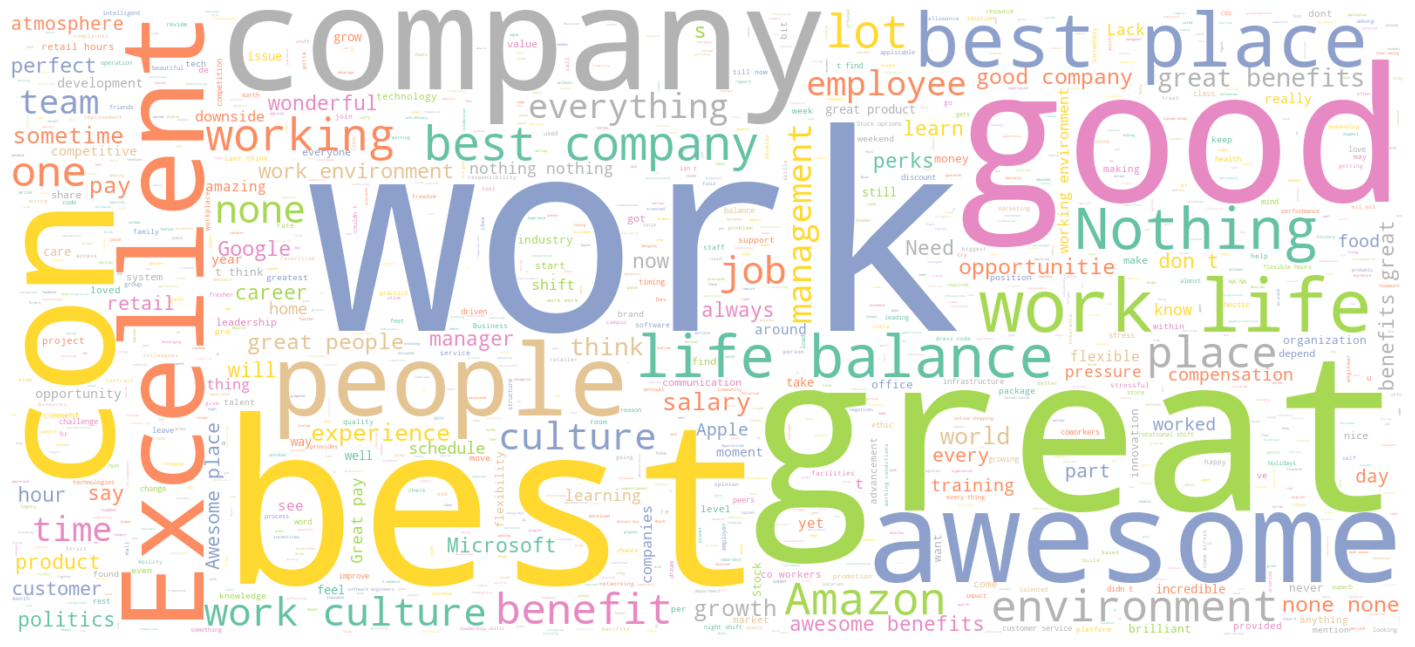

In [26]:
wc(reviews_na['pros&cons'][reviews_na.polarity>0.8])

In [27]:
#Displaying highly negative reviews
reviews_na[['job-title','pros&cons','polarity','subjectivity']][reviews_na.polarity<=-0.8].head(10)

job-title  \
1024  Former Employee - Technical Program Manager   
3771         Current Employee - Technical Support   
5337            Former Employee - ICQA AMBASSADOR   
6680        Current Employee - Anonymous Employee   
6683        Current Employee - Anonymous Employee   
6735        Current Employee - Anonymous Employee   
6745         Former Employee - Anonymous Employee   
7230         Current Employee - Software Engineer   
7989         Former Employee - Anonymous Employee   
8712        Current Employee - Anonymous Employee   

                                              pros&cons  polarity  \
1024  Founders still participate in running the comp... -1.000000   
3771  None  Its a horrible place to work   Amazon do... -1.000000   
5337  None They treat people very bad   Bad manageme... -0.870000   
6680  dont have to worry about not getting overtime ... -1.000000   
6683  Culture Salary Canteen Location Duration  Bori... -1.000000   
6735  Schedule Schedule Schedule Schedule yeah  Bori... -1.000000   
6745  Salaire  Rythme de travail  pression inexistan... -1.000000   
7230  Work life balance Insurance and Benefits  Cafe... -1.000000   
7989  Hated every minute of working here  Can t tell... -0.900000   
8712  RÃ ductions sur les diffÃ rents produits  Tick... -0.833333   

      subjectivity  
1024      1.000000  
3771      1.000000  
5337      0.844444  
6680      1.000000  
6683      1.000000  
6735      1.000000  
6745      1.000000  
7230      1.000000  
7989      0.700000  
8712      1.000000

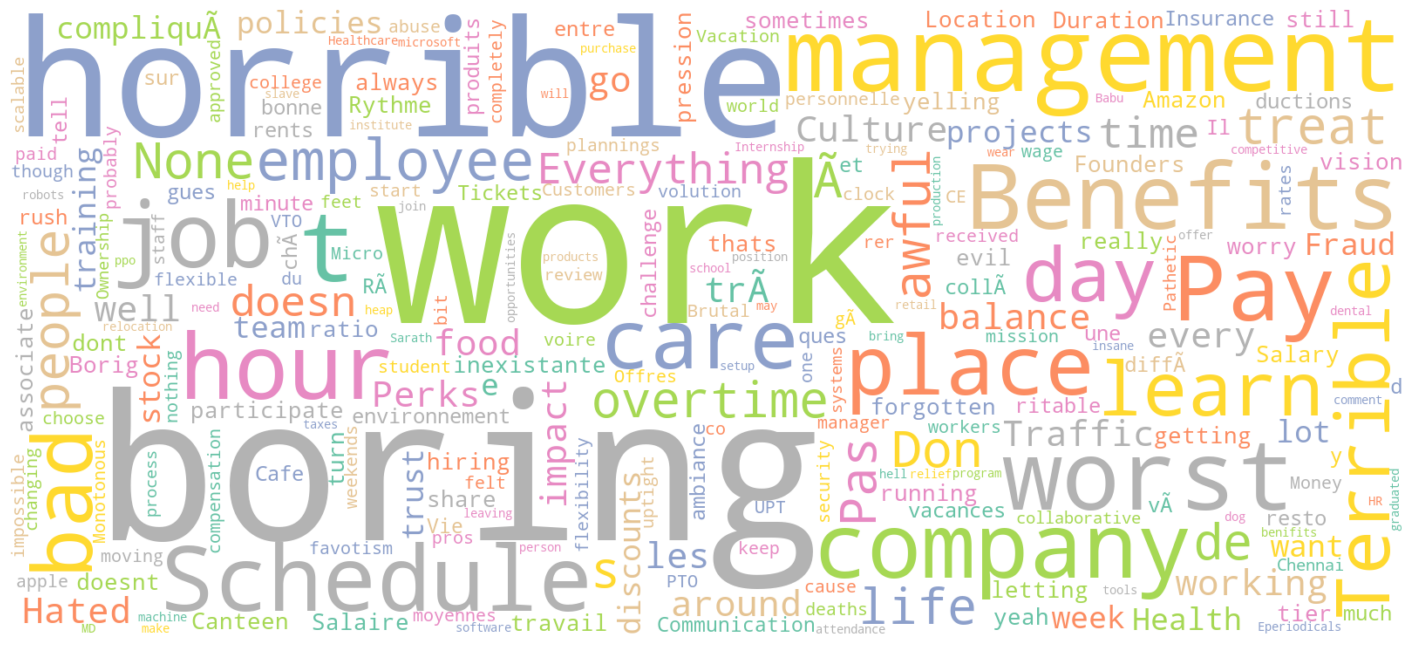

In [28]:
wc(reviews_na['pros&cons'][reviews_na.polarity<-0.8])

### Distribution of polarity and subjectivity

<AxesSubplot:>

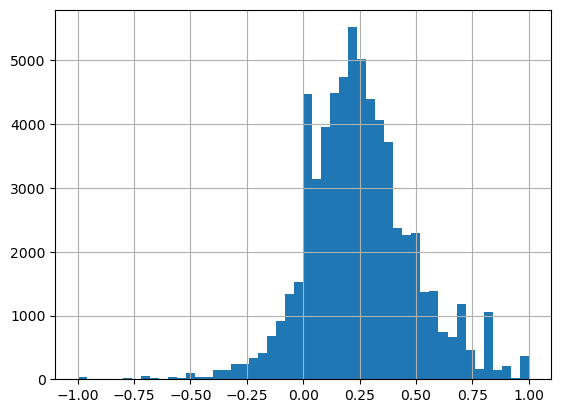

In [29]:
#Distribution of polarity
reviews_na.polarity.hist(bins=50)

<AxesSubplot:>

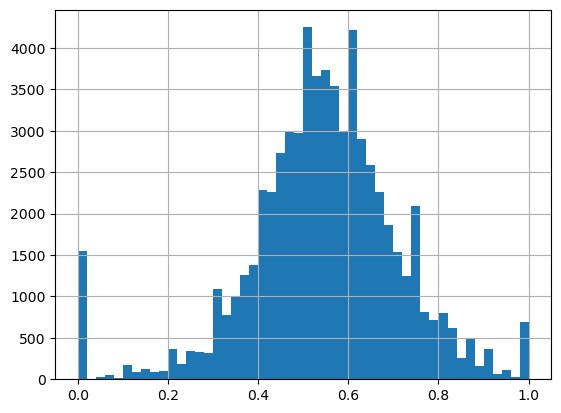

In [30]:
#Distribution of subjectivity
reviews_na.subjectivity.hist(bins=50)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0')])

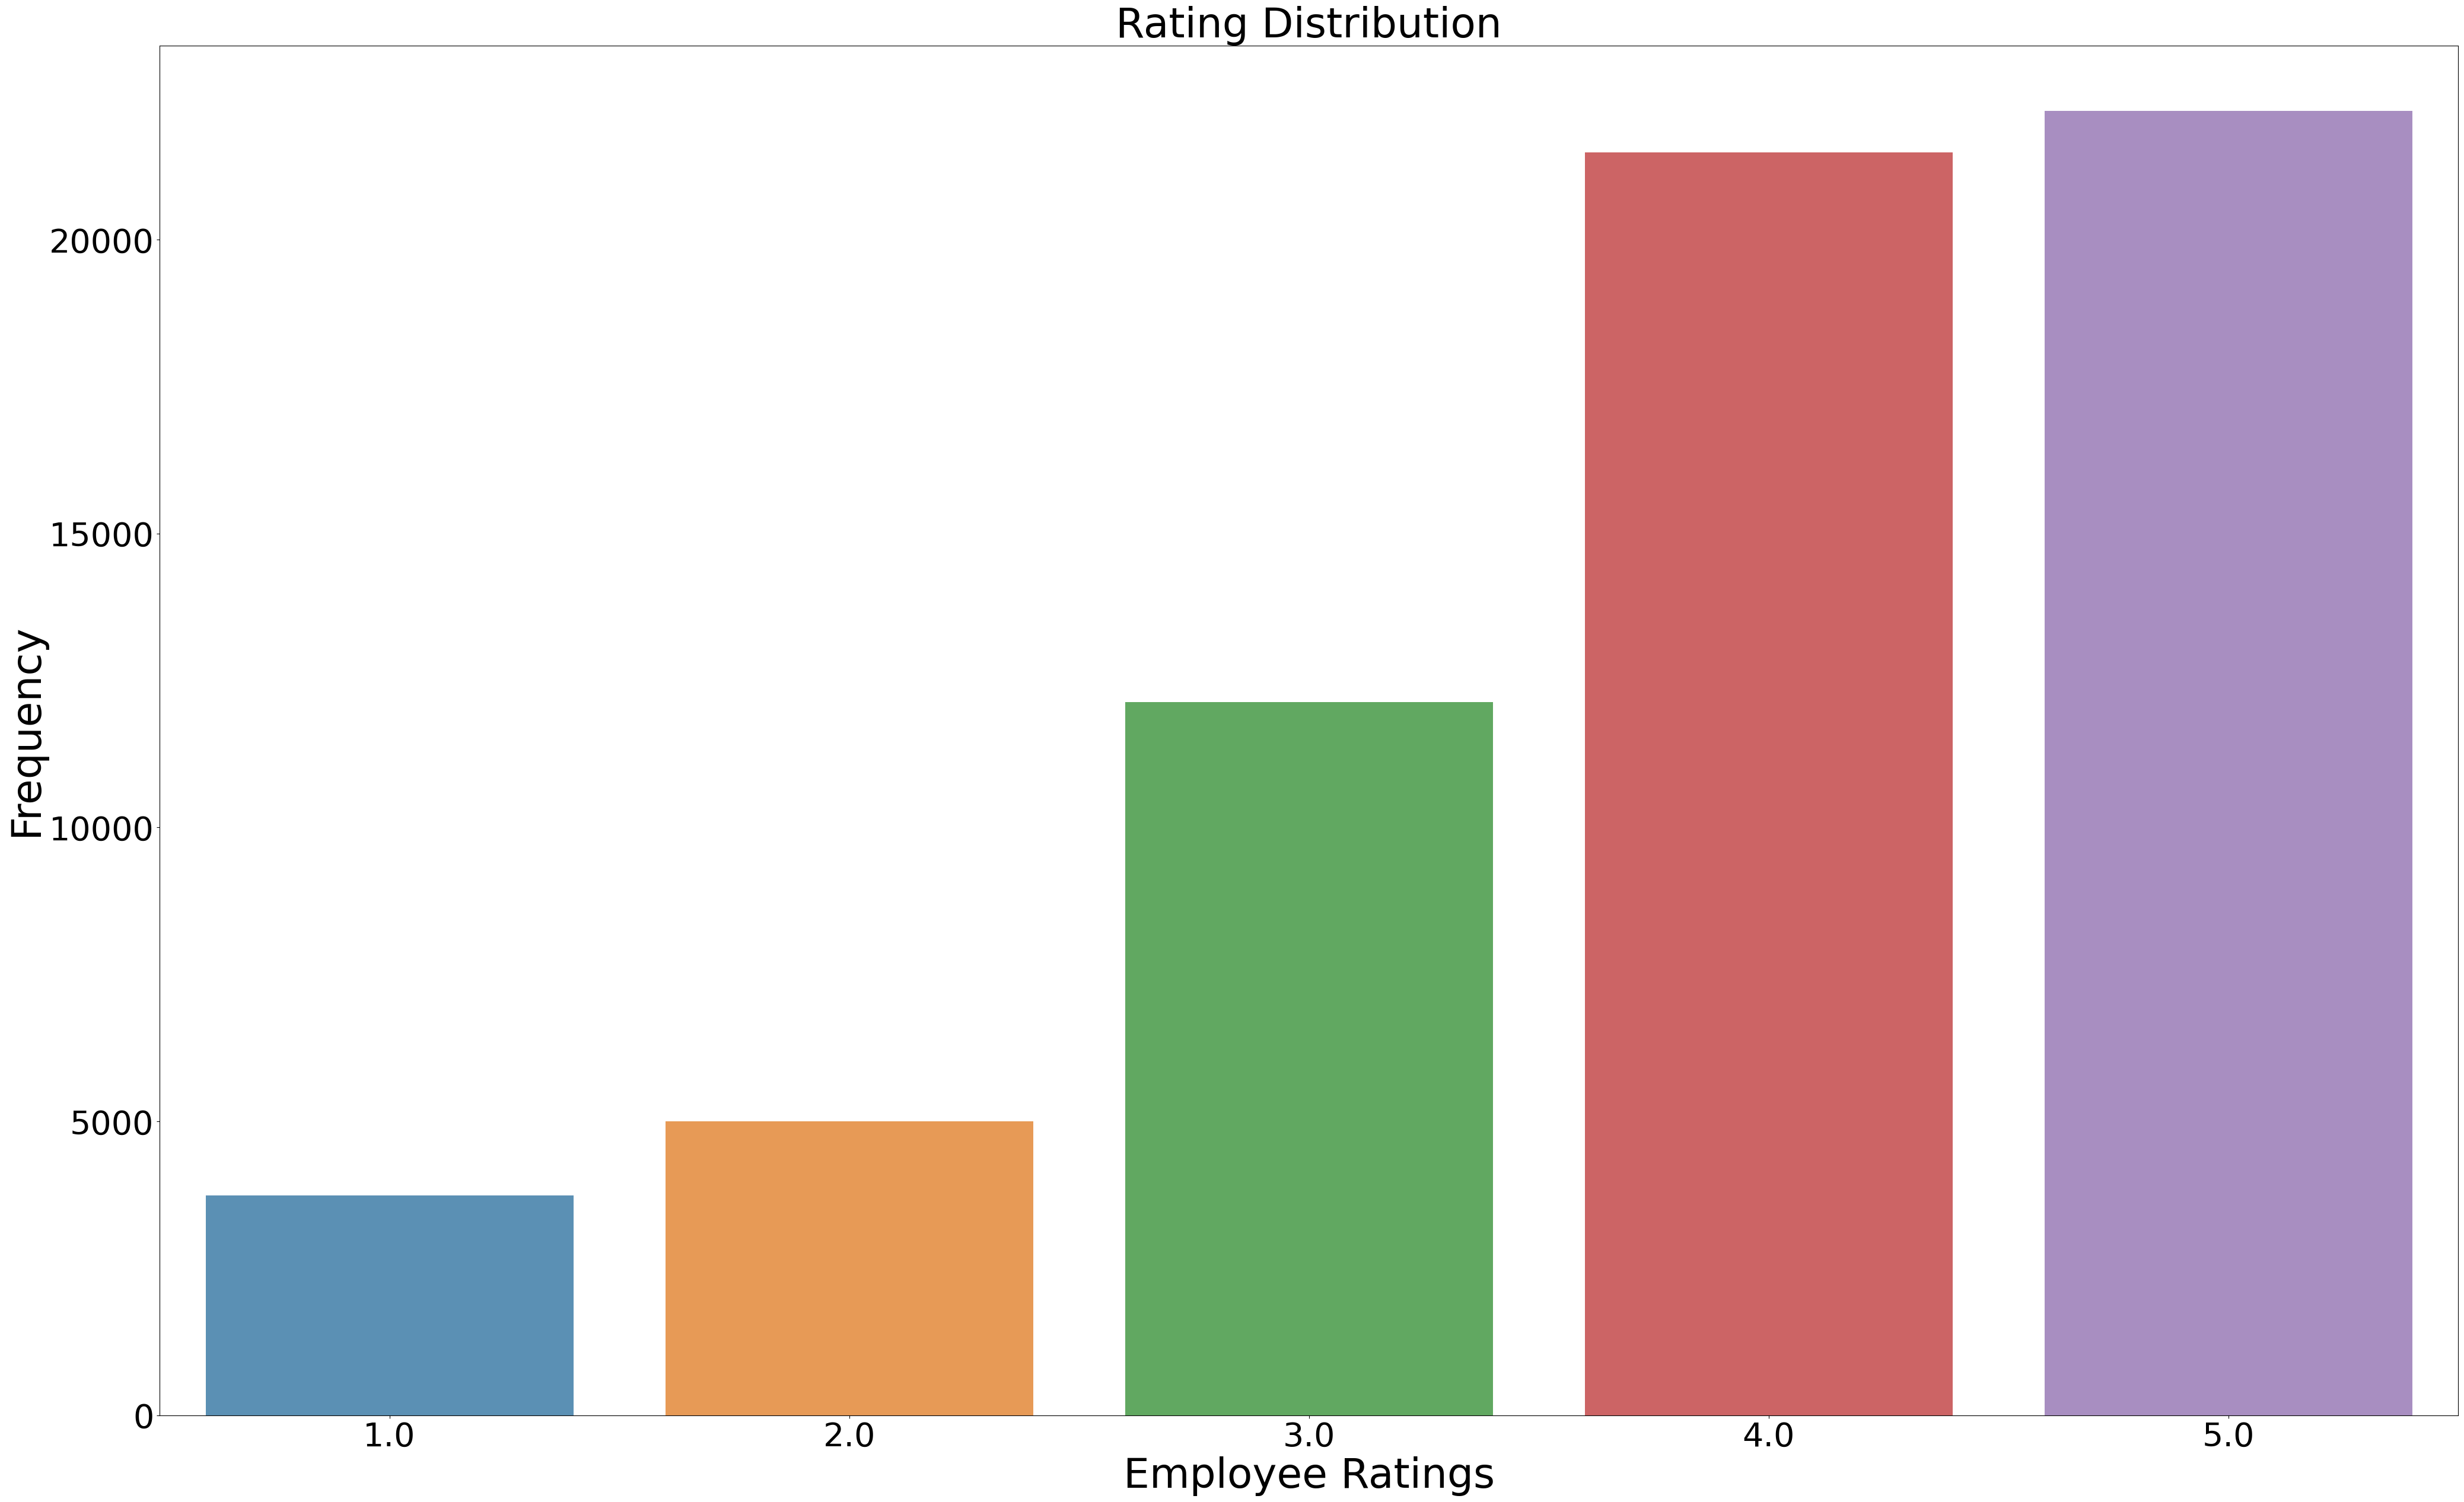

In [31]:
#Distribution of overall ratings

x_rating = reviews_na['overall-ratings'].value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x=x_rating.index, y=x_rating.values, alpha=0.8)
plt.title("Rating Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Employee Ratings', fontsize=50)
plt.xticks(fontsize=40)

<AxesSubplot:title={'center':'Percentage of Ratings'}, ylabel='overall-ratings'>

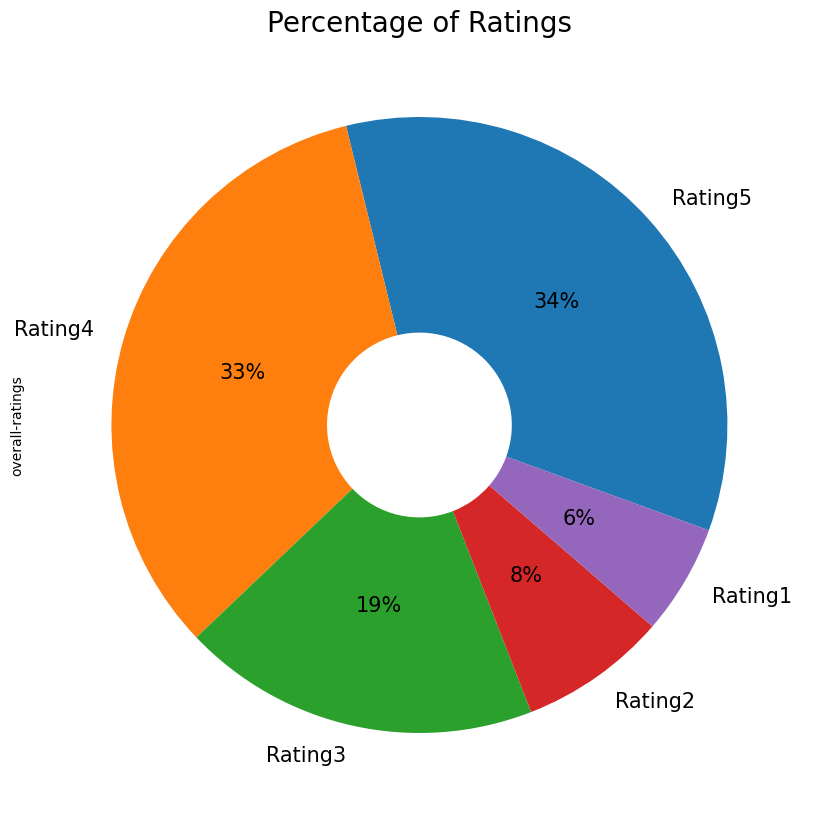

In [32]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
reviews_na['overall-ratings'].value_counts().plot(kind='pie', labels=['Rating5', 'Rating4', 'Rating3', 'Rating2', 'Rating1'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

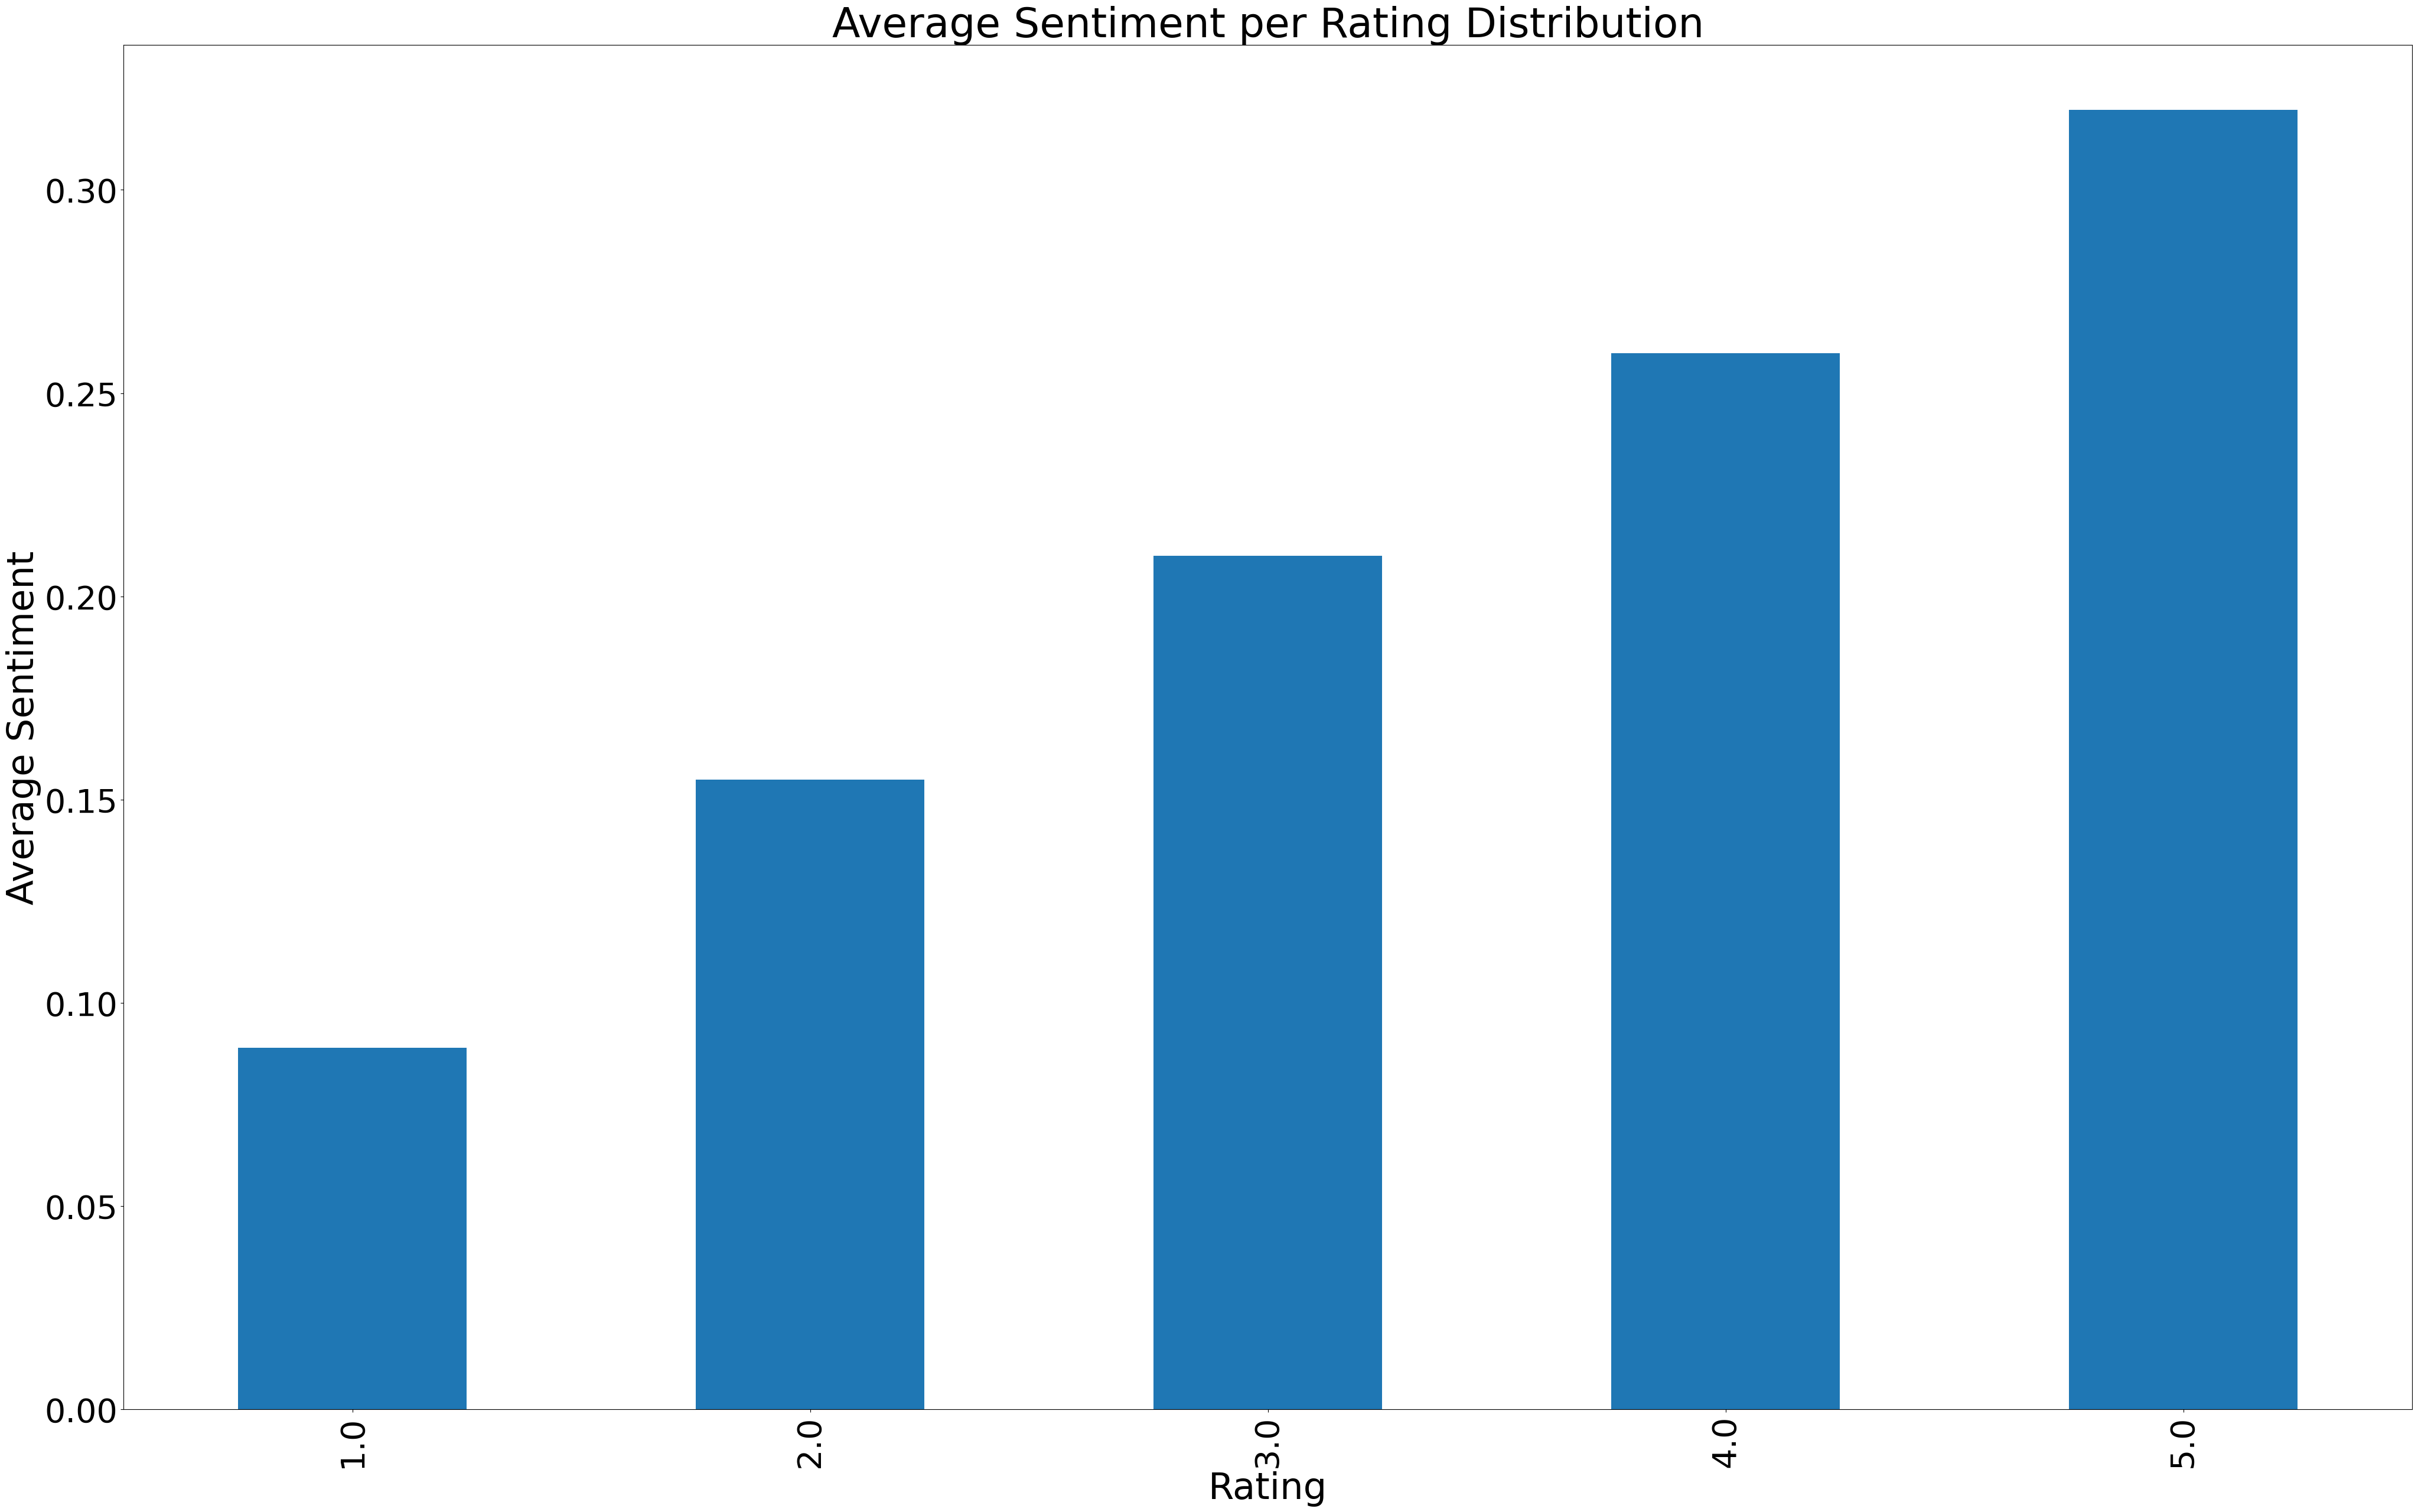

In [33]:
polarity_avg = reviews_na.groupby('overall-ratings')['polarity'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Rating Distribution', fontsize=50)
plt.show()

### Selecting “overall-ratings” and “lemmatized” columns

In [34]:
reviews_select = reviews_na[['overall-ratings', 'lemmatized']]
reviews_select.head()

overall-ratings                                         lemmatized
0              4.0  [learn, opportunity, growth, opportunity, well...
1              4.0     [nice, culture, project, scale, real, dataset]
2              4.0                           [culture, flexi, timing]
4              5.0  [grow, team, add, new, web, service, add, new,...
5              5.0  [pro, bullet, point, style, long, ability, hom...

# **Sentiment analysis**

In [35]:
reviews_select['lemma_str'] = [' '.join(map(str,l)) for l in reviews_select['lemmatized']]
reviews_select.head()

overall-ratings                                         lemmatized  \
0              4.0  [learn, opportunity, growth, opportunity, well...   
1              4.0     [nice, culture, project, scale, real, dataset]   
2              4.0                           [culture, flexi, timing]   
4              5.0  [grow, team, add, new, web, service, add, new,...   
5              5.0  [pro, bullet, point, style, long, ability, hom...   

                                           lemma_str  
0      learn opportunity growth opportunity well pay  
1            nice culture project scale real dataset  
2                               culture flexi timing  
4  grow team add new web service add new writer t...  
5  pro bullet point style long ability home flexi...

### With the “overall-rating” column, we can validate how well the sentiment analysis was able to determine the writer’s attitude

In [36]:
reviews_select['sentiment'] = reviews_select['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
reviews_select.head()

overall-ratings                                         lemmatized  \
0              4.0  [learn, opportunity, growth, opportunity, well...   
1              4.0     [nice, culture, project, scale, real, dataset]   
2              4.0                           [culture, flexi, timing]   
4              5.0  [grow, team, add, new, web, service, add, new,...   
5              5.0  [pro, bullet, point, style, long, ability, hom...   

                                           lemma_str  sentiment  
0      learn opportunity growth opportunity well pay   0.000000  
1            nice culture project scale real dataset   0.400000  
2                               culture flexi timing   0.000000  
4  grow team add new web service add new writer t...   0.107879  
5  pro bullet point style long ability home flexi...   0.153591

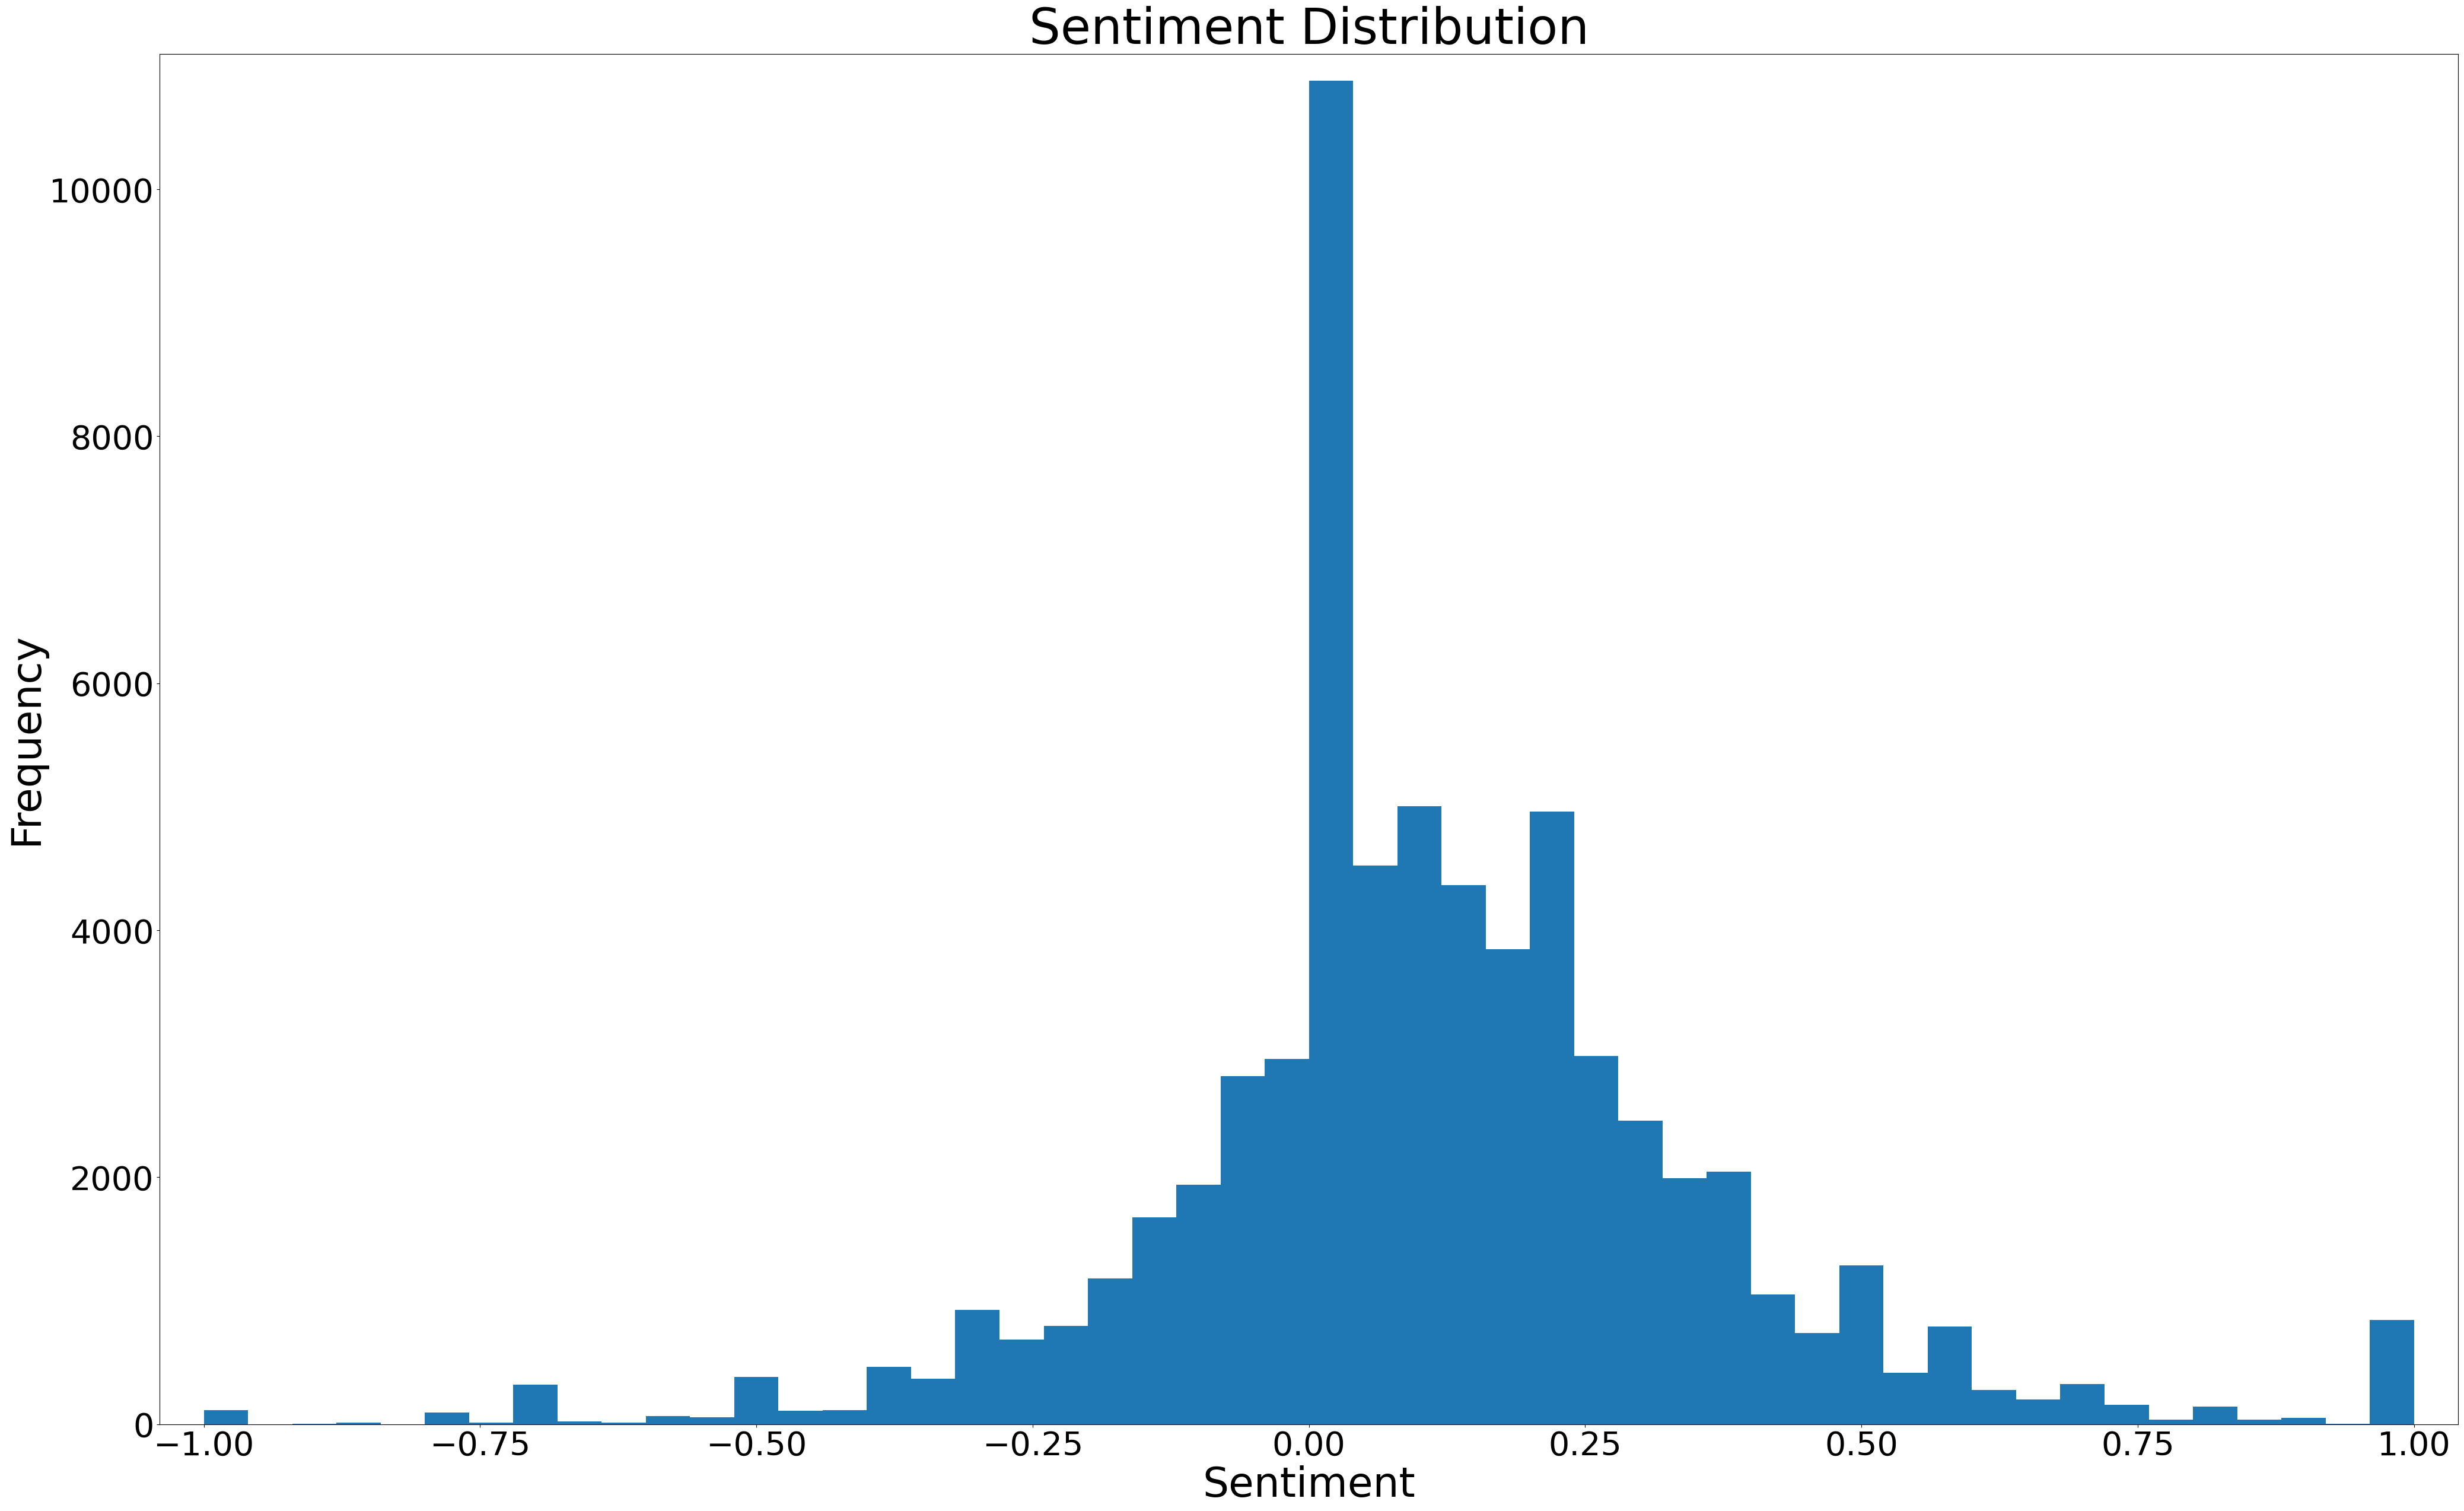

In [37]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(reviews_select['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

### When comparing a histogram of our sentiment, we can see that the vast majority of our derived sentiment rating is overwhelmingly positive.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0')])

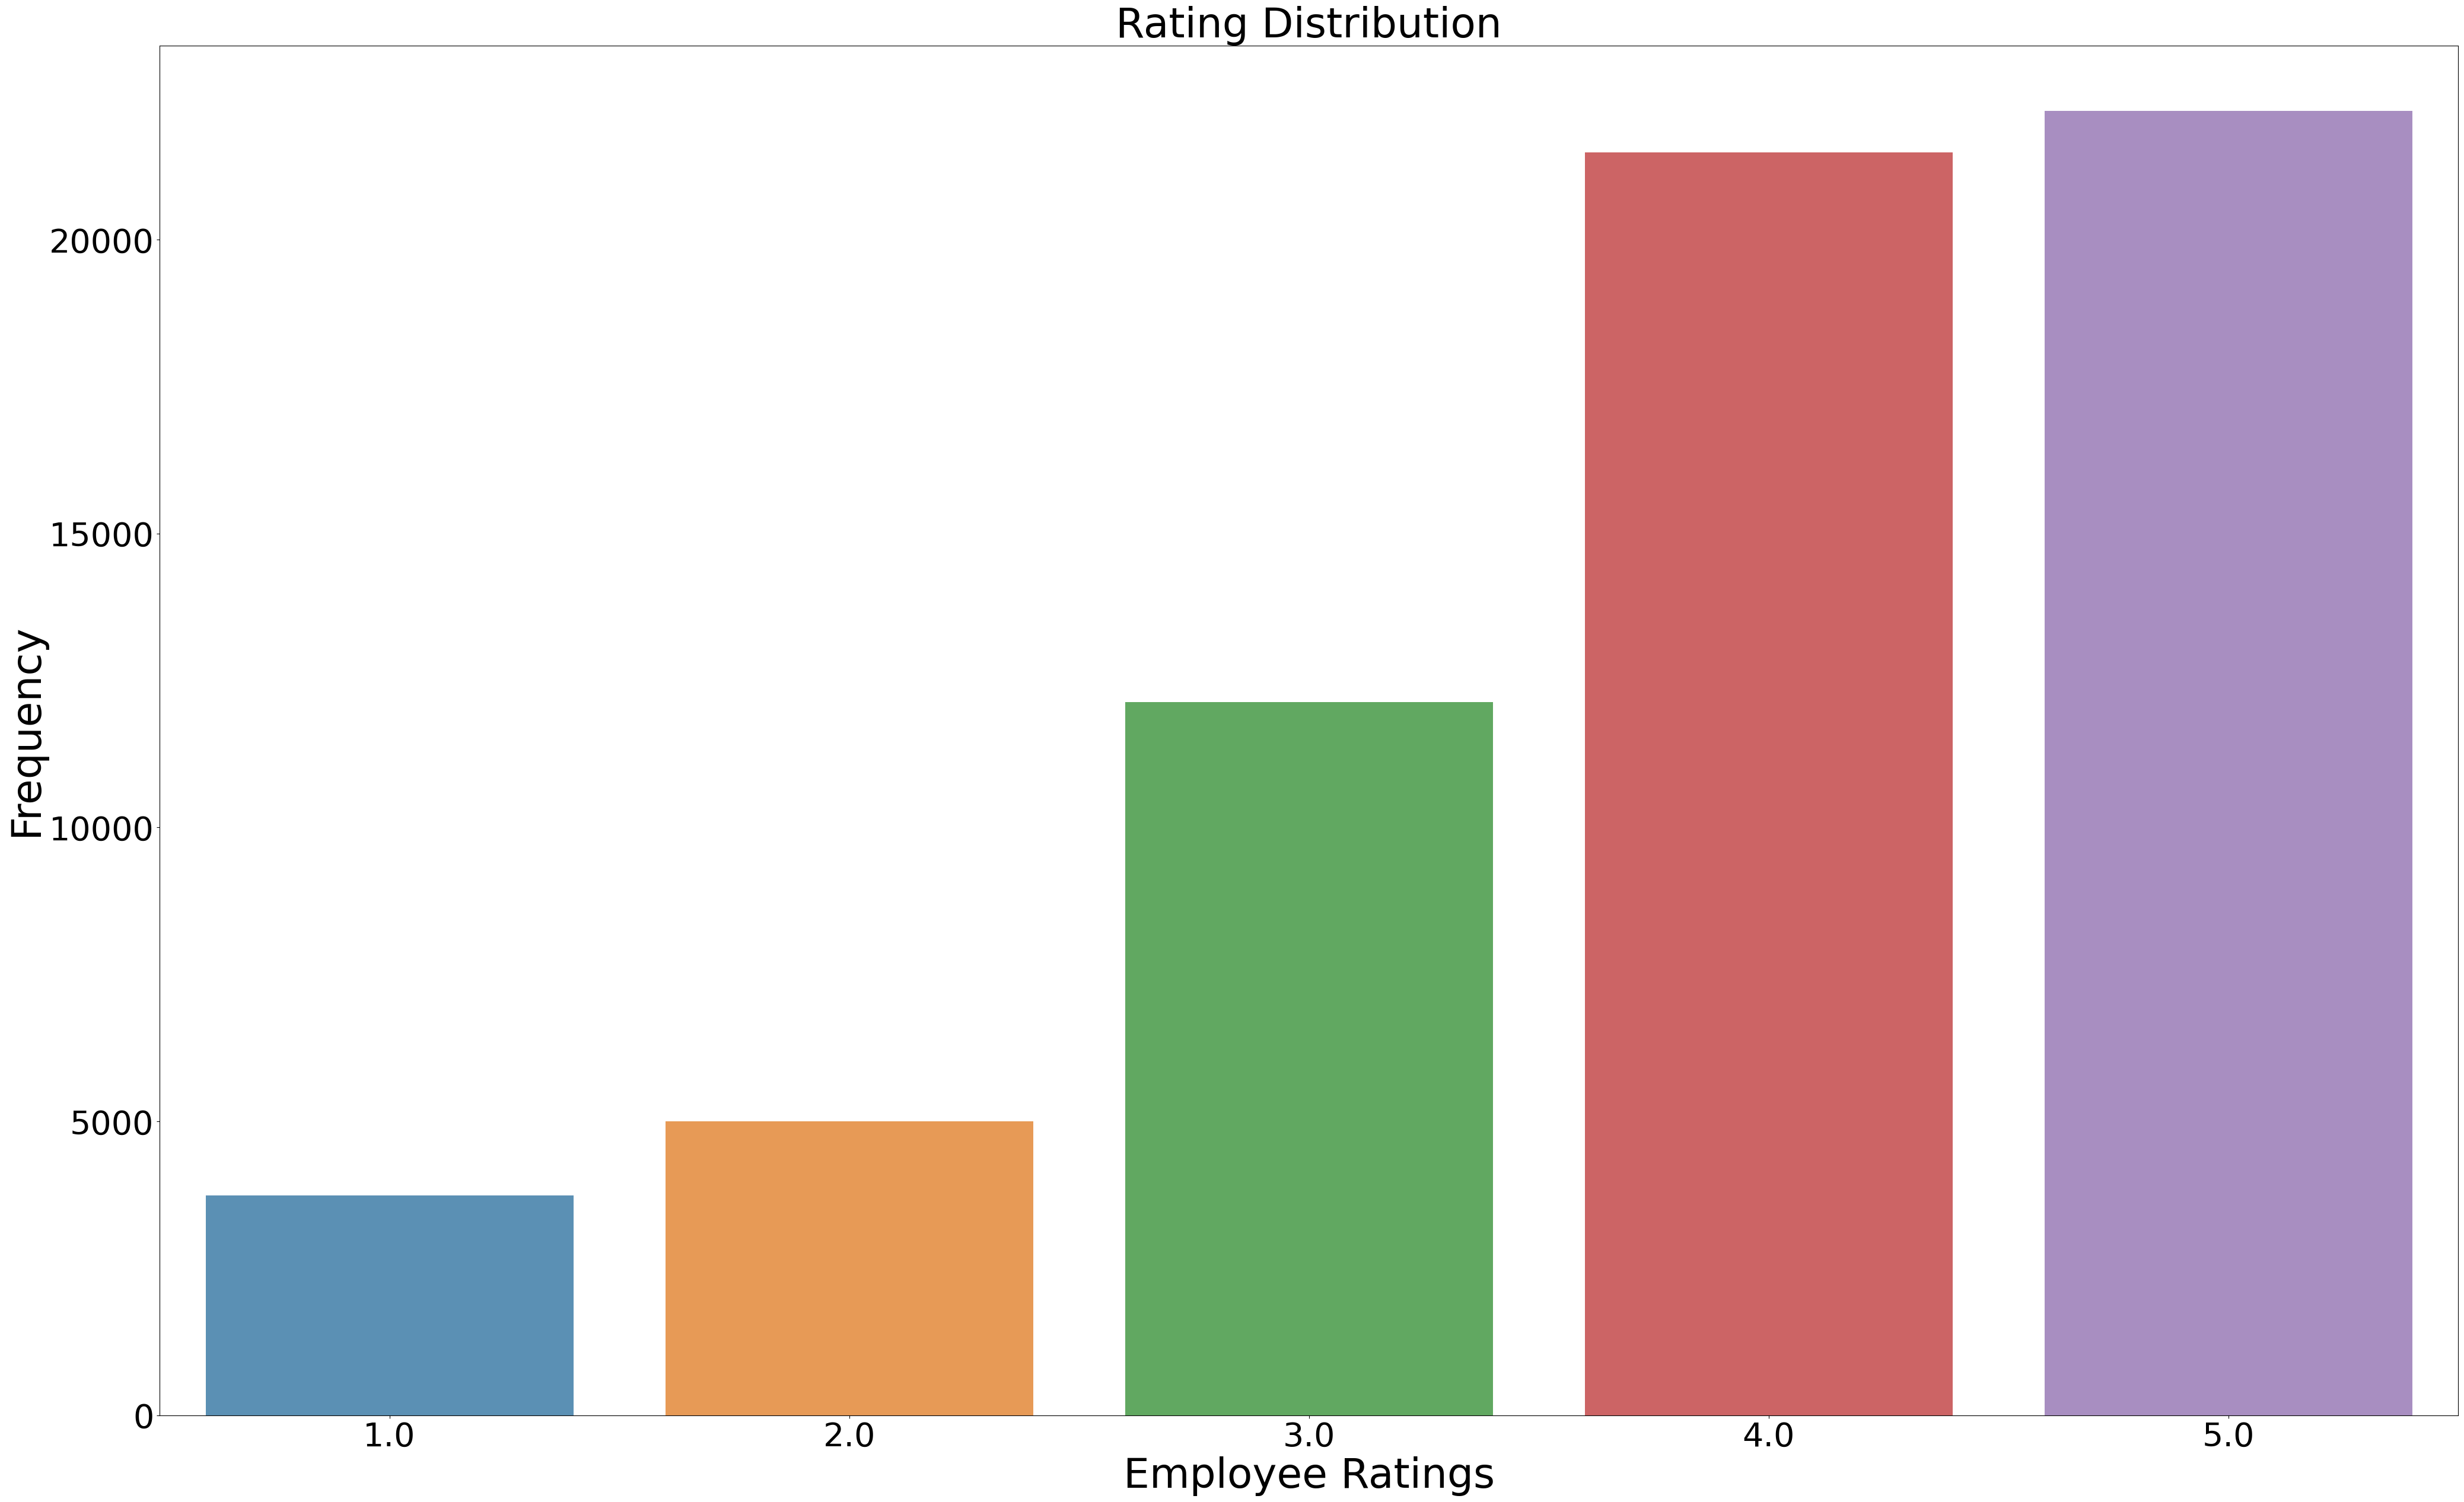

In [38]:
x_rating = reviews_select['overall-ratings'].value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x=x_rating.index, y=x_rating.values, alpha=0.8)
plt.title("Rating Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Employee Ratings', fontsize=50)
plt.xticks(fontsize=40)

<AxesSubplot:title={'center':'Percentage of Ratings'}, ylabel='overall-ratings'>

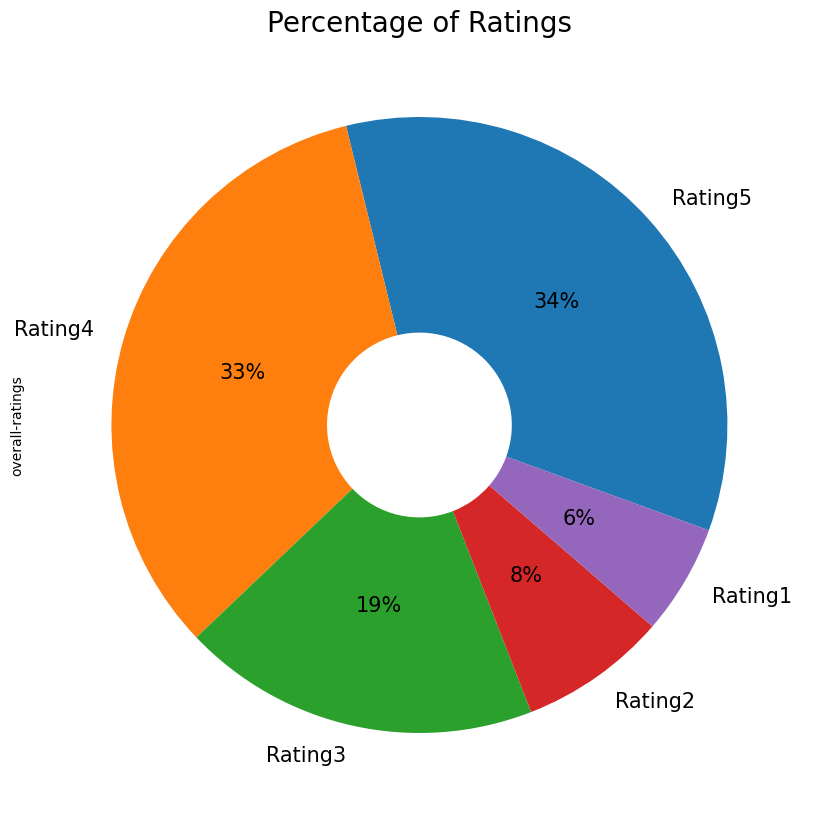

In [39]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
reviews_select['overall-ratings'].value_counts().plot(kind='pie', labels=['Rating5', 'Rating4', 'Rating3', 'Rating2', 'Rating1'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

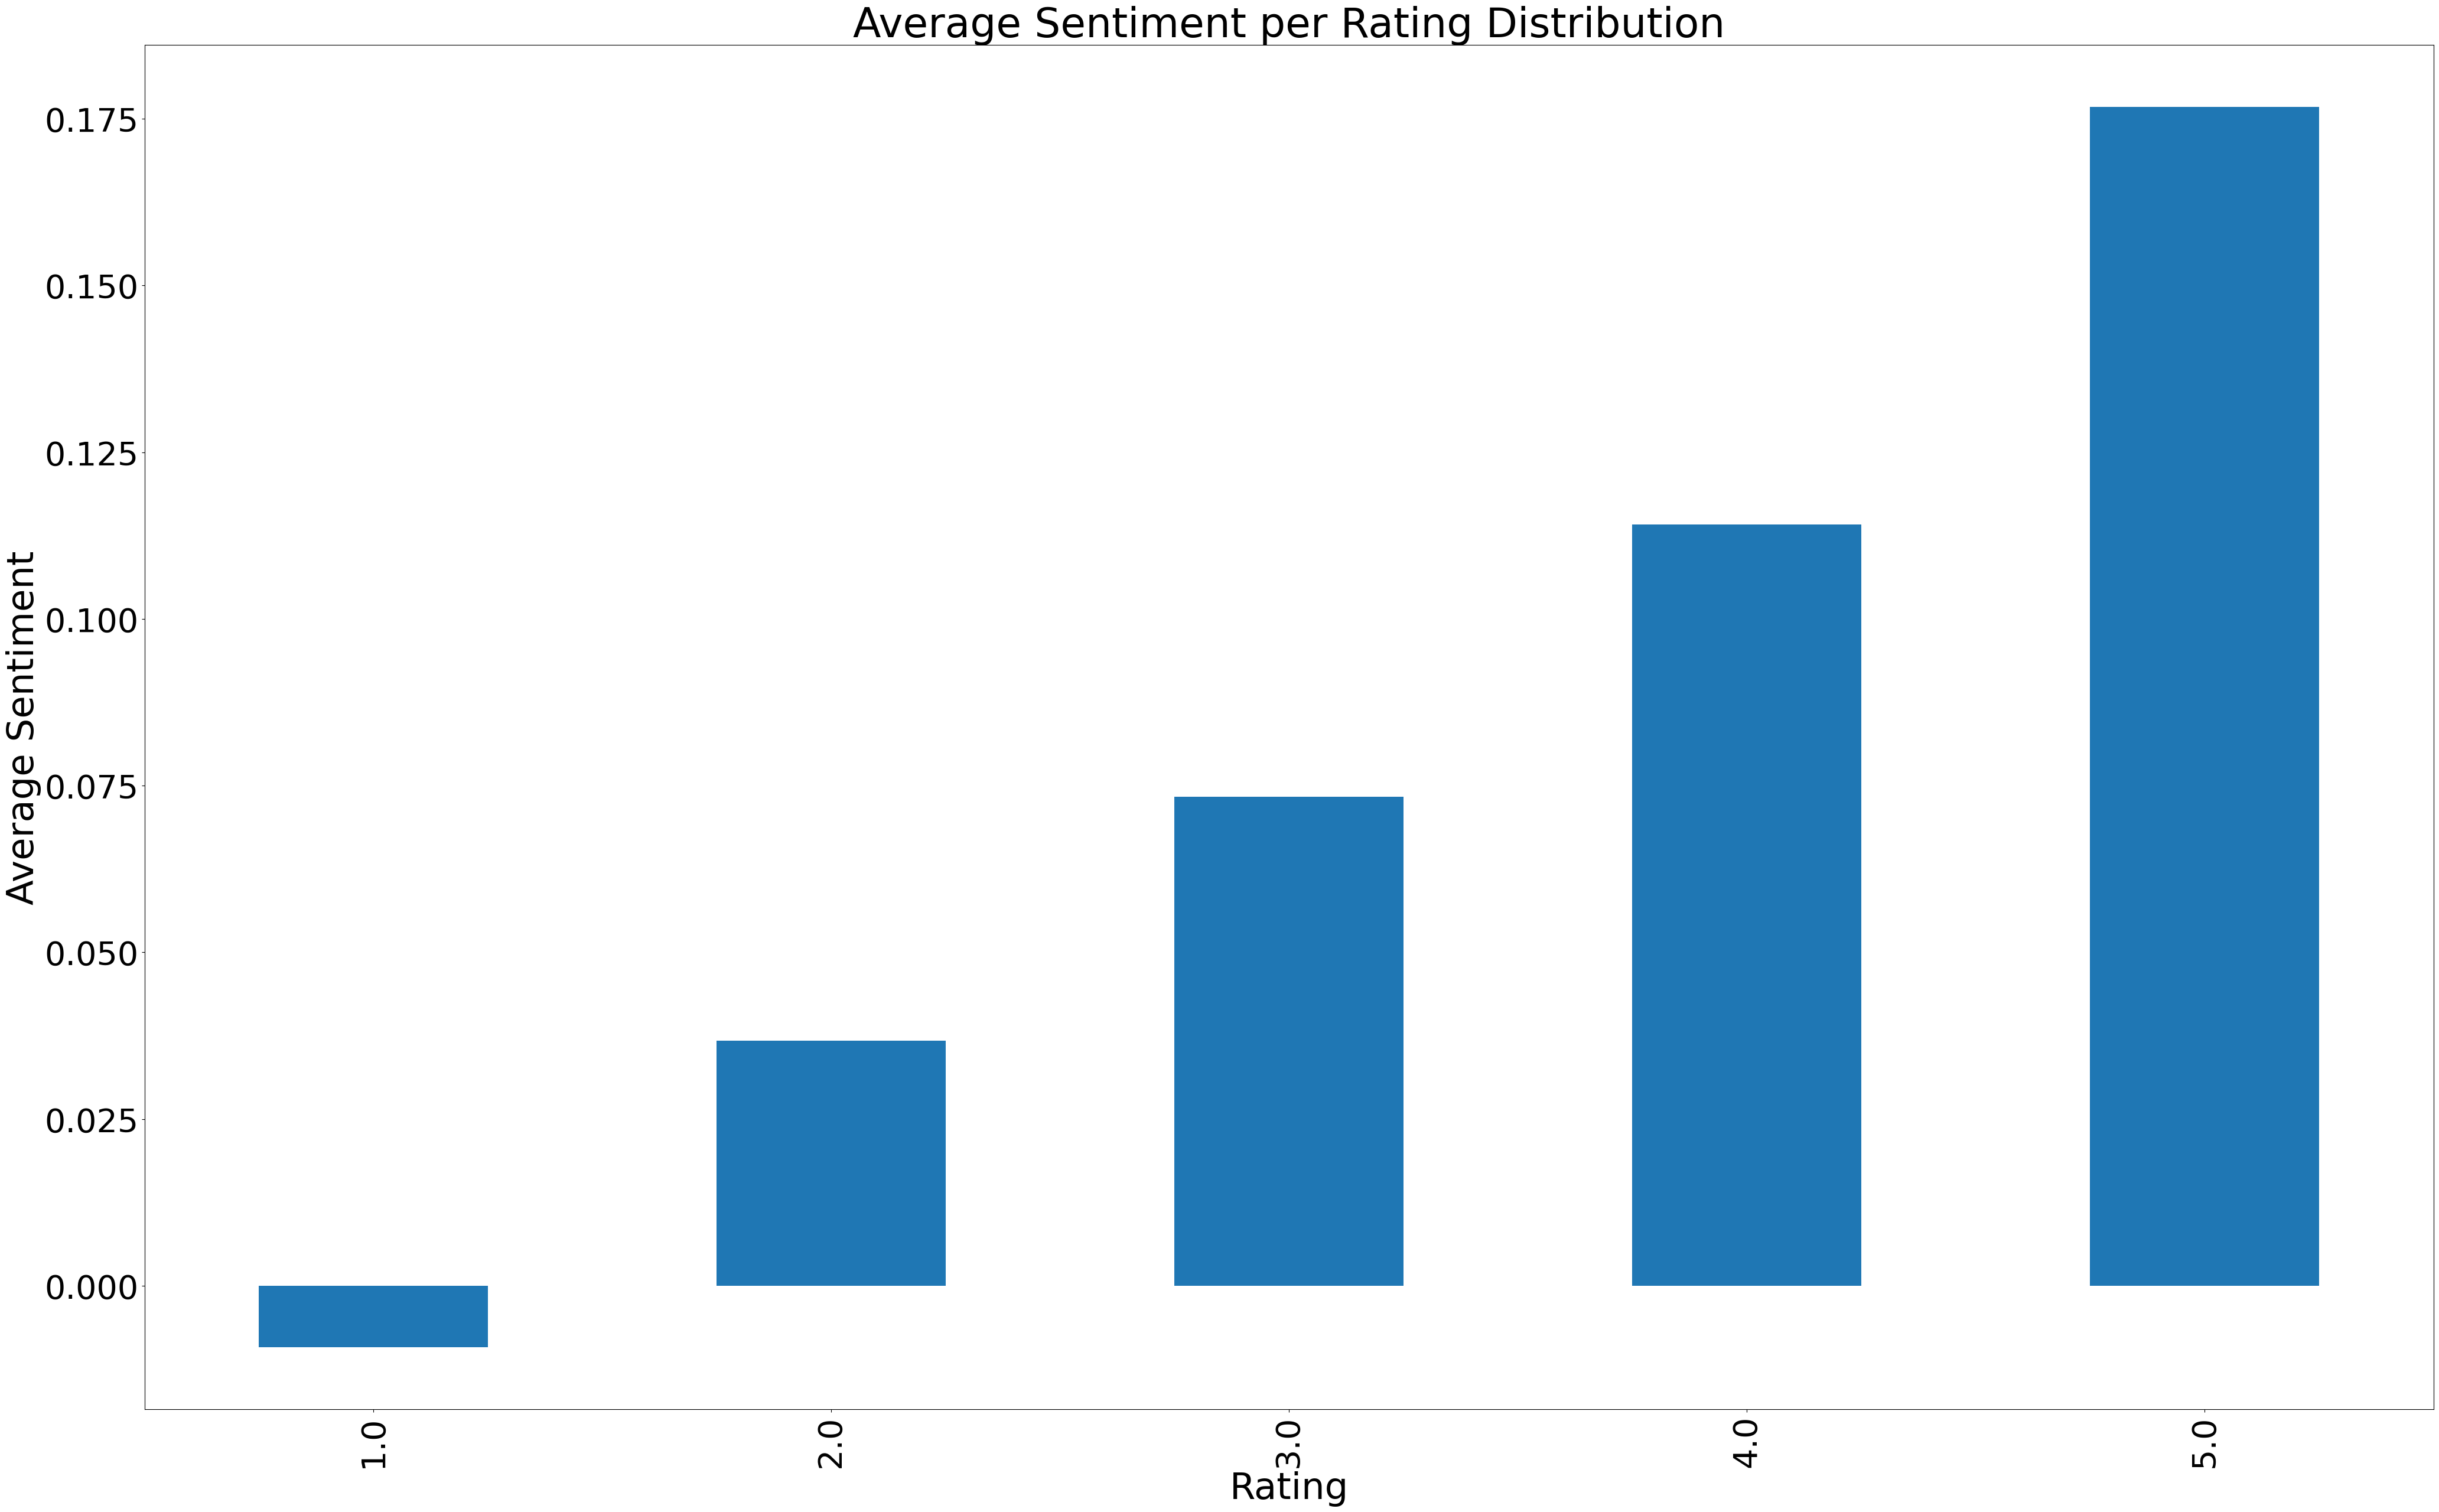

In [40]:
polarity_avg = reviews_select.groupby('overall-ratings')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Rating Distribution', fontsize=50)
plt.show()

### Creating two additional features of “word_count” to determine the number of words per review and “review_len” to determine the number of letters per review.

In [41]:
reviews_select['word_count'] = reviews_select['lemmatized'].apply(lambda x: len(str(x).split()))
reviews_select['review_len'] = reviews_select['lemma_str'].astype(str).apply(len)
reviews_select.head()

overall-ratings                                         lemmatized  \
0              4.0  [learn, opportunity, growth, opportunity, well...   
1              4.0     [nice, culture, project, scale, real, dataset]   
2              4.0                           [culture, flexi, timing]   
4              5.0  [grow, team, add, new, web, service, add, new,...   
5              5.0  [pro, bullet, point, style, long, ability, hom...   

                                           lemma_str  sentiment  word_count  \
0      learn opportunity growth opportunity well pay   0.000000           6   
1            nice culture project scale real dataset   0.400000           6   
2                               culture flexi timing   0.000000           3   
4  grow team add new web service add new writer t...   0.107879          50   
5  pro bullet point style long ability home flexi...   0.153591         108   

   review_len  
0          45  
1          39  
2          20  
4         325  
5         707

In [42]:
reviews_select.sort_values(by=['review_len'], ascending=False).head(5)

overall-ratings                                         lemmatized  \
20347              5.0  [google, world, every, lot, serious, gap, skil...   
31905              1.0  [read, previous, review, see, several, common,...   
18004              2.0  [start, review, say, service, appleâ, â, home,...   
1336               2.0  [relatively, stable, employment, reasonable, c...   
23817              1.0  [reputation, awesome, technology, look, resume...   

                                               lemma_str  sentiment  \
20347  google world every lot serious gap skill googl...   0.116227   
31905  read previous review see several common theme ...  -0.002862   
18004  start review say service appleâ â home advisor...   0.018811   
1336   relatively stable employment reasonable compen...  -0.013108   
23817  reputation awesome technology look resume job ...   0.010820   

       word_count  review_len  
20347        1048        7276  
31905         796        5677  
18004         798        5521  
1336          788        5225  
23817         709        4837

### Although the differences are not significantly large, it seems most long reviews, based on the count of letters and words seem to be negative. It seems disgruntled employees typically provide significantly more detail in their reviews. This result is not uncommon as humans have a tendency to complain in detail but praise in brief.

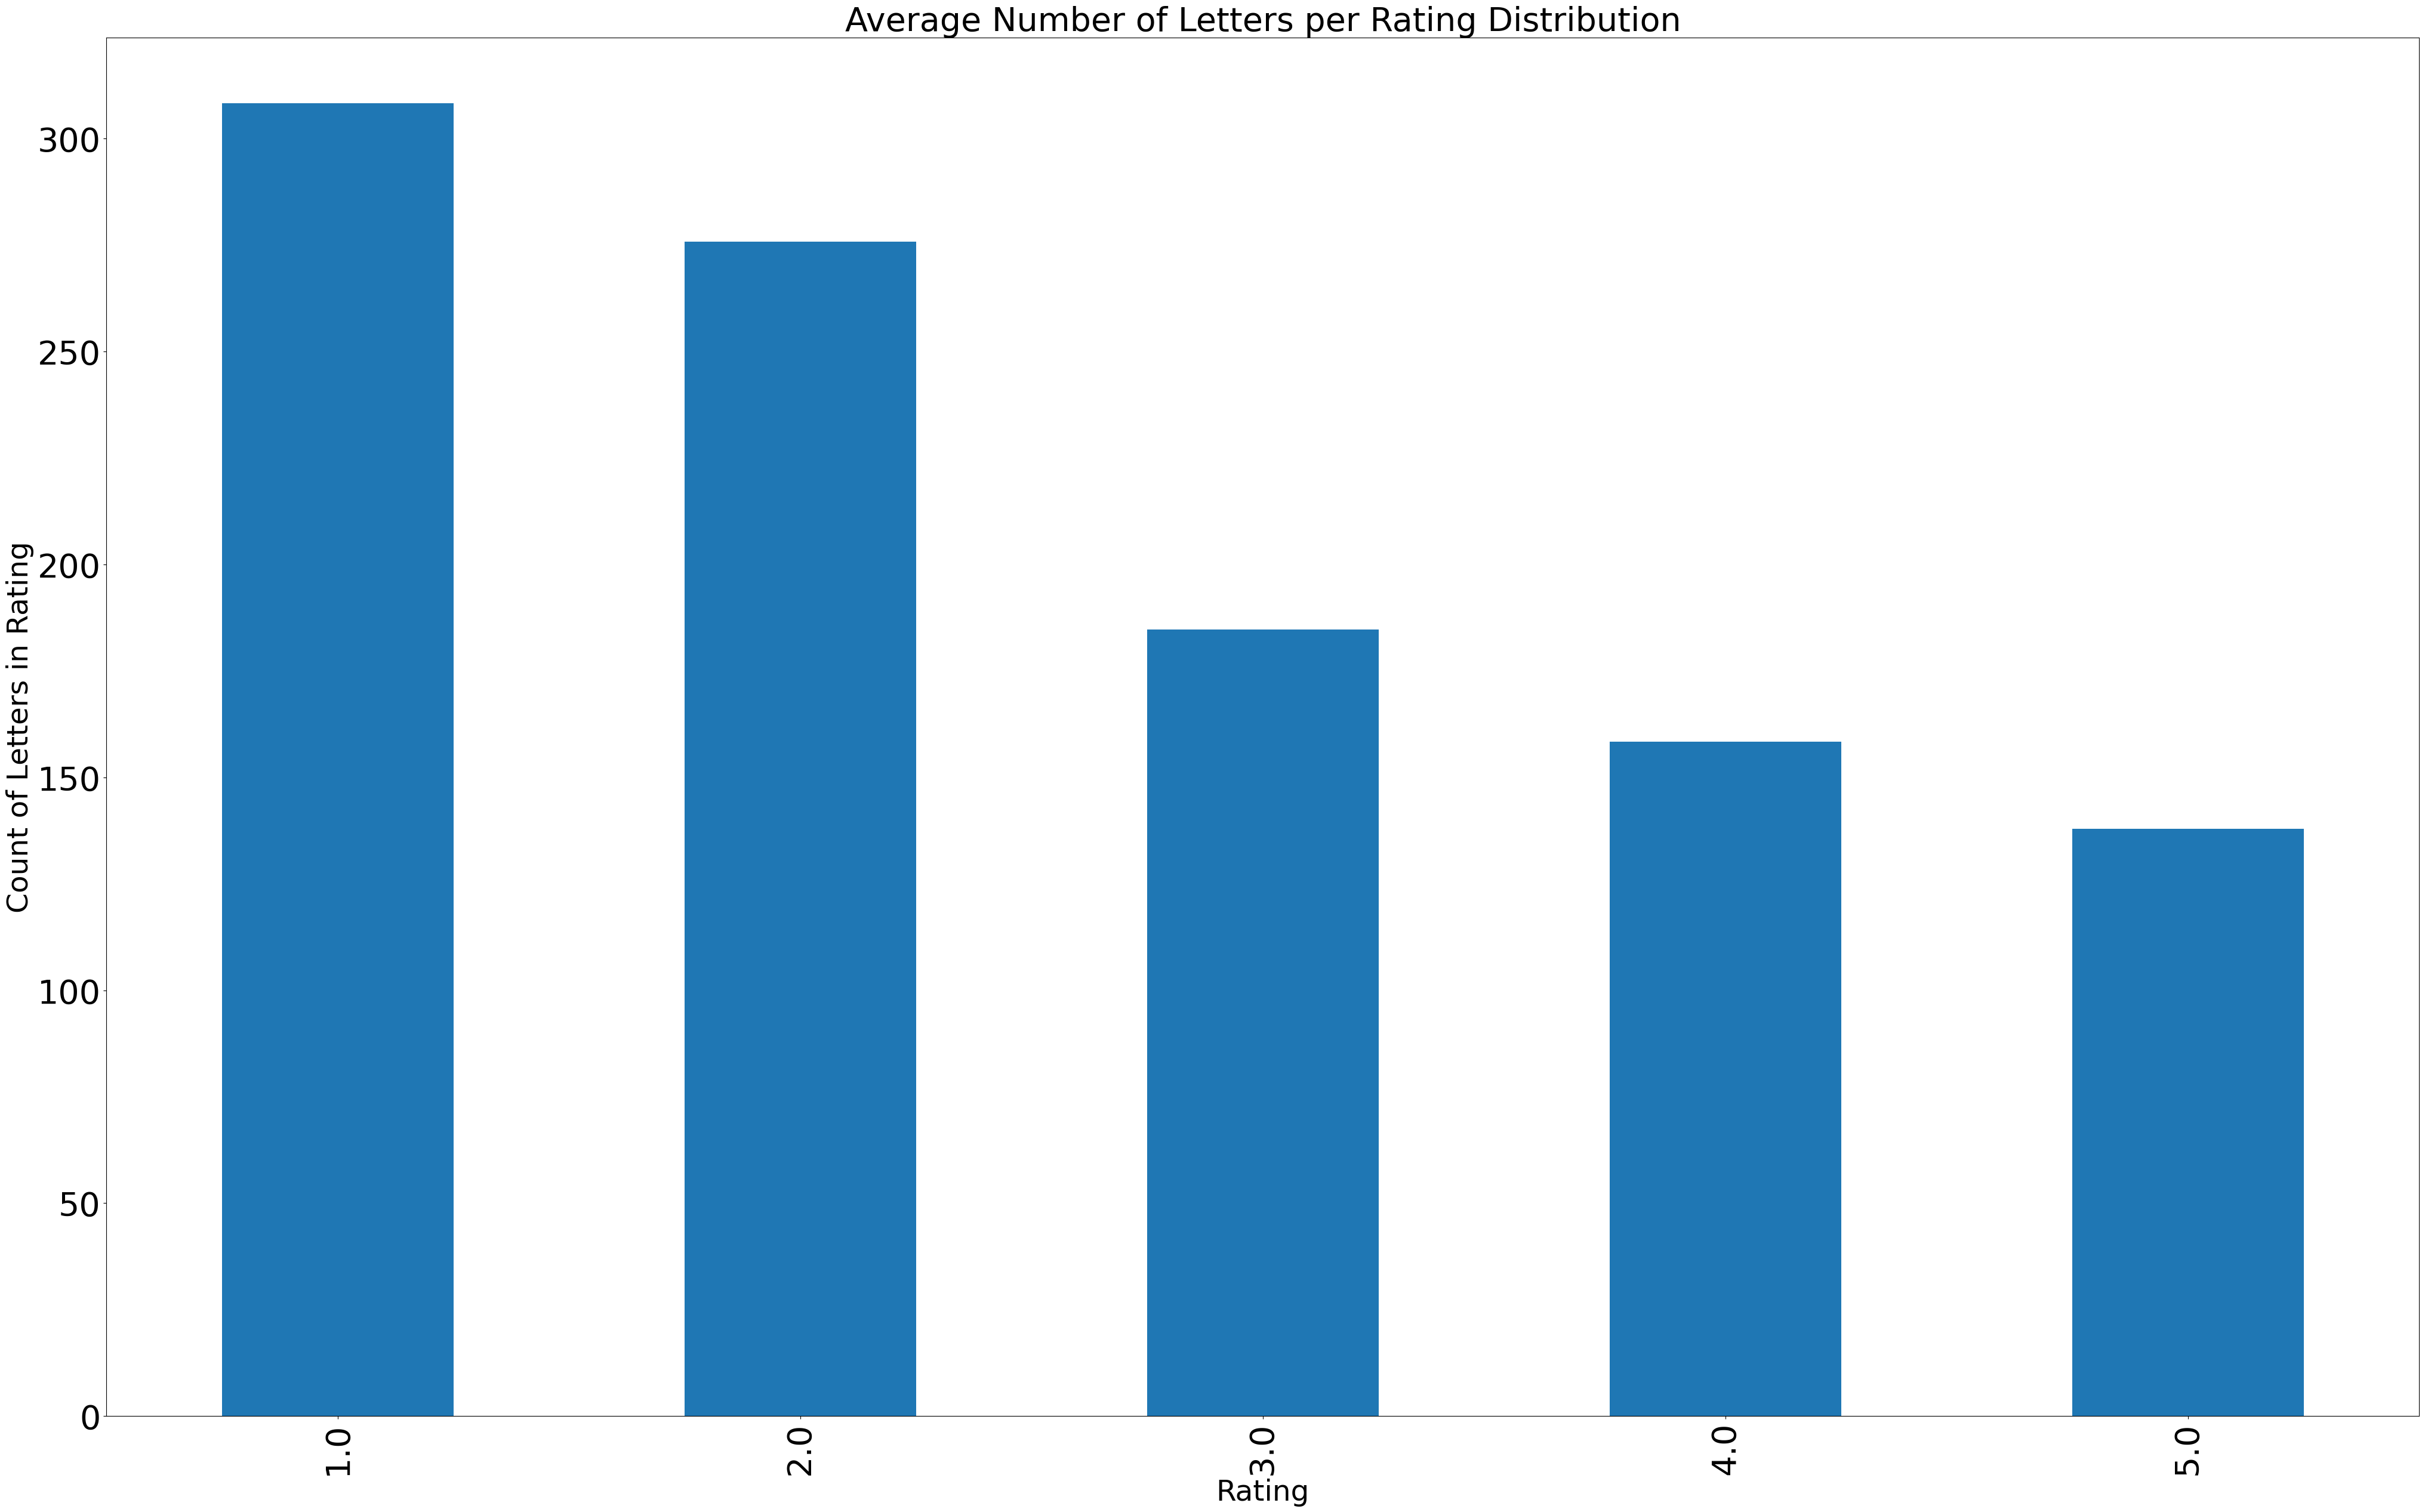

In [43]:
letter_avg = reviews_select.groupby('overall-ratings')['review_len'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Letters in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Rating Distribution', fontsize=40)
plt.show()

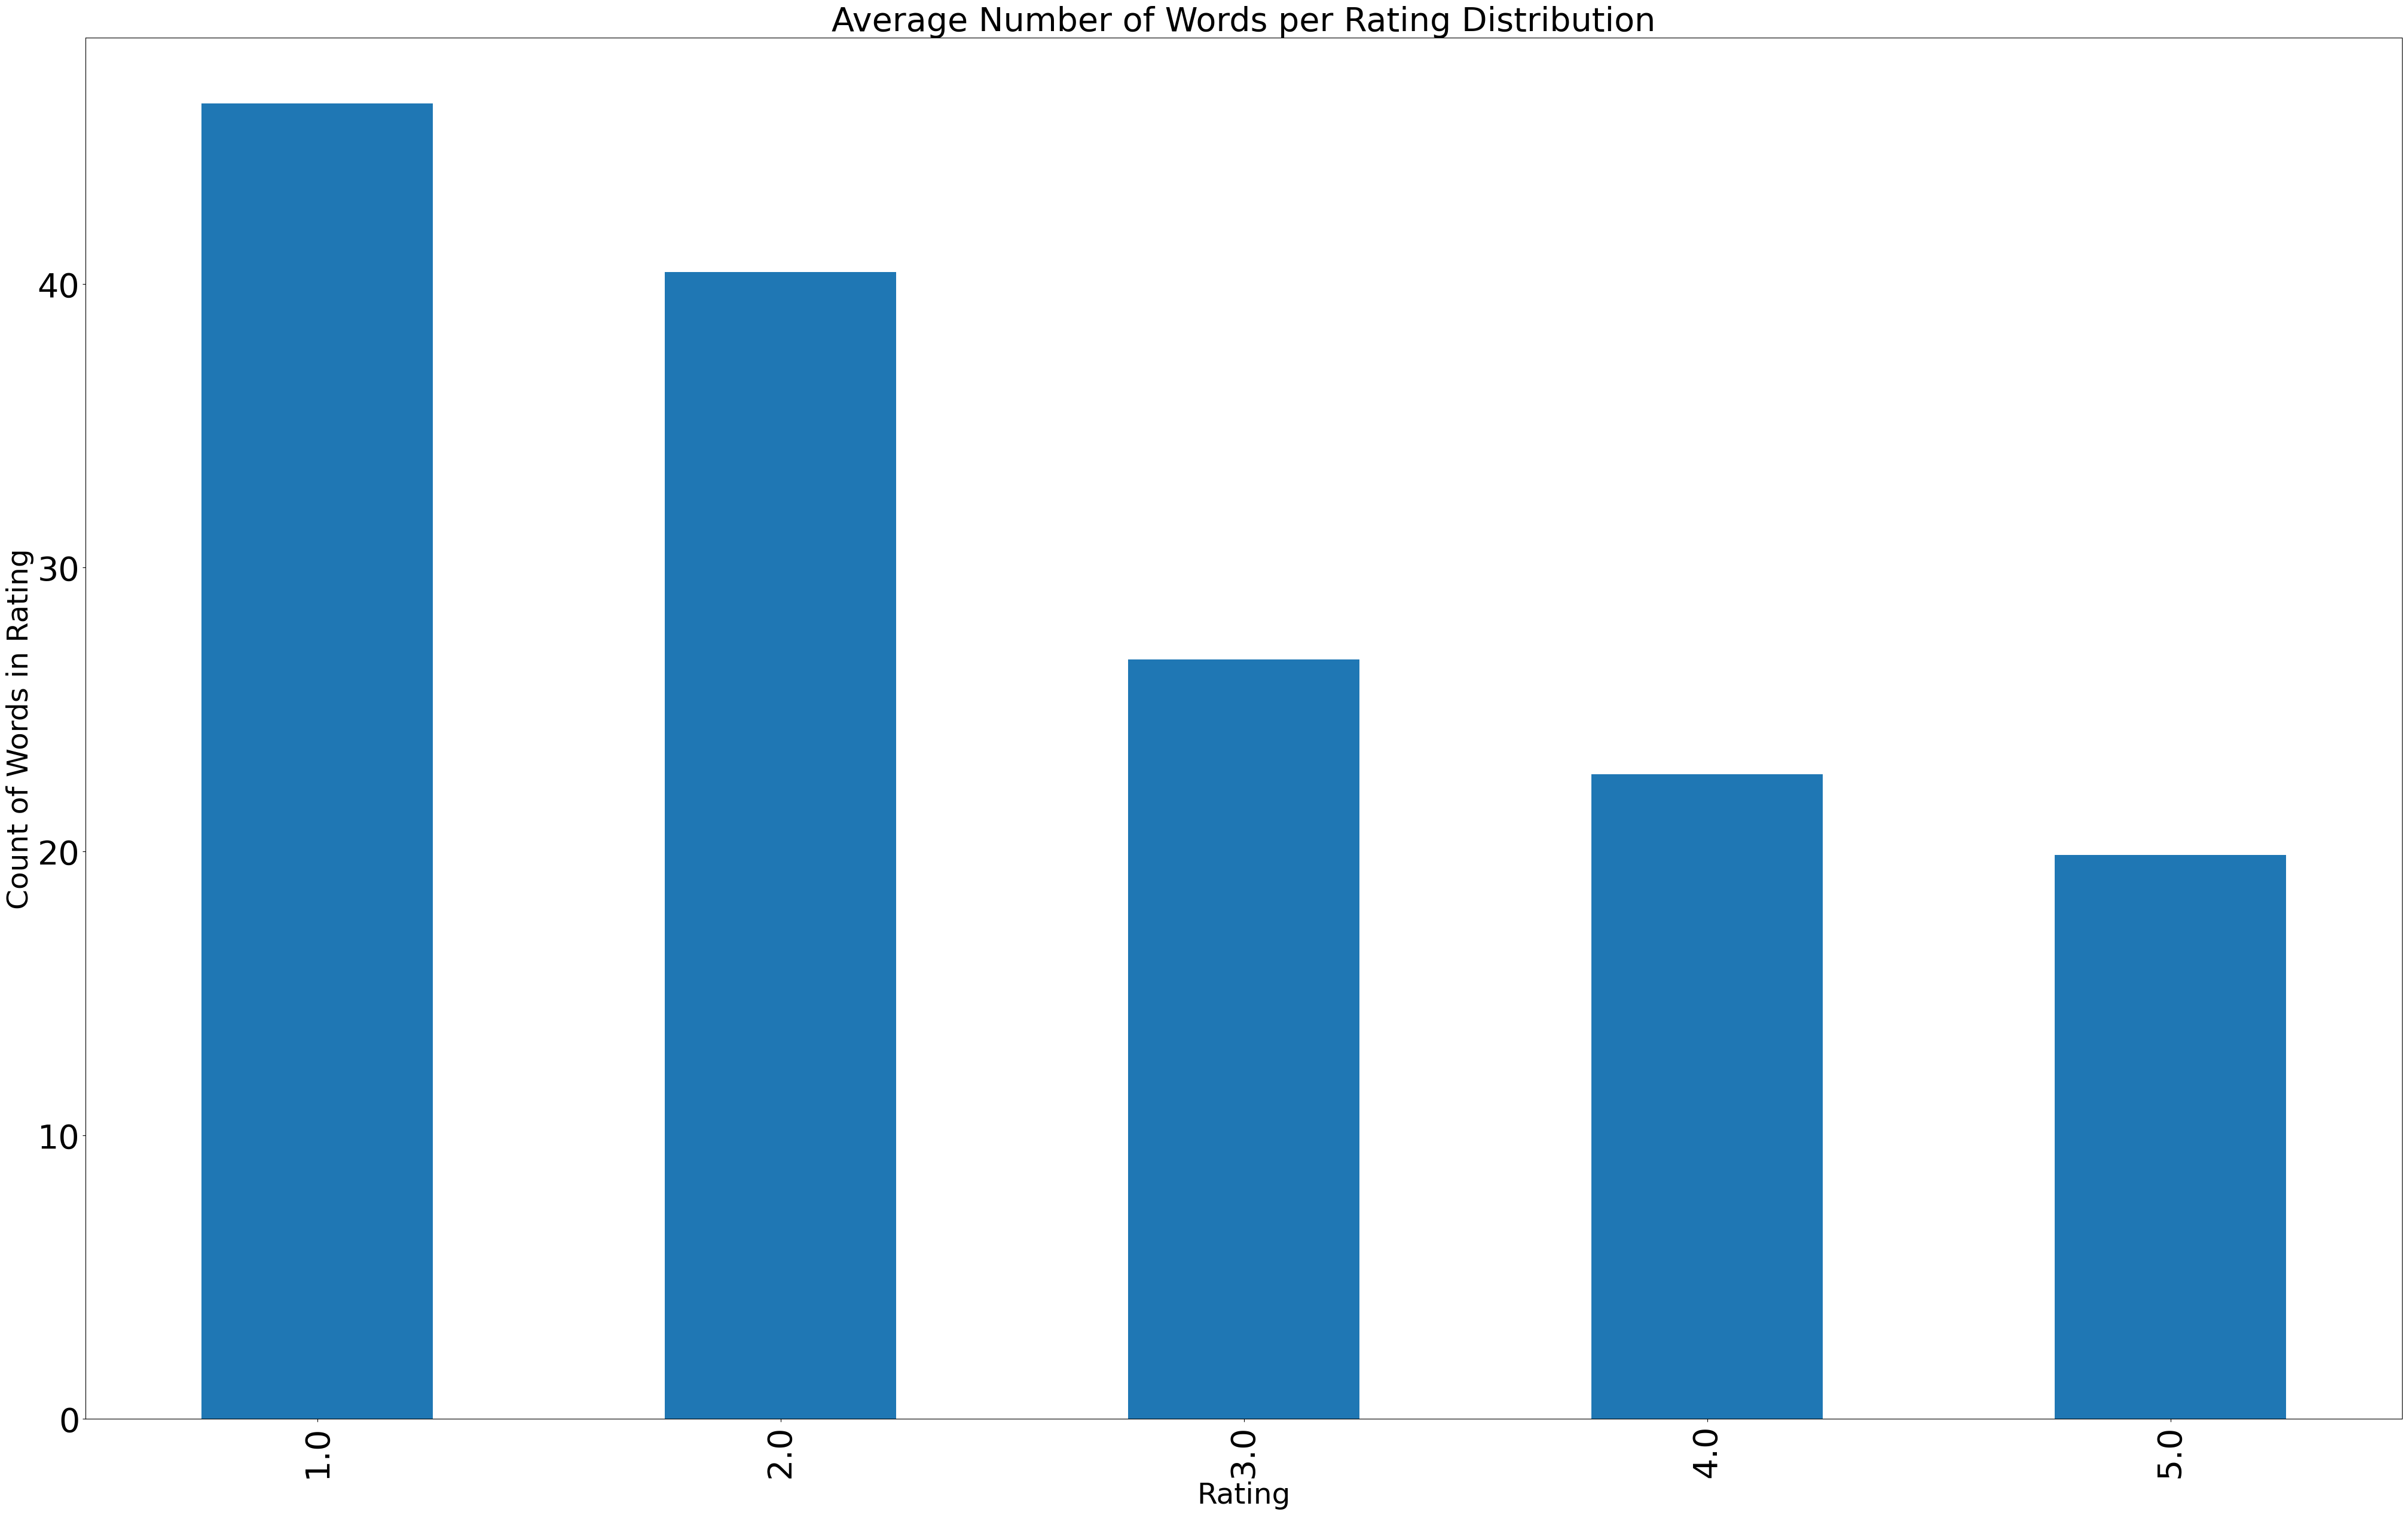

In [44]:
word_avg = reviews_select.groupby('overall-ratings')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Words in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per Rating Distribution', fontsize=40)
plt.show()

### Both ratings and sentiment have a negative correlation with “review_len” and “word_count”. This would explain the inverse relationship as the count of letters and words per review increases the overall rating and sentiment decreases.

# **Term Frequency Analysis**

In [45]:
# To find most common words

words = reviews_select['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist

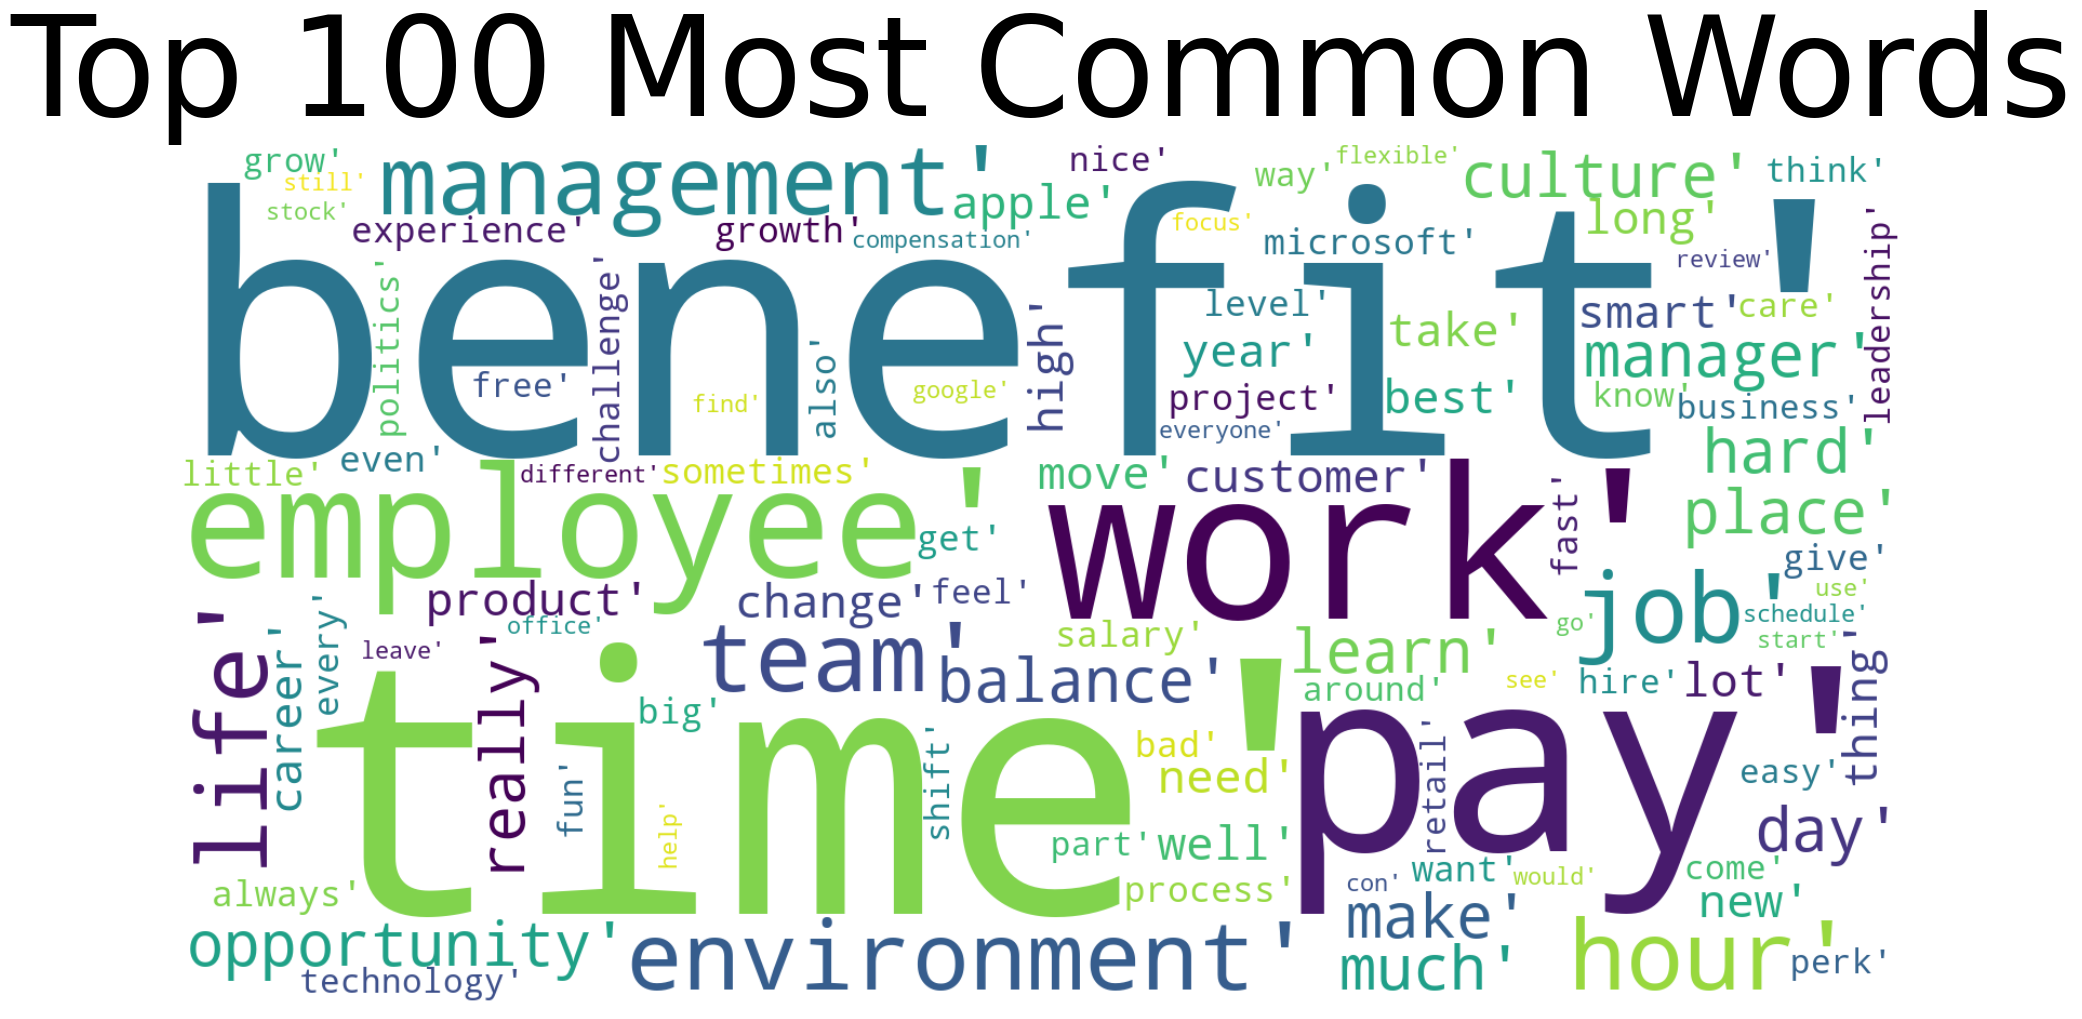

In [46]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

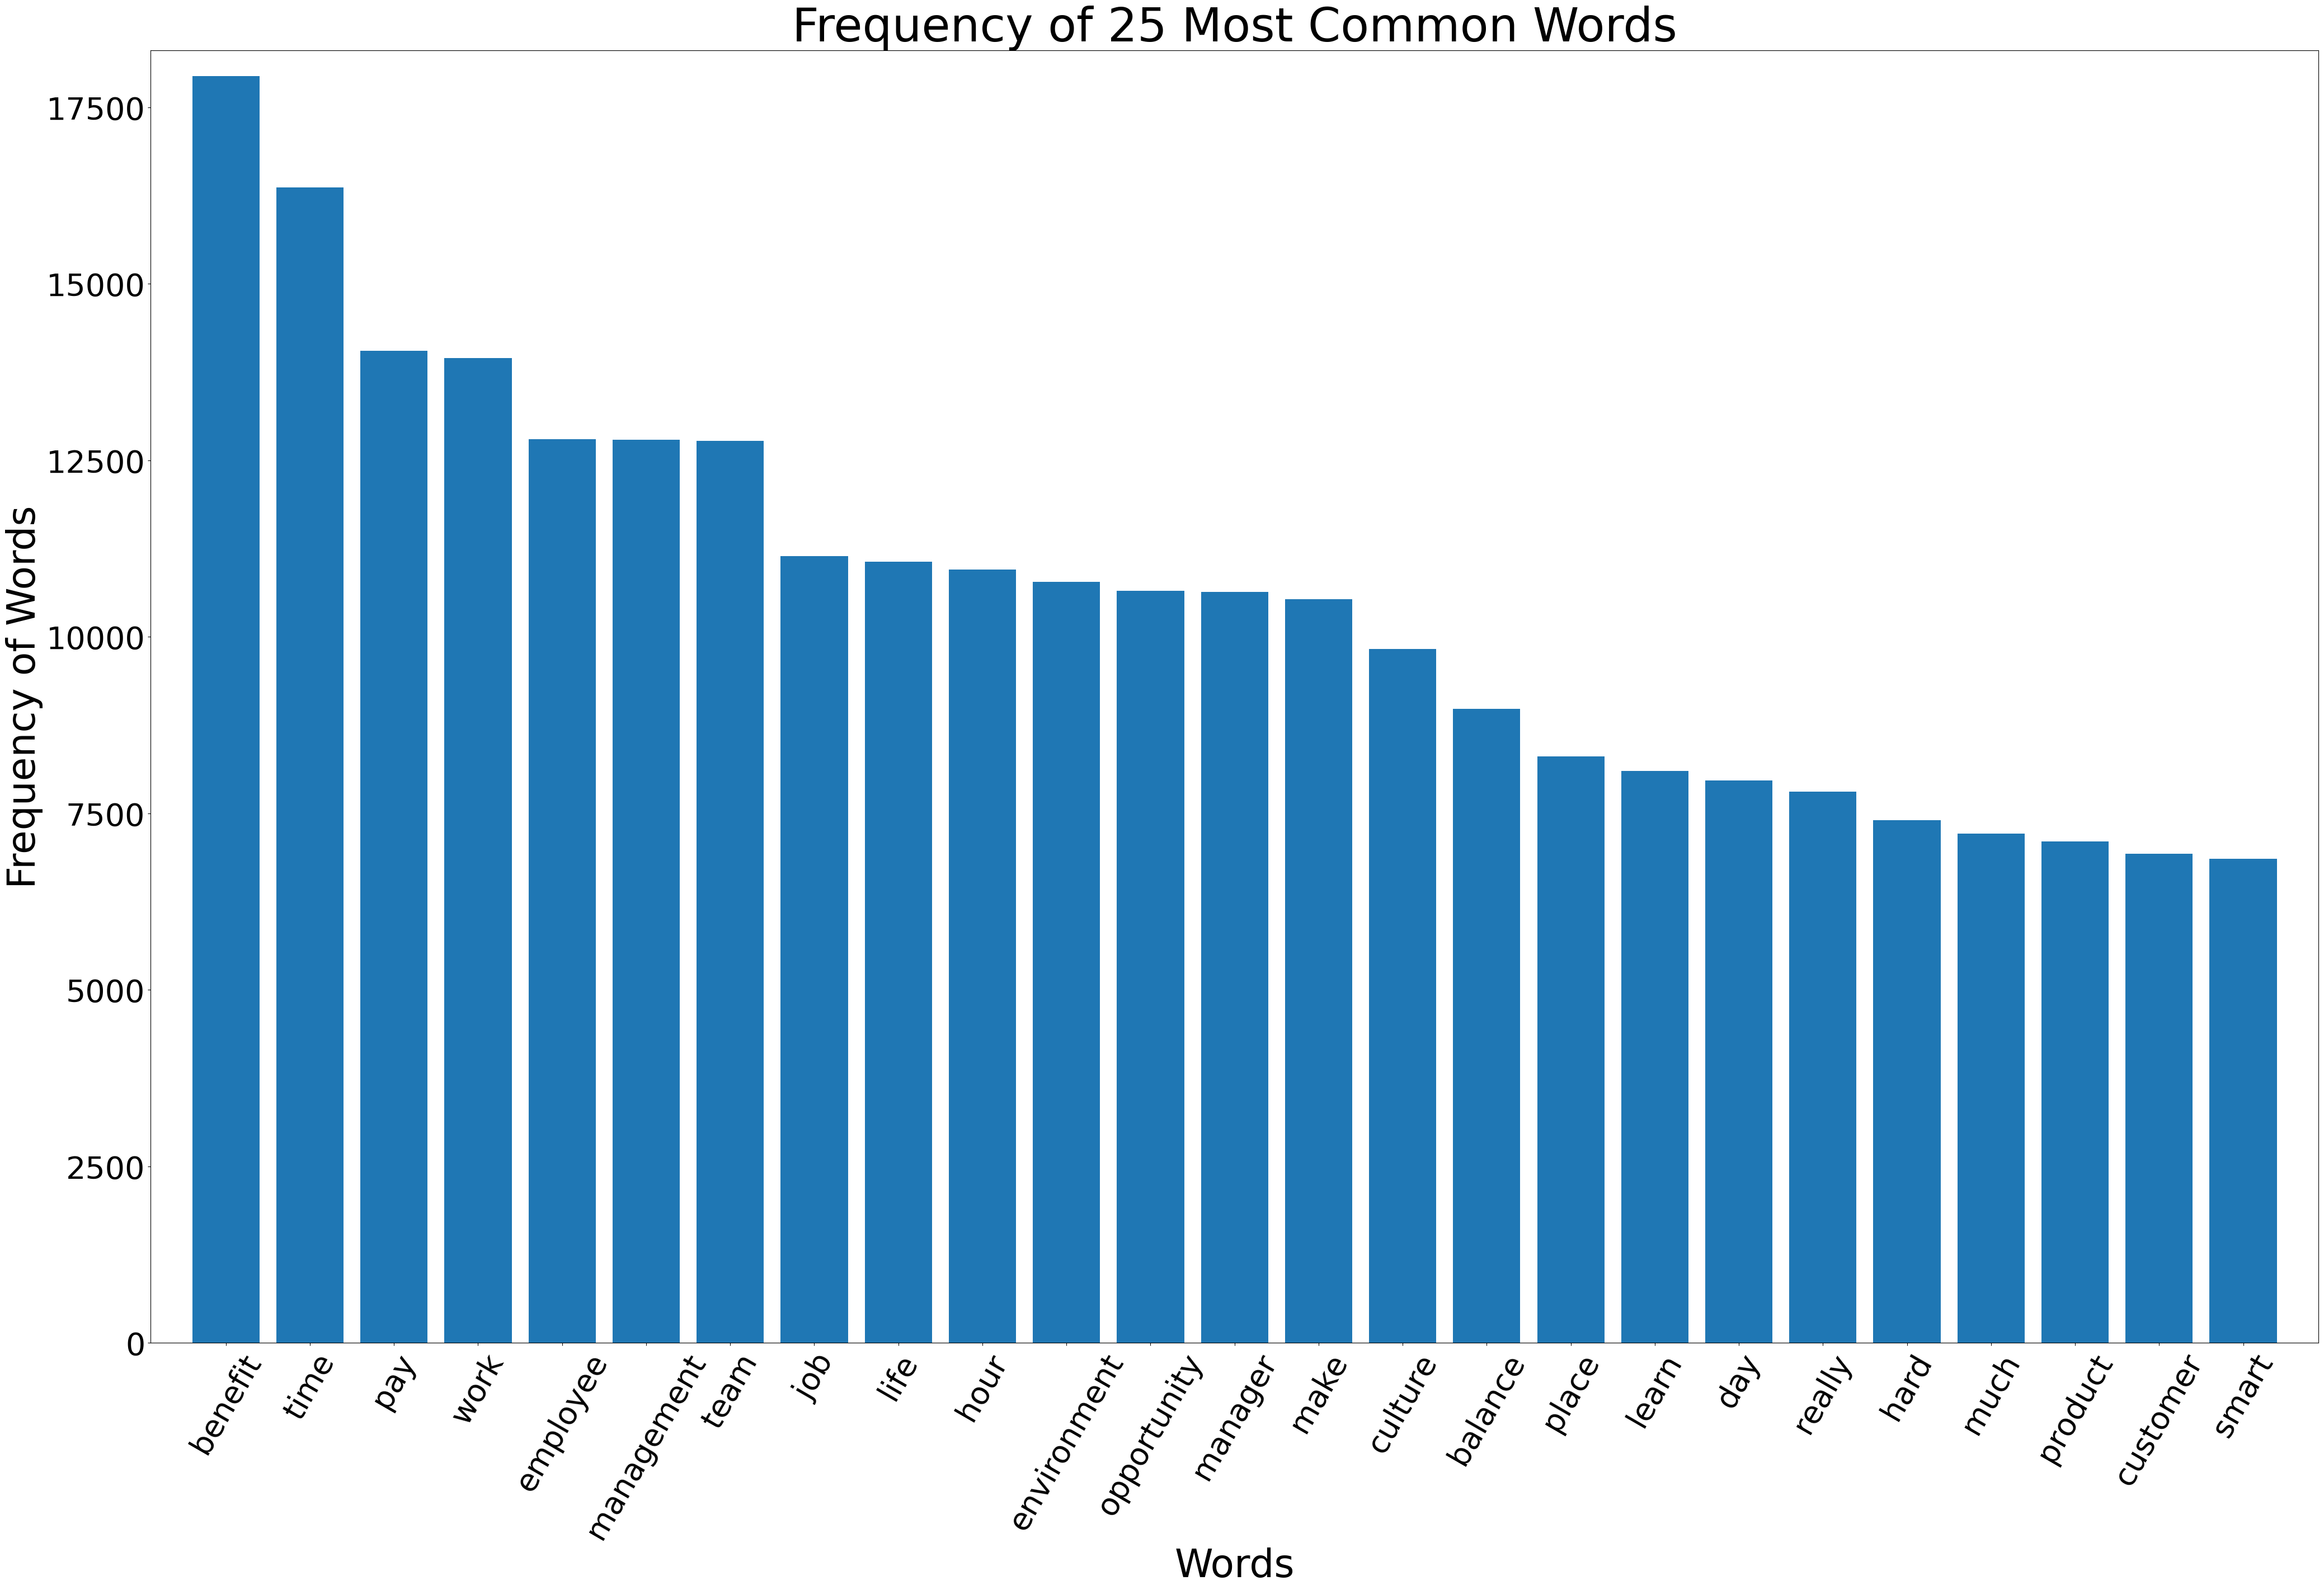

In [47]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

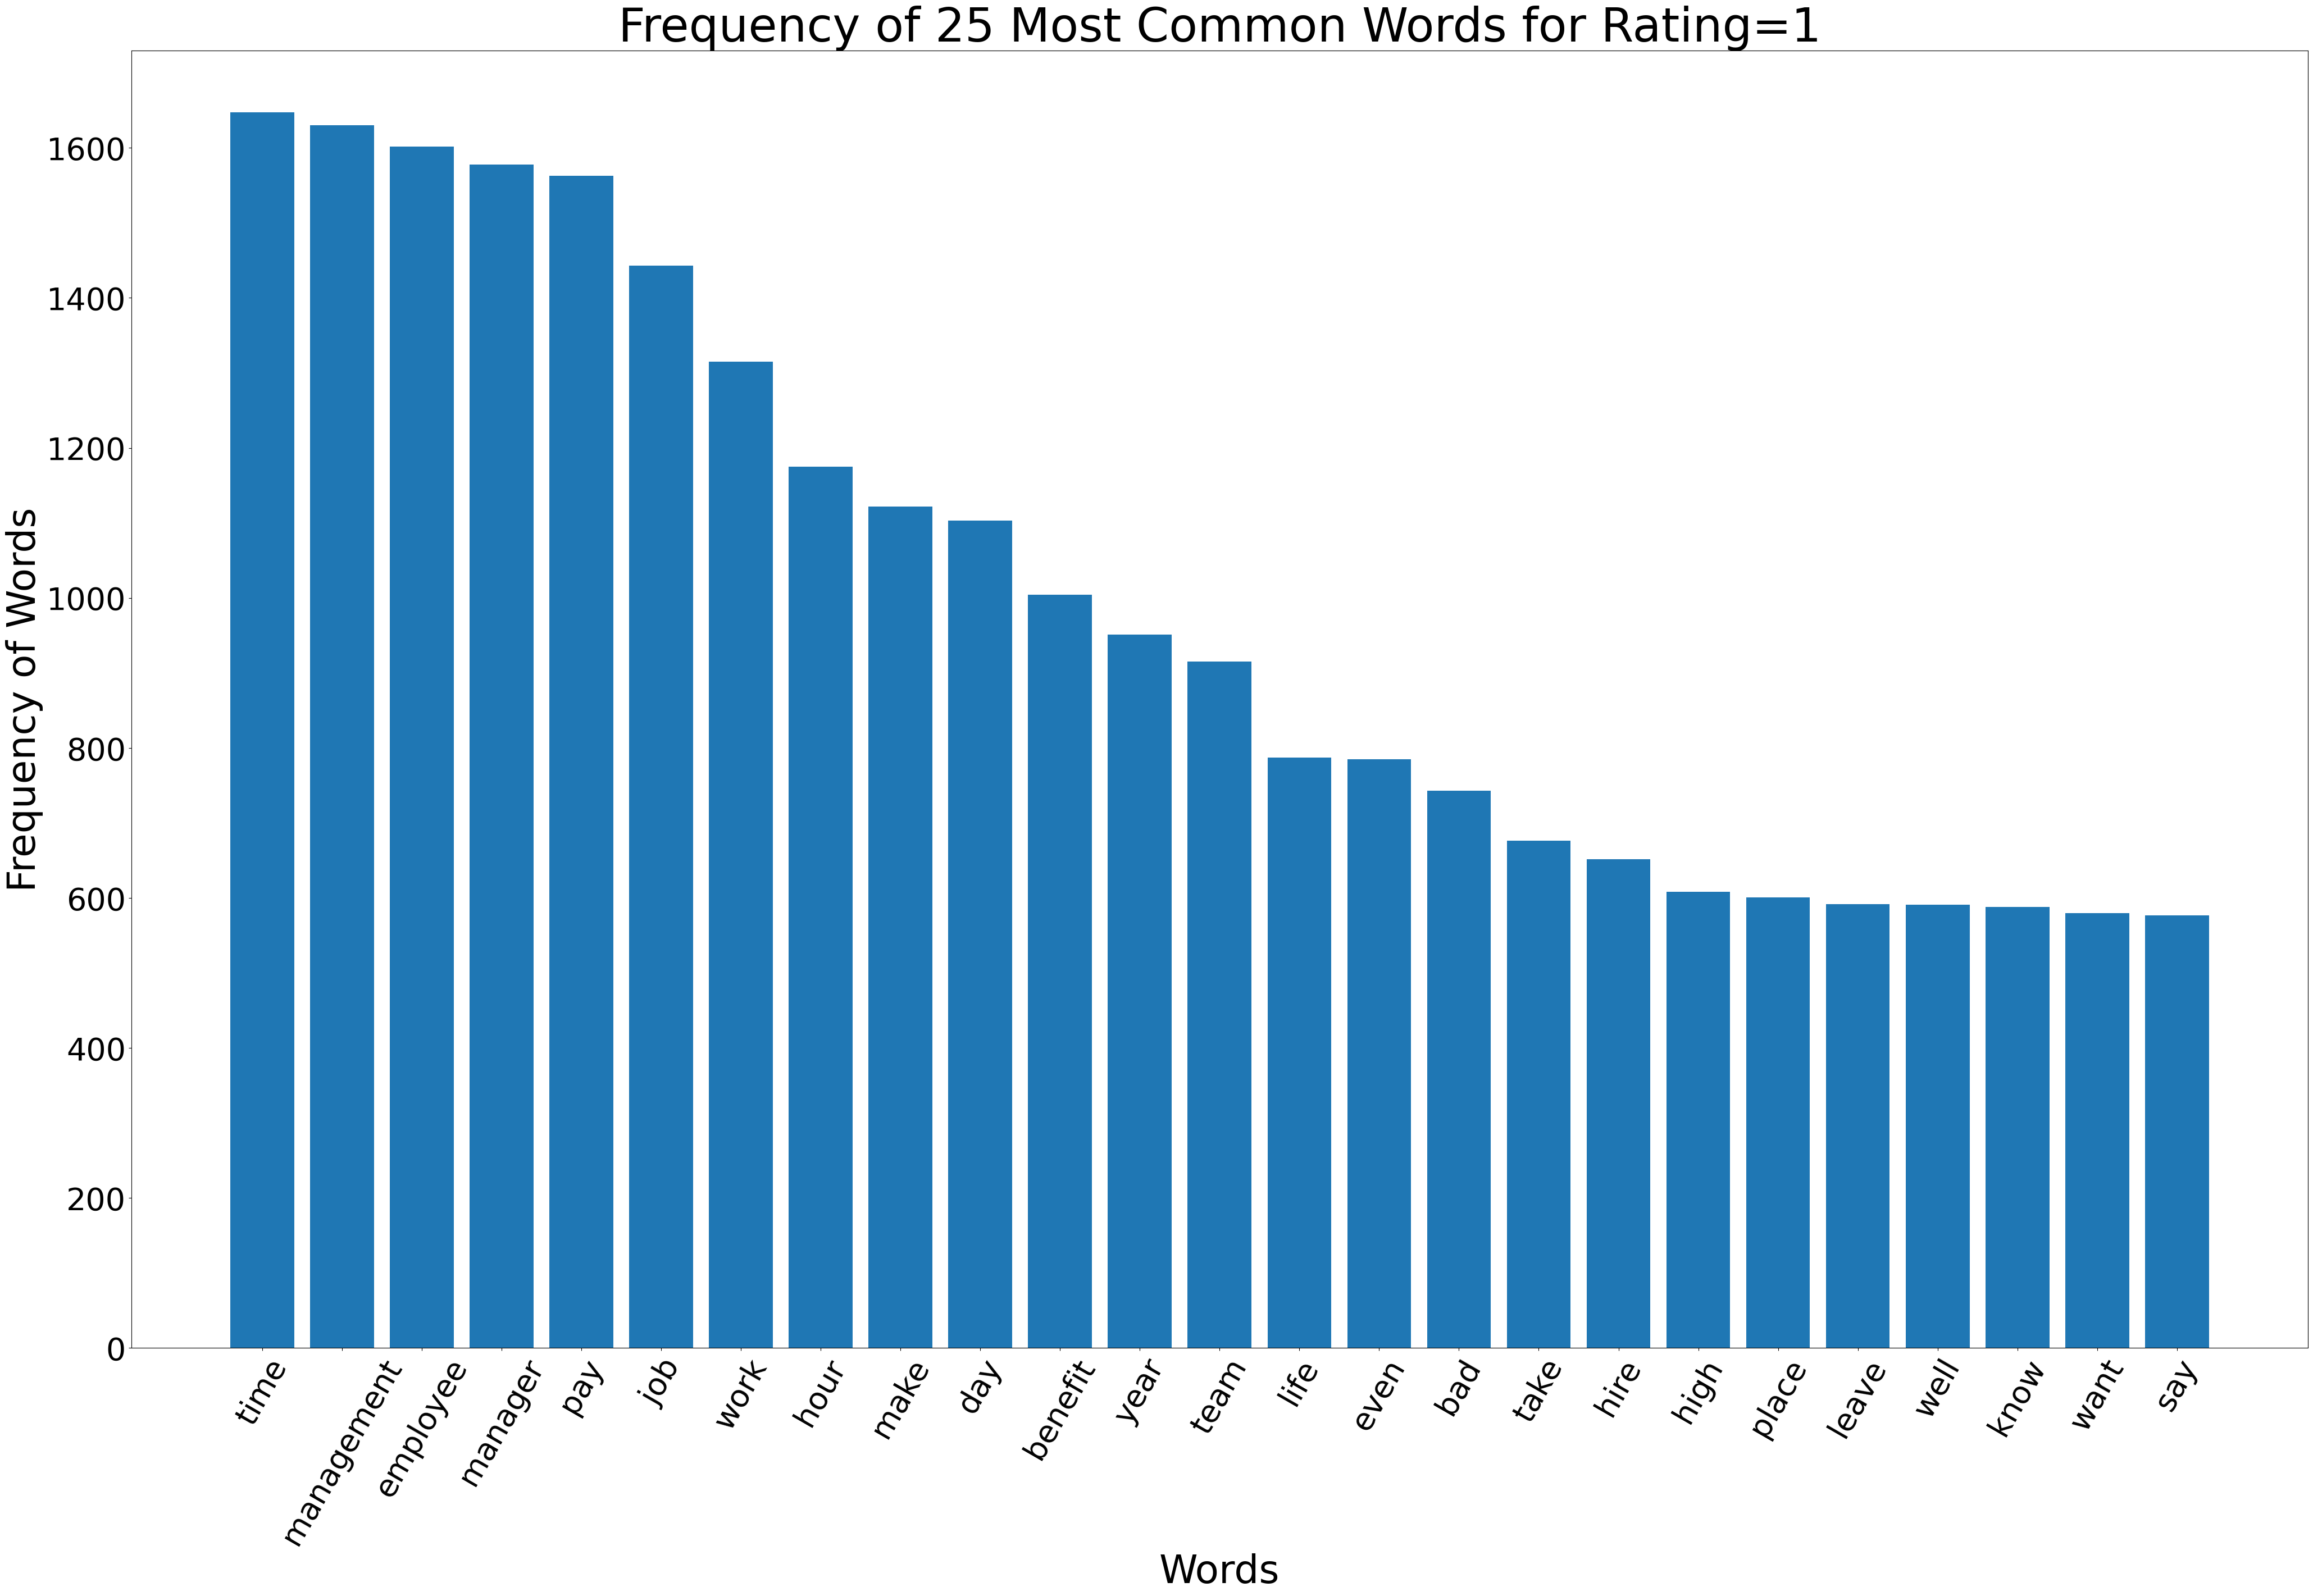

In [48]:
group_by = reviews_select.groupby('overall-ratings')['lemma_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=1', fontsize=60)
plt.show()

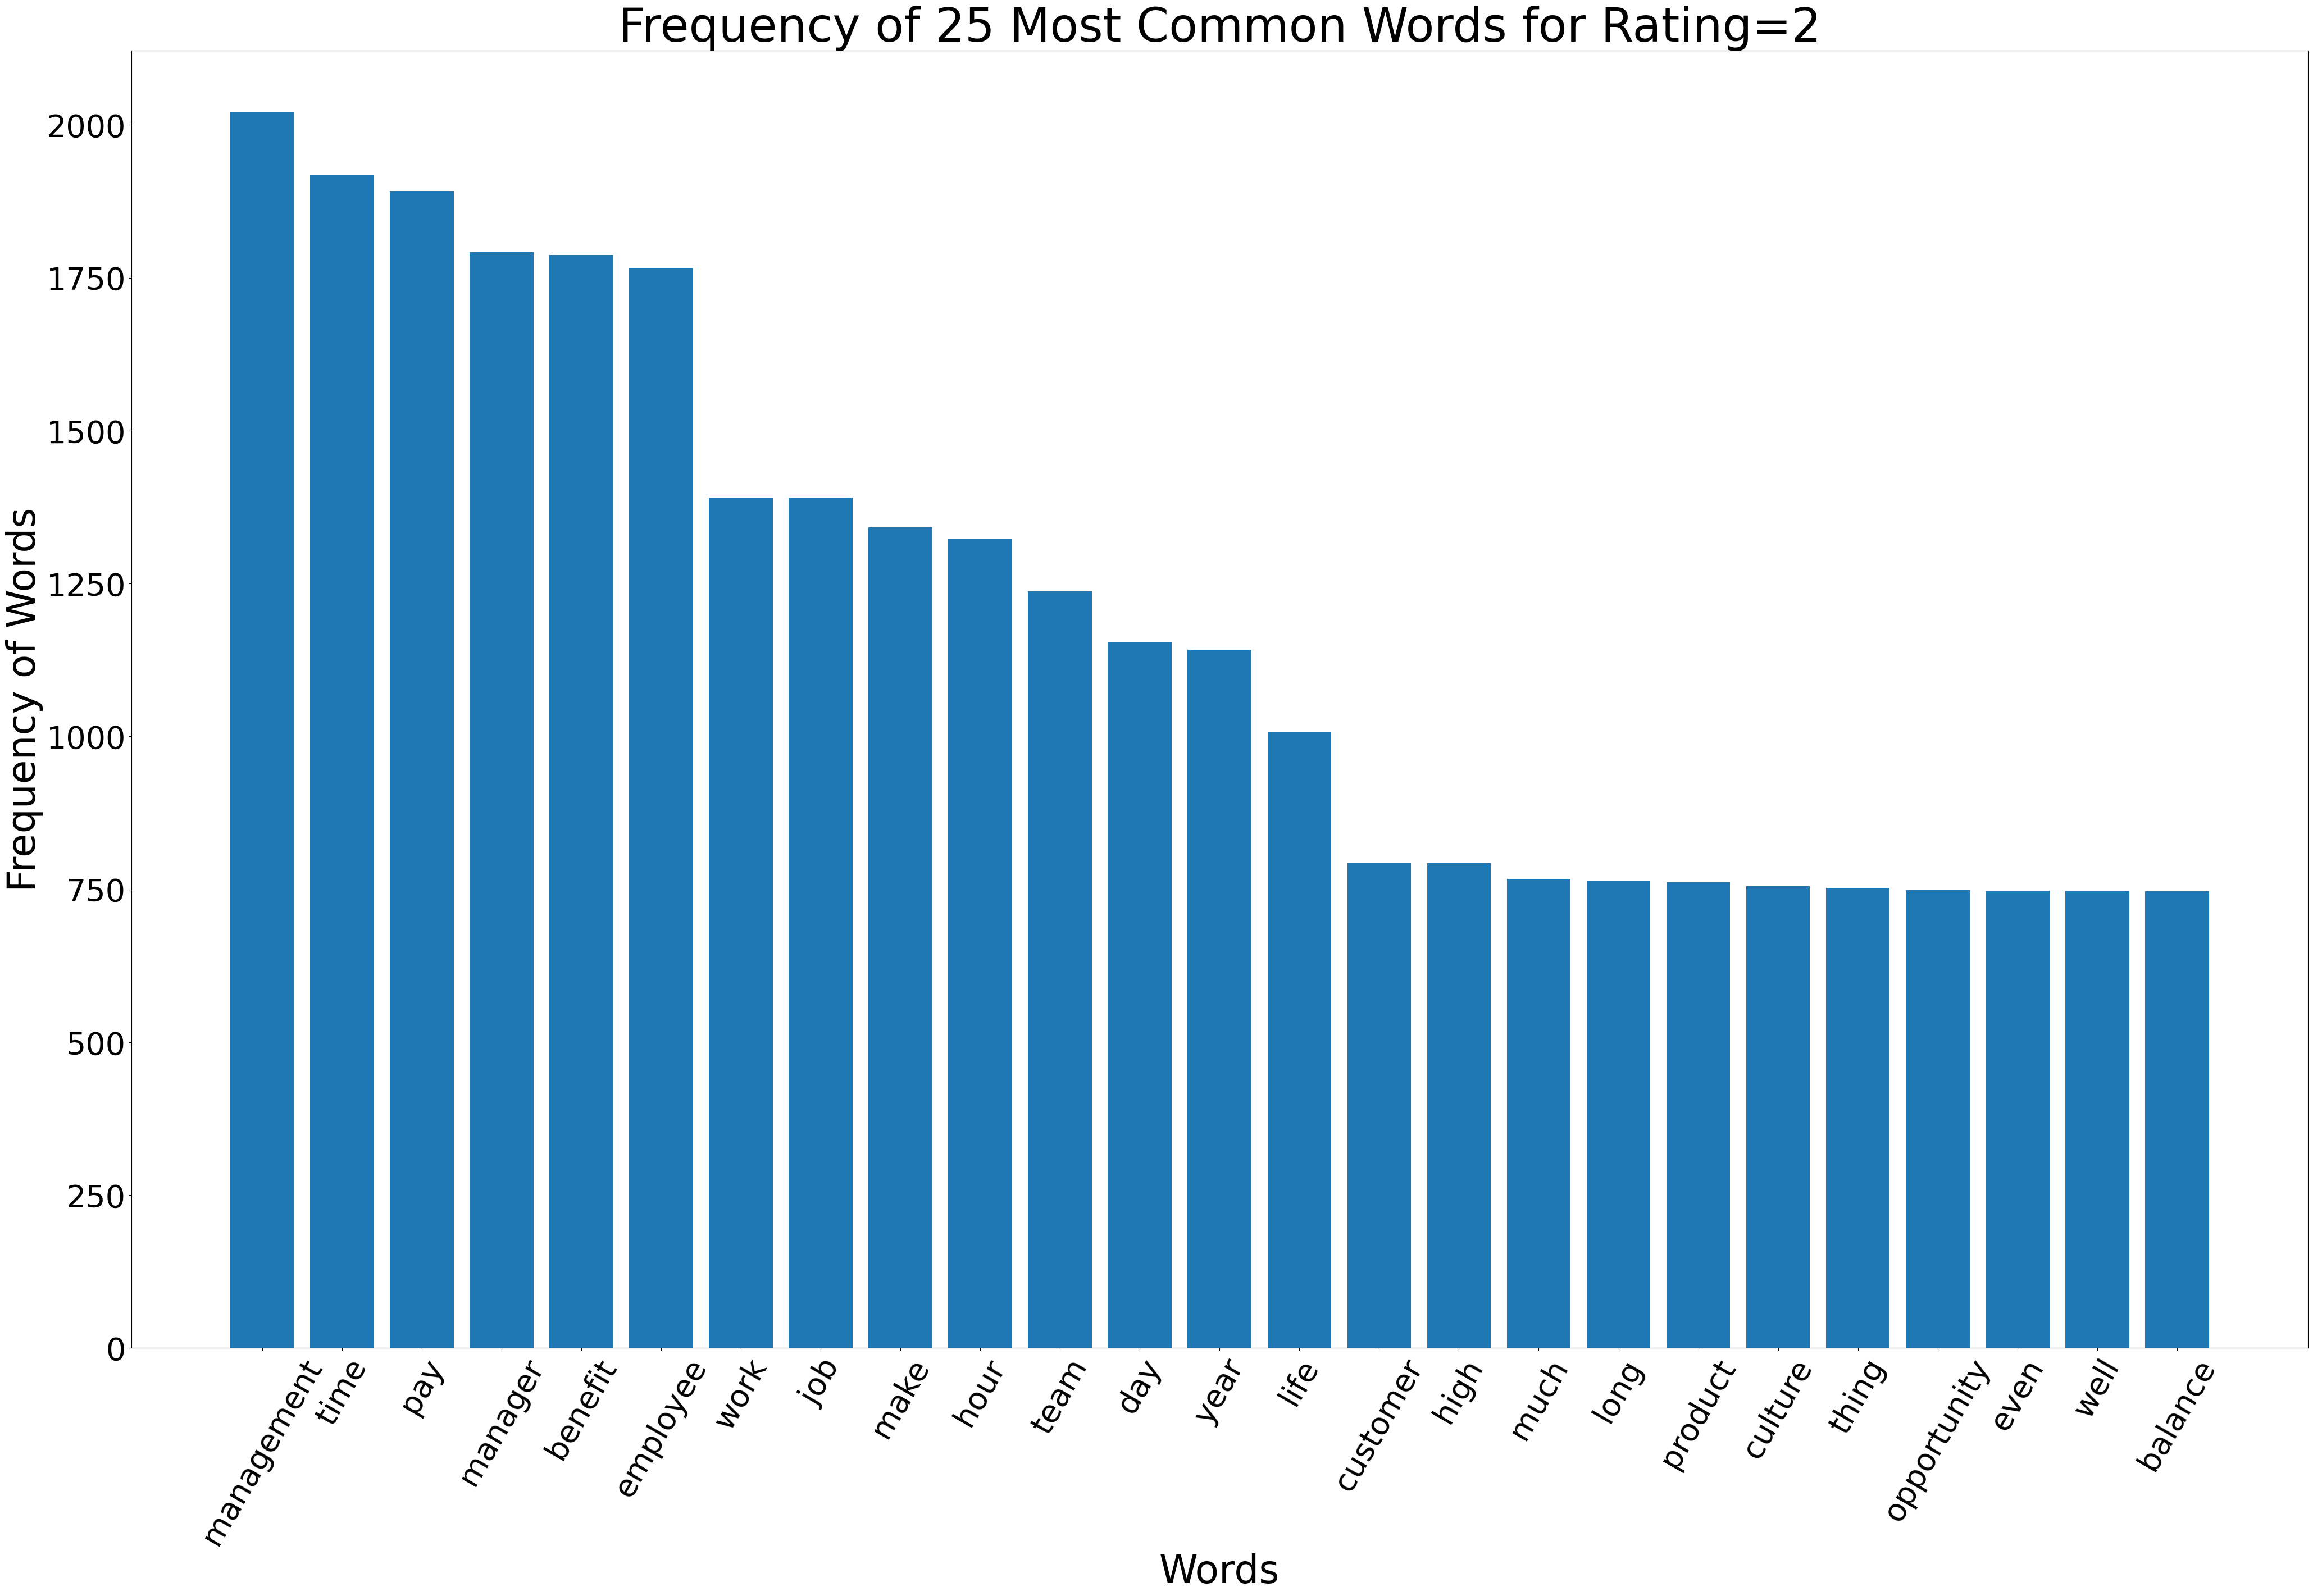

In [49]:
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=2', fontsize=60)
plt.show()

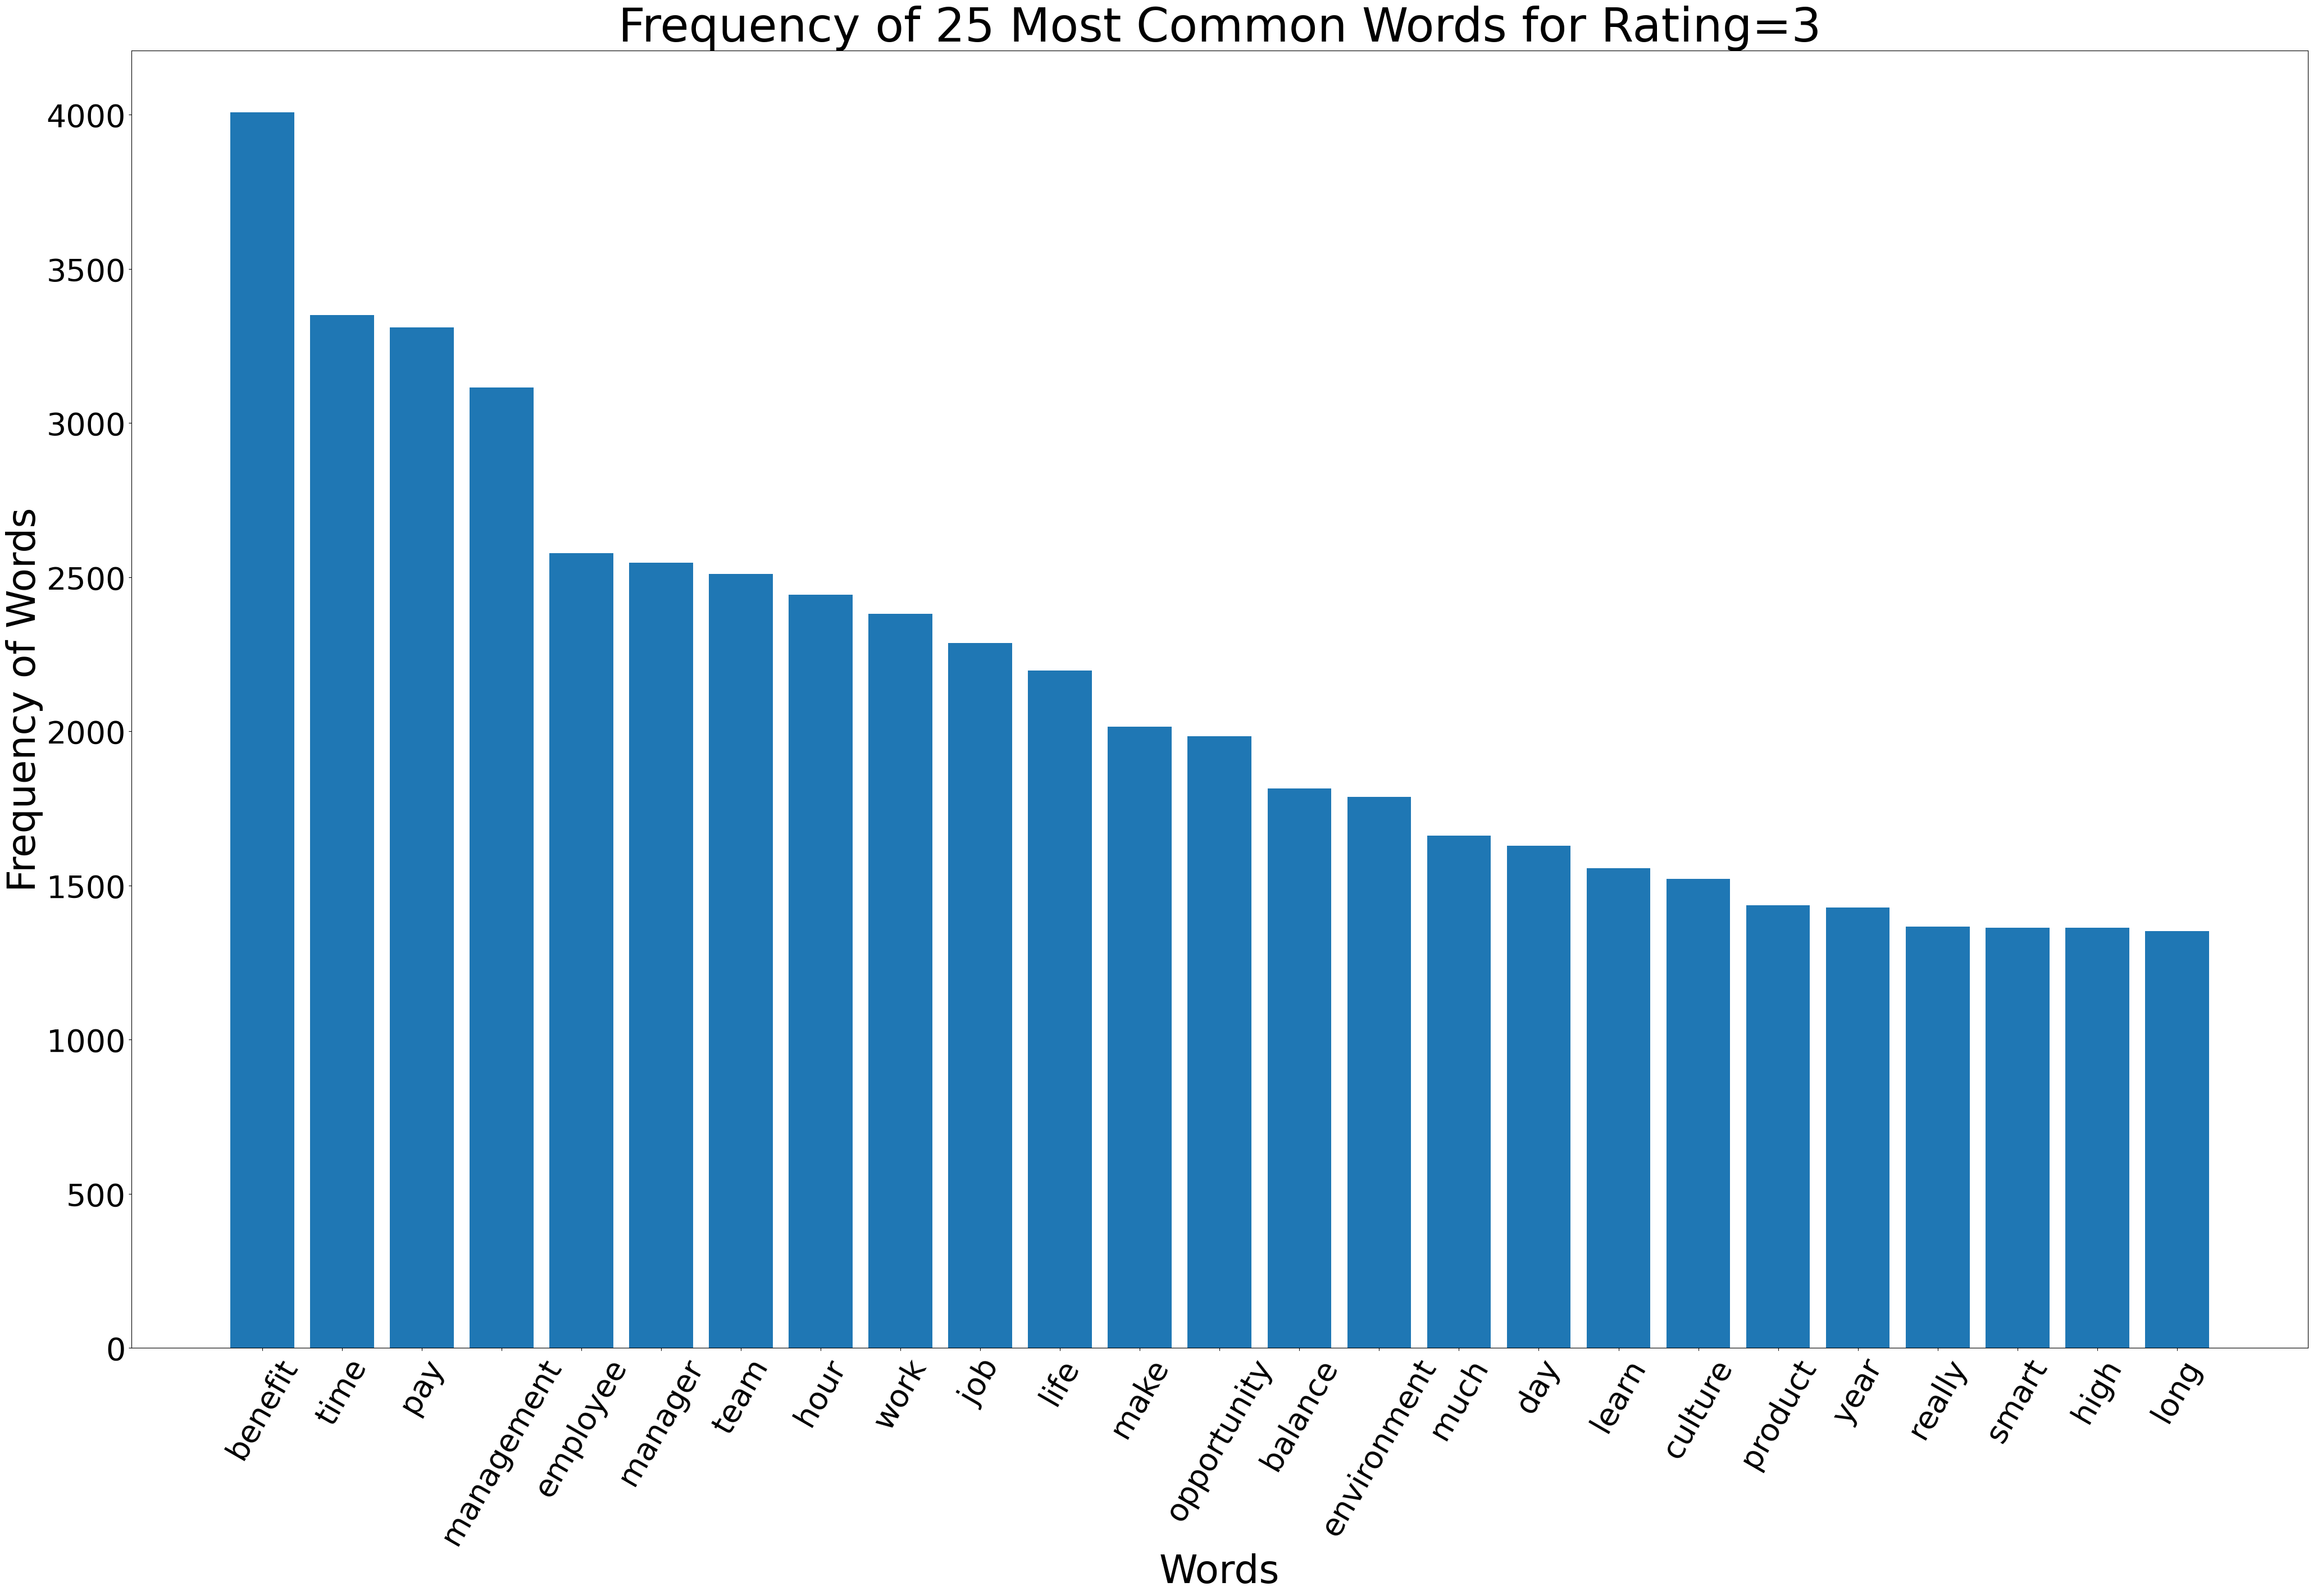

In [50]:
group_by_2 = group_by.iloc[2]
words2 = list(zip(*group_by_2))[0]
freq2 = list(zip(*group_by_2))[1]
plt.figure(figsize=(50,30))
plt.bar(words2, freq2)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=3', fontsize=60)
plt.show()

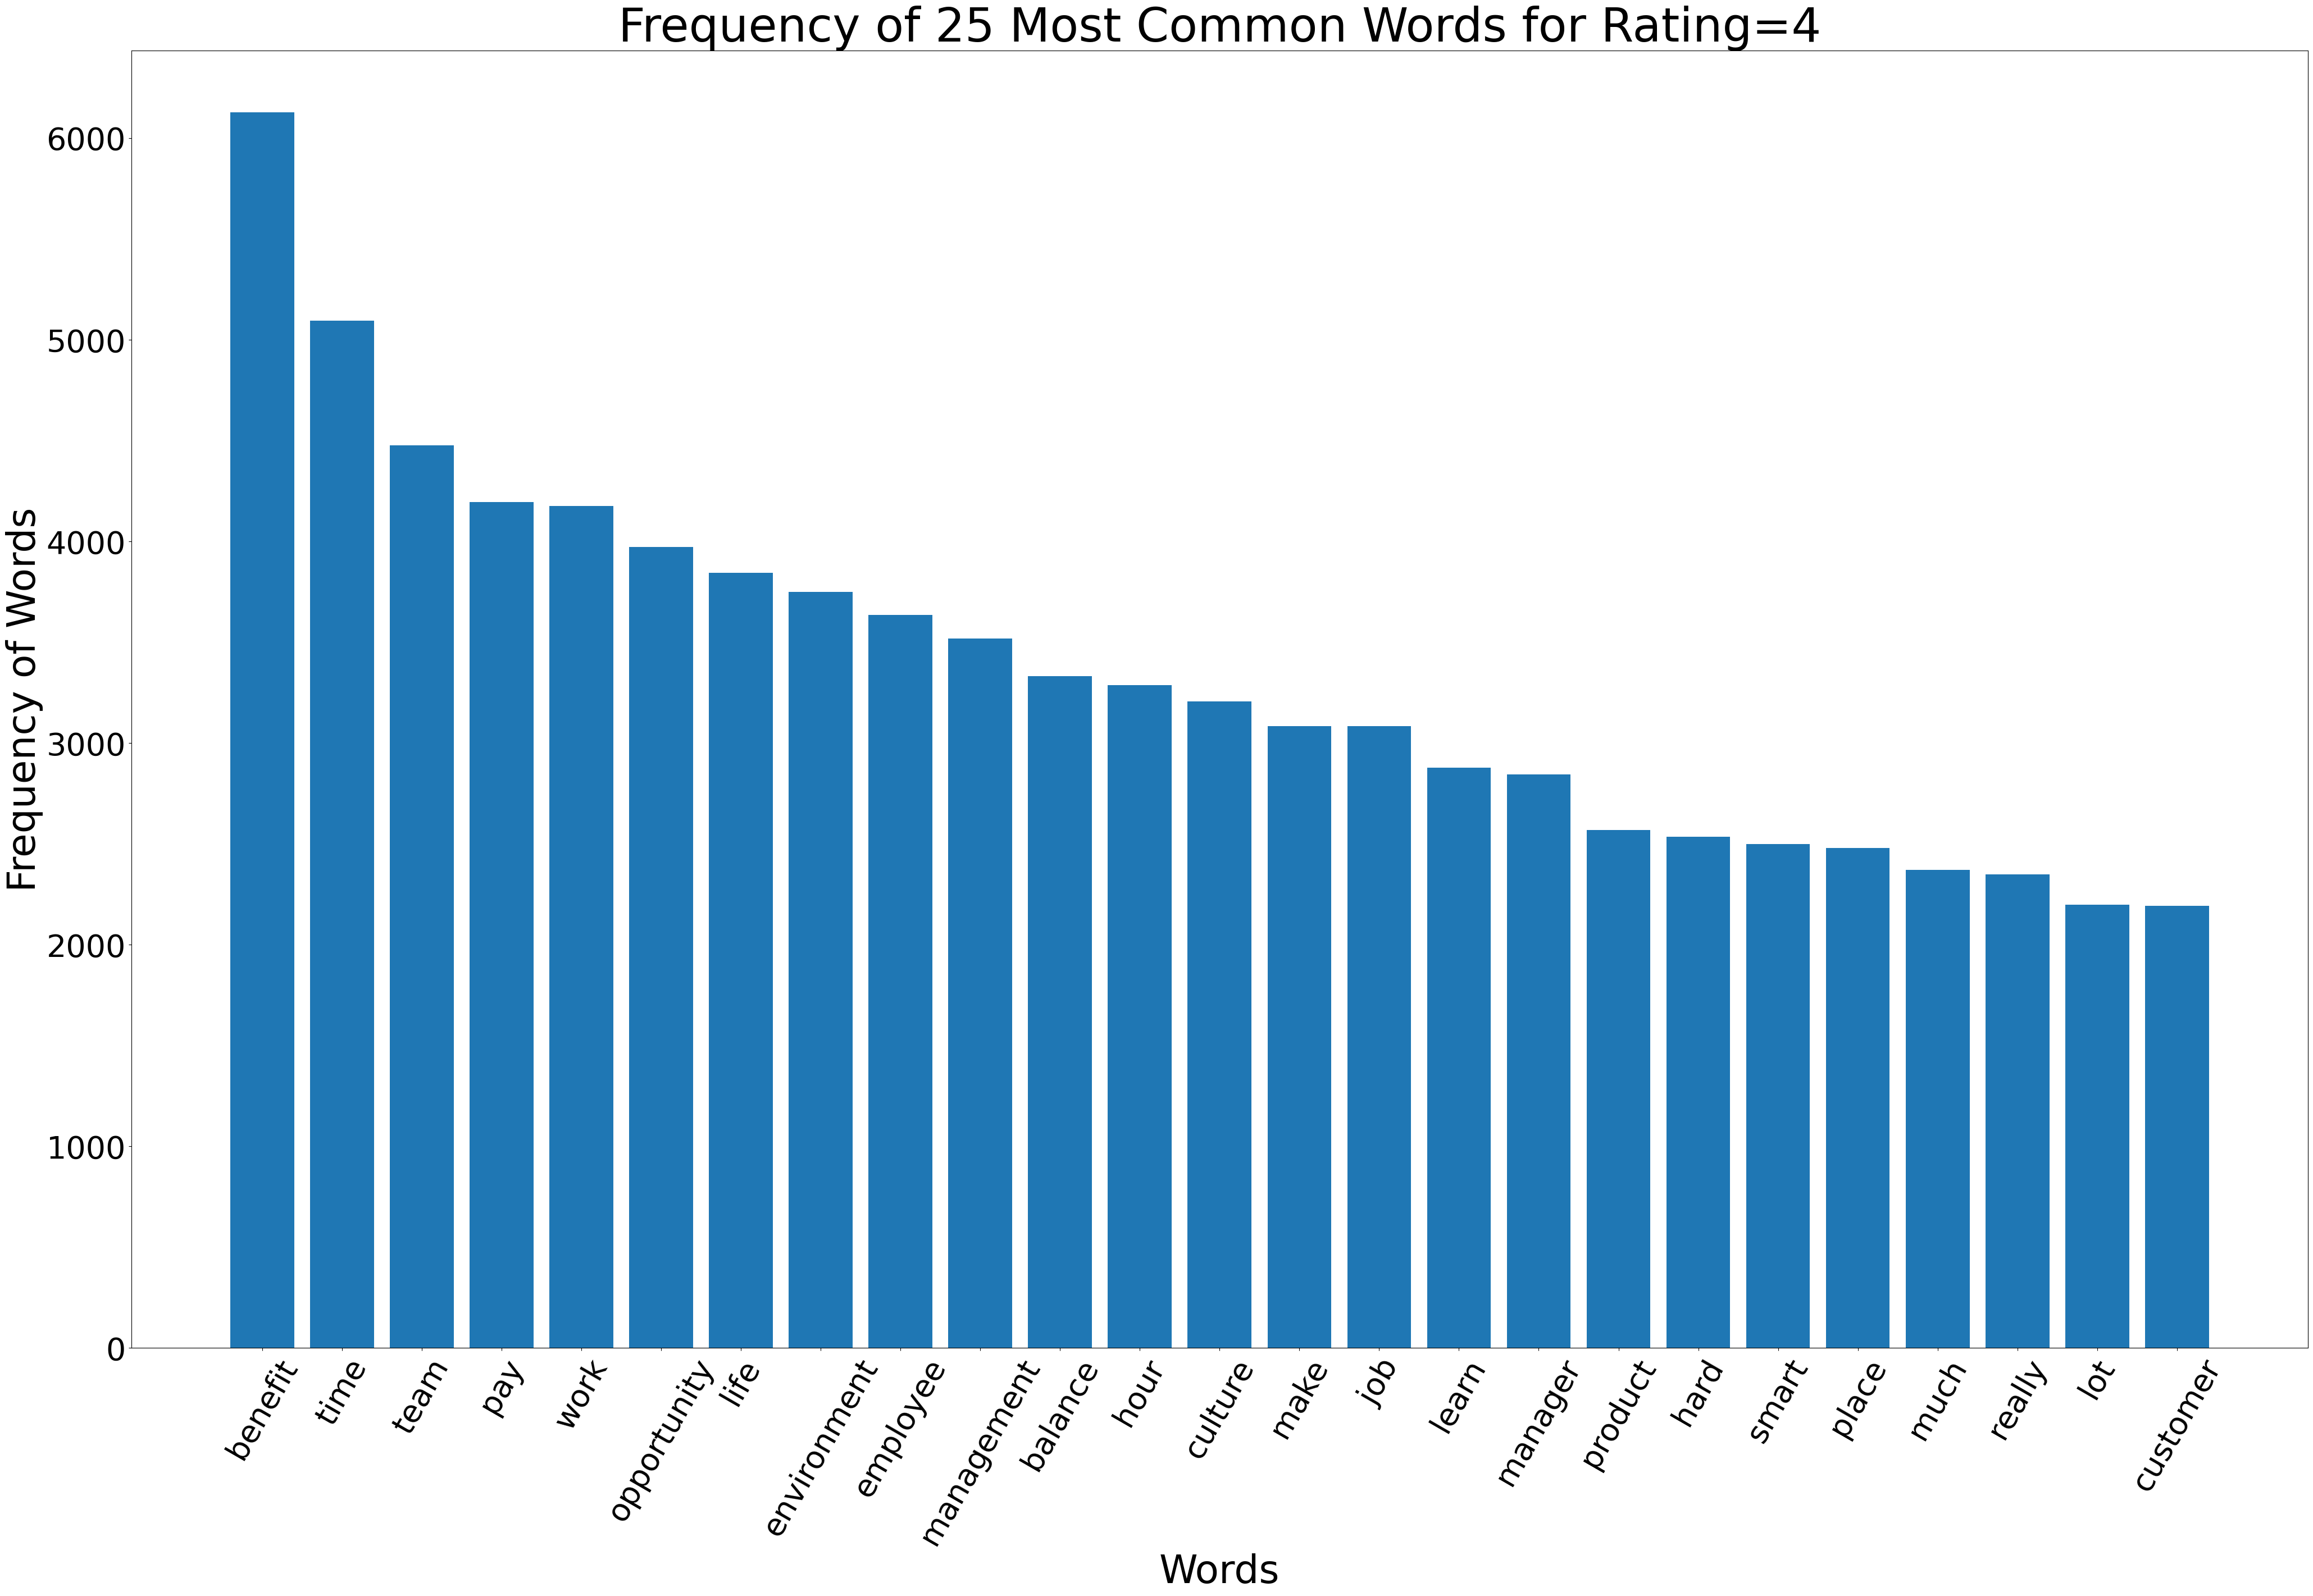

In [51]:
group_by_3 = group_by.iloc[3]
words3 = list(zip(*group_by_3))[0]
freq3 = list(zip(*group_by_3))[1]
plt.figure(figsize=(50,30))
plt.bar(words3, freq3)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=4', fontsize=60)
plt.show()

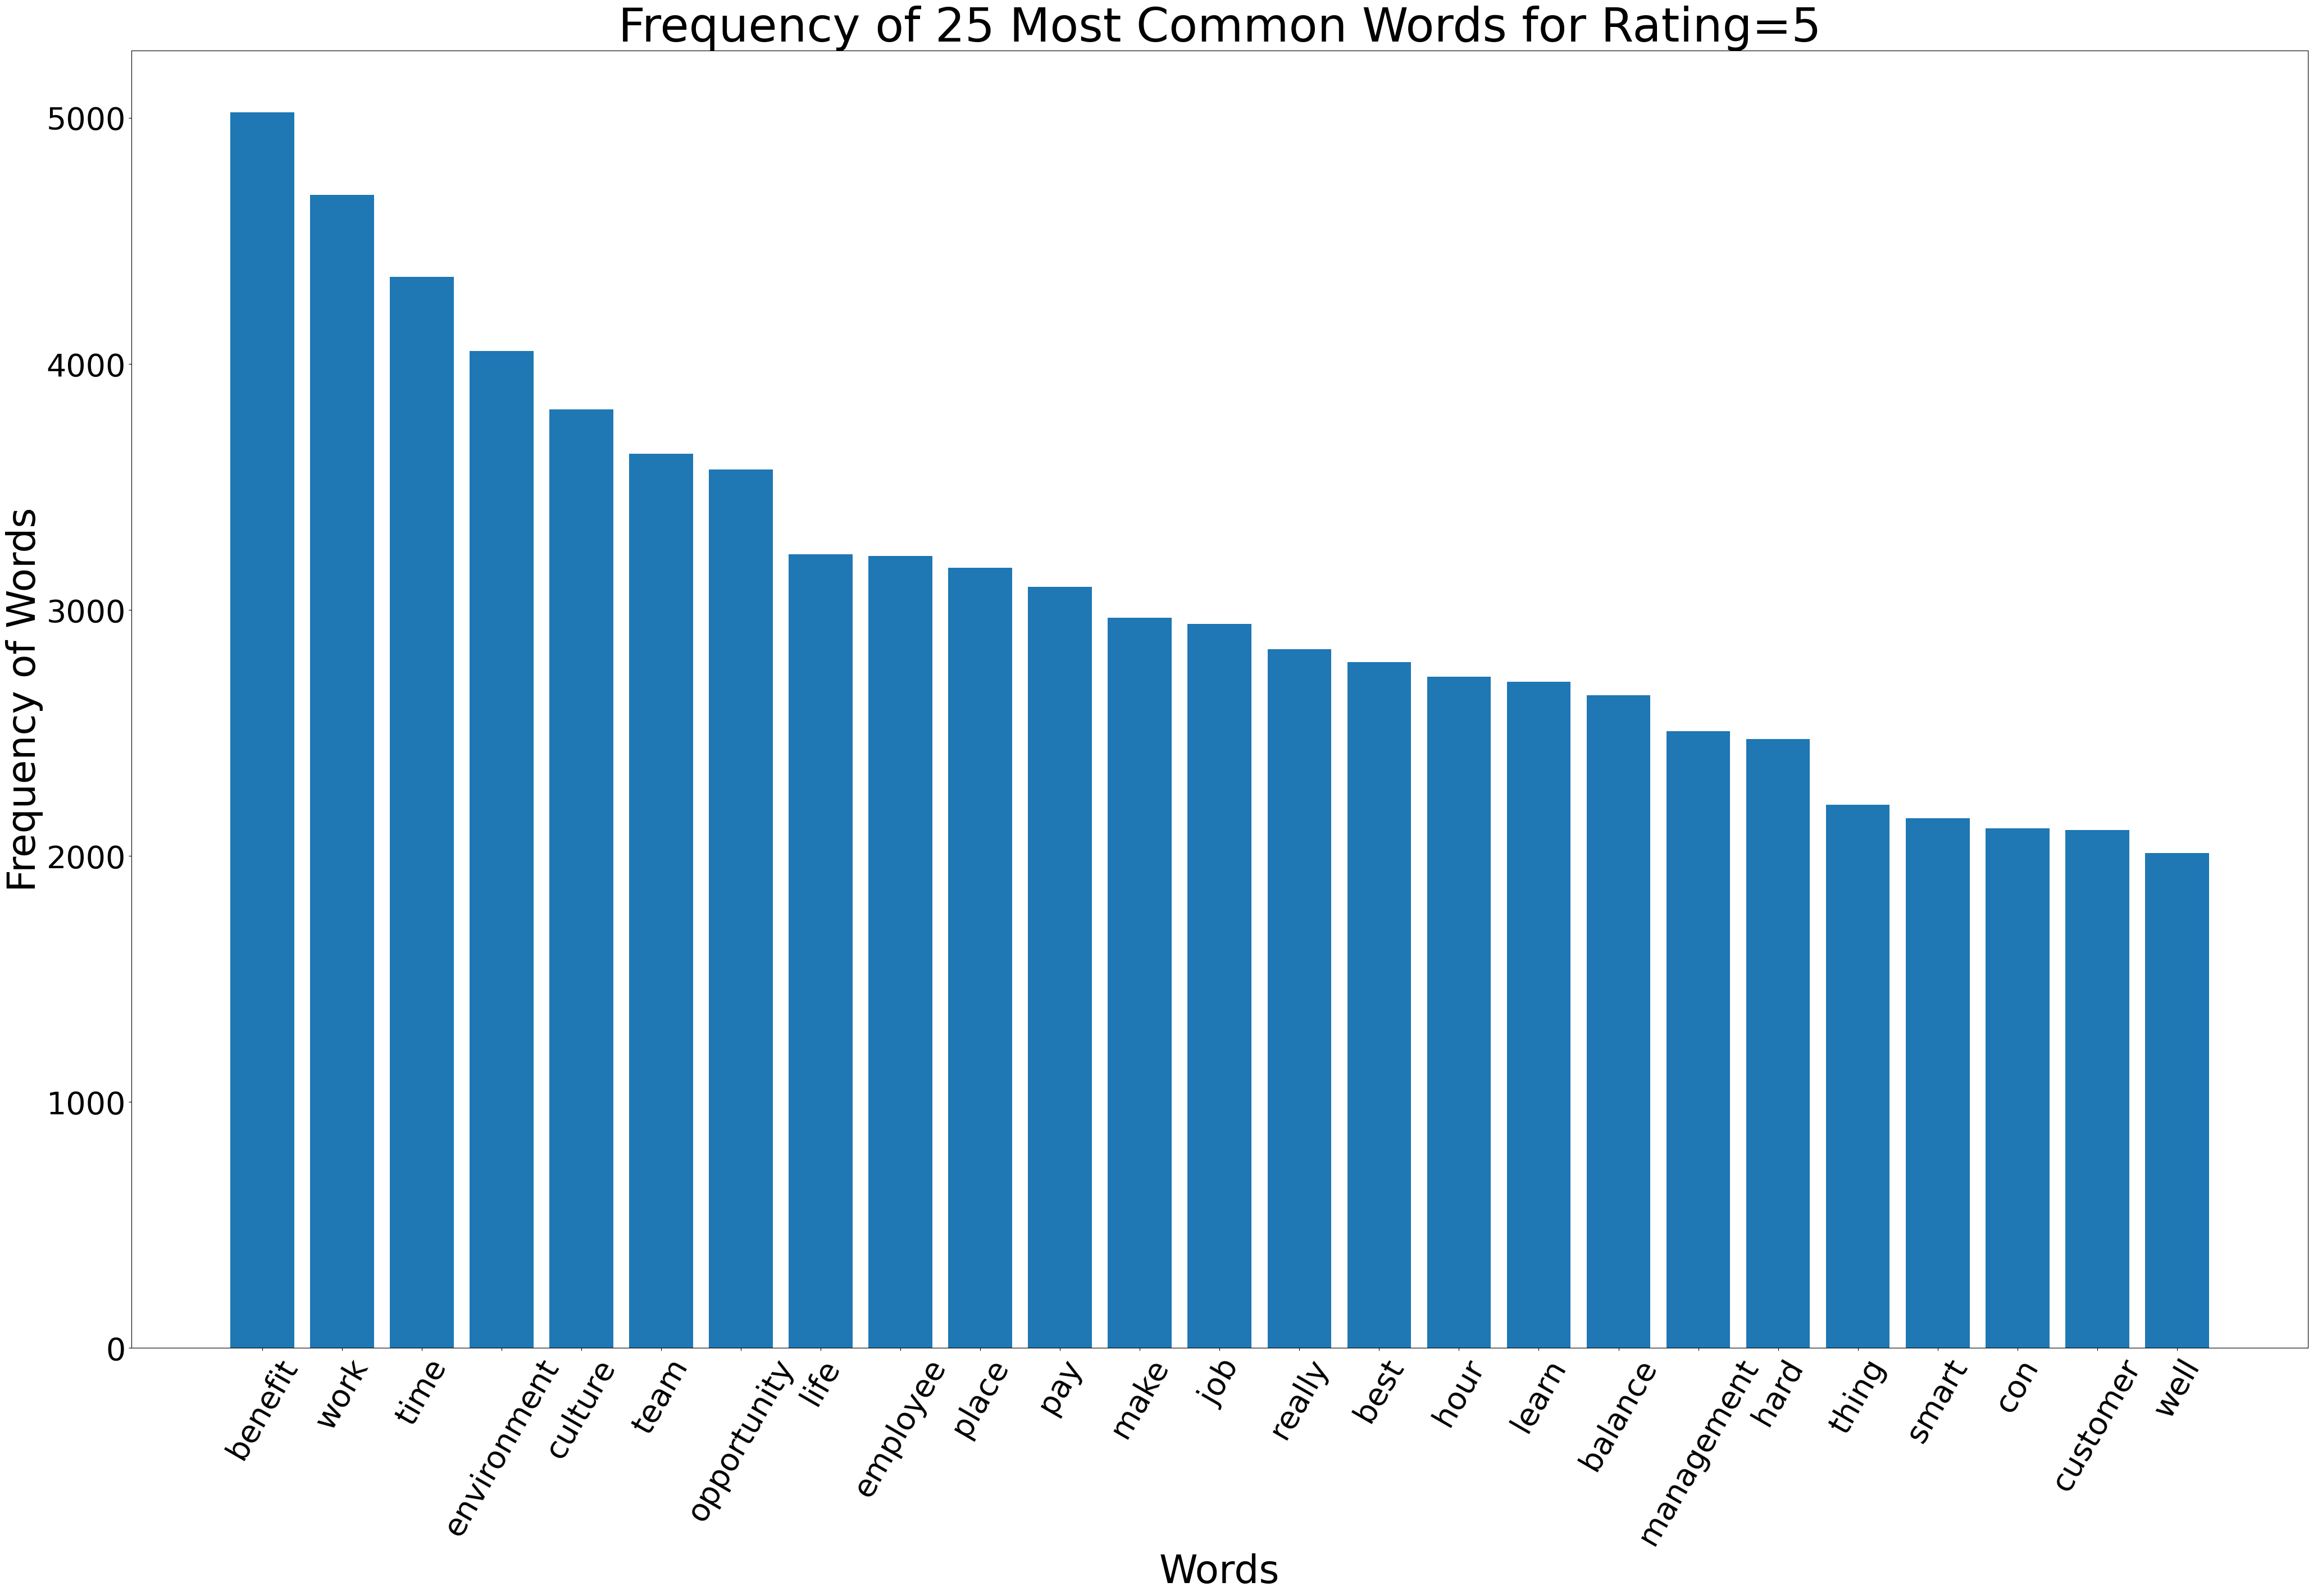

In [52]:
group_by_4 = group_by.iloc[4]
words4 = list(zip(*group_by_4))[0]
freq4 = list(zip(*group_by_4))[1]
plt.figure(figsize=(50,30))
plt.bar(words4, freq4)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=5', fontsize=60)
plt.show()

# **Topic Modelling**

In [53]:
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [54]:
# Count vectorizer

tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=500)
tf = tf_vectorizer.fit_transform(reviews_select['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names_out()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

10  15  20  401k  ability  able  access  across  actually  advance  \
0       0   0   0     0        0     0       0       0         0        0   
1       0   0   0     0        0     0       0       0         0        0   
2       0   0   0     0        0     0       0       0         0        0   
3       0   0   0     0        0     0       0       0         0        0   
4       1   0   0     0        2     0       1       1         0        1   
...    ..  ..  ..   ...      ...   ...     ...     ...       ...      ...   
64540   0   0   0     0        0     0       0       0         0        0   
64541   1   0   0     0        0     0       0       0         1        0   
64542   0   0   0     0        0     0       0       0         0        0   
64543   0   0   0     0        0     0       0       0         0        0   
64544   0   0   0     0        0     0       0       0         0        0   

       ...  worker  working  workplace  world  would  write  wrong  year  yet  \
0      ...       0        0          0      0      0      0      0     0    0   
1      ...       0        0          0      0      0      0      0     0    0   
2      ...       0        0          0      0      0      0      0     0    0   
3      ...       0        0          0      0      0      0      0     0    0   
4      ...       0        0          0      1      0      0      0     1    0   
...    ...     ...      ...        ...    ...    ...    ...    ...   ...  ...   
64540  ...       0        0          0      0      1      0      0     0    0   
64541  ...       0        0          0      0      0      0      0     1    0   
64542  ...       0        0          0      0      0      0      0     0    0   
64543  ...       0        0          0      0      0      0      0     0    0   
64544  ...       0        0          0      0      0      0      0     0    0   

       young  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
64540      0  
64541      0  
64542      0  
64543      0  
64544      0  

[64545 rows x 500 columns]

In [55]:
# Latent Dirichlet Allocation (LDA) Topic Modeling

lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=25, random_state=0).fit(tf)
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
make really work thing job want would know say year
Topic 1:
employee find job care take look offer resource none reward
Topic 2:
management nice benefit free lot food culture pay perk environment
Topic 3:
team leadership manager seem performance review benefit little support organization
Topic 4:
pay time day benefit hour job schedule week shift worker
Topic 5:
customer management microsoft product employee focus level high make change
Topic 6:
smart team opportunity project culture learn big move work google
Topic 7:
apple environment fast retail work con fun store customer pace
Topic 8:
life balance salary benefit learn technology environment career growth opportunity
Topic 9:
hour long high friendly pay flexible pressure overtime environment room


In [56]:
# Non-Negative Matrix Factorization (NMF) approach

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=500, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(reviews_select['lemma_str'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

10   15   20  401k  ability  able    access    across  actually  \
0      0.000000  0.0  0.0   0.0  0.00000   0.0  0.000000  0.000000   0.00000   
1      0.000000  0.0  0.0   0.0  0.00000   0.0  0.000000  0.000000   0.00000   
2      0.000000  0.0  0.0   0.0  0.00000   0.0  0.000000  0.000000   0.00000   
3      0.000000  0.0  0.0   0.0  0.00000   0.0  0.000000  0.000000   0.00000   
4      0.106808  0.0  0.0   0.0  0.22012   0.0  0.123792  0.118368   0.00000   
...         ...  ...  ...   ...      ...   ...       ...       ...       ...   
64540  0.000000  0.0  0.0   0.0  0.00000   0.0  0.000000  0.000000   0.00000   
64541  0.086951  0.0  0.0   0.0  0.00000   0.0  0.000000  0.000000   0.09398   
64542  0.000000  0.0  0.0   0.0  0.00000   0.0  0.000000  0.000000   0.00000   
64543  0.000000  0.0  0.0   0.0  0.00000   0.0  0.000000  0.000000   0.00000   
64544  0.000000  0.0  0.0   0.0  0.00000   0.0  0.000000  0.000000   0.00000   

        advance  ...  worker  working  workplace     world     would  write  \
0      0.000000  ...     0.0      0.0        0.0  0.000000  0.000000    0.0   
1      0.000000  ...     0.0      0.0        0.0  0.000000  0.000000    0.0   
2      0.000000  ...     0.0      0.0        0.0  0.000000  0.000000    0.0   
3      0.000000  ...     0.0      0.0        0.0  0.000000  0.000000    0.0   
4      0.119089  ...     0.0      0.0        0.0  0.096553  0.000000    0.0   
...         ...  ...     ...      ...        ...       ...       ...    ...   
64540  0.000000  ...     0.0      0.0        0.0  0.000000  0.436223    0.0   
64541  0.000000  ...     0.0      0.0        0.0  0.000000  0.000000    0.0   
64542  0.000000  ...     0.0      0.0        0.0  0.000000  0.000000    0.0   
64543  0.000000  ...     0.0      0.0        0.0  0.000000  0.000000    0.0   
64544  0.000000  ...     0.0      0.0        0.0  0.000000  0.000000    0.0   

       wrong      year  yet  young  
0        0.0  0.000000  0.0    0.0  
1        0.0  0.000000  0.0    0.0  
2        0.0  0.000000  0.0    0.0  
3        0.0  0.000000  0.0    0.0  
4        0.0  0.082232  0.0    0.0  
...      ...       ...  ...    ...  
64540    0.0  0.000000  0.0    0.0  
64541    0.0  0.066944  0.0    0.0  
64542    0.0  0.000000  0.0    0.0  
64543    0.0  0.000000  0.0    0.0  
64544    0.0  0.000000  0.0    0.0  

[64545 rows x 500 columns]

In [57]:
nmf = NMF(n_components=10, random_state=0, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
team employee manager make work management product customer really apple
Topic 1:
life balance salary compensation poor challenge benefit bad technology difficult
Topic 2:
pay benefit management decent job low retail schedule employee stock
Topic 3:
con think work really love best google everything find awesome
Topic 4:
place best nothing none nice learn fun much bad think
Topic 5:
hour long day shift week flexible 10 work break overtime
Topic 6:
environment work fast friendly nice pace salary fun competitive paced
Topic 7:
opportunity learn growth lot career grow smart new challenge big
Topic 8:
culture salary perk food smart leadership awesome office open benefit
Topic 9:
time part full take schedule job vacation break day flexible


### Add both the LDA and NMF topics into our dataframe for further analysis and remap the integer topics into our subjectively derived topic labels.

In [58]:
nmf_topic_values = nmf.transform(tfidf)
reviews_select['nmf_topics'] = nmf_topic_values.argmax(axis=1)
lda_topic_values = lda_model.transform(tf)
reviews_select['lda_topics'] = lda_topic_values.argmax(axis=1)
lda_remap = {0: 'Great work environment', 1: 'Care about Employees', 2: 'Perks/Benefits', 3: 'Management', 4: 'Work shifts', 5: 'Customer management', 
             6: 'Opportunity', 7: 'Great Company/Job', 8: 'Skill Building/career growth', 9: 'Flexible Work Hours'}
reviews_select['lda_topics'] = reviews_select['lda_topics'].map(lda_remap)
nmf_remap = {0: 'Management', 
             1: 'Work/life balance', 2: 'Benefits', 3: 'Care about Employees', 
             4: 'Fun Work Culture', 5: 'Flexible Work Hours', 6: 'Great work environment', 7: 'Opportunity', 8: 'Salary offers', 9: 'Leave policies'}
reviews_select['nmf_topics'] = reviews_select['nmf_topics'].map(nmf_remap)

### Examining the frequency of topics produced by NMF we can see that the first 5 topics show up at a relatively similar frequency.

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

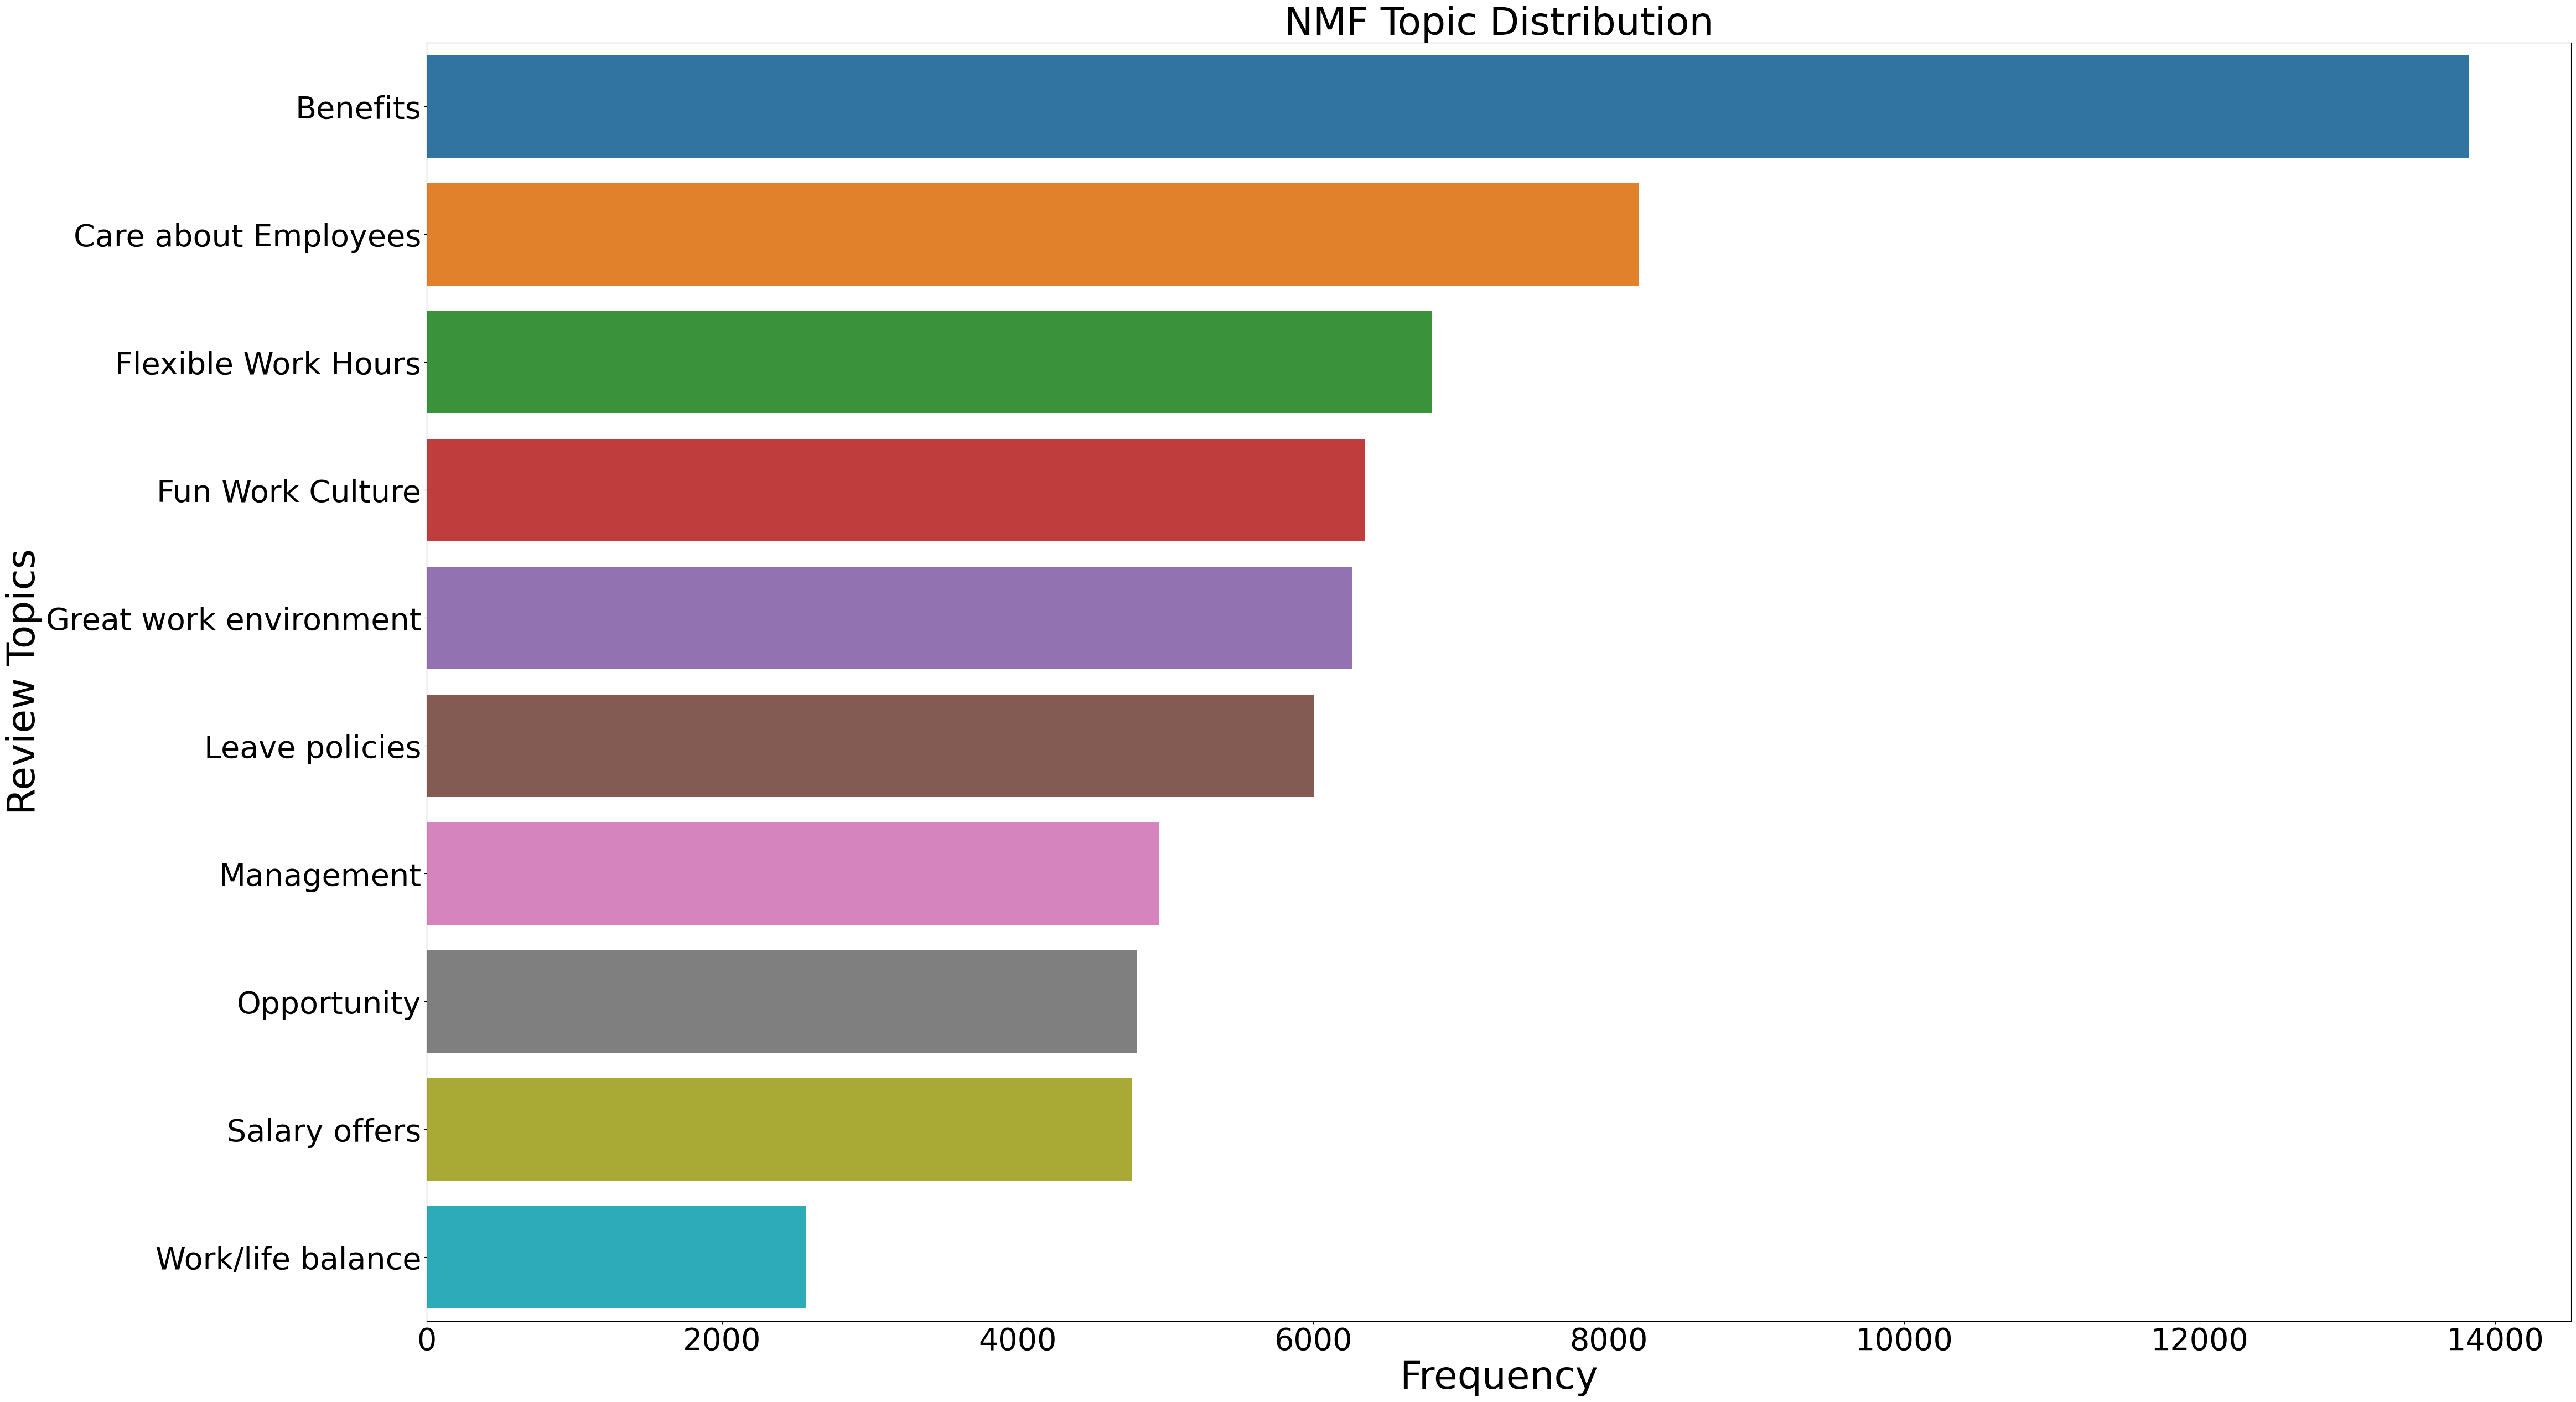

In [59]:
nmf_x = reviews_select['nmf_topics'].value_counts()
nmf_y = nmf_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x=nmf_x, y=nmf_y.index)
plt.title("NMF Topic Distribution", fontsize=50)
plt.ylabel('Review Topics', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Frequency', fontsize=50)
plt.xticks(fontsize=40)

### Let’s split our data and examine the topics for the negative reviews based on ratings of 1 and 2.

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

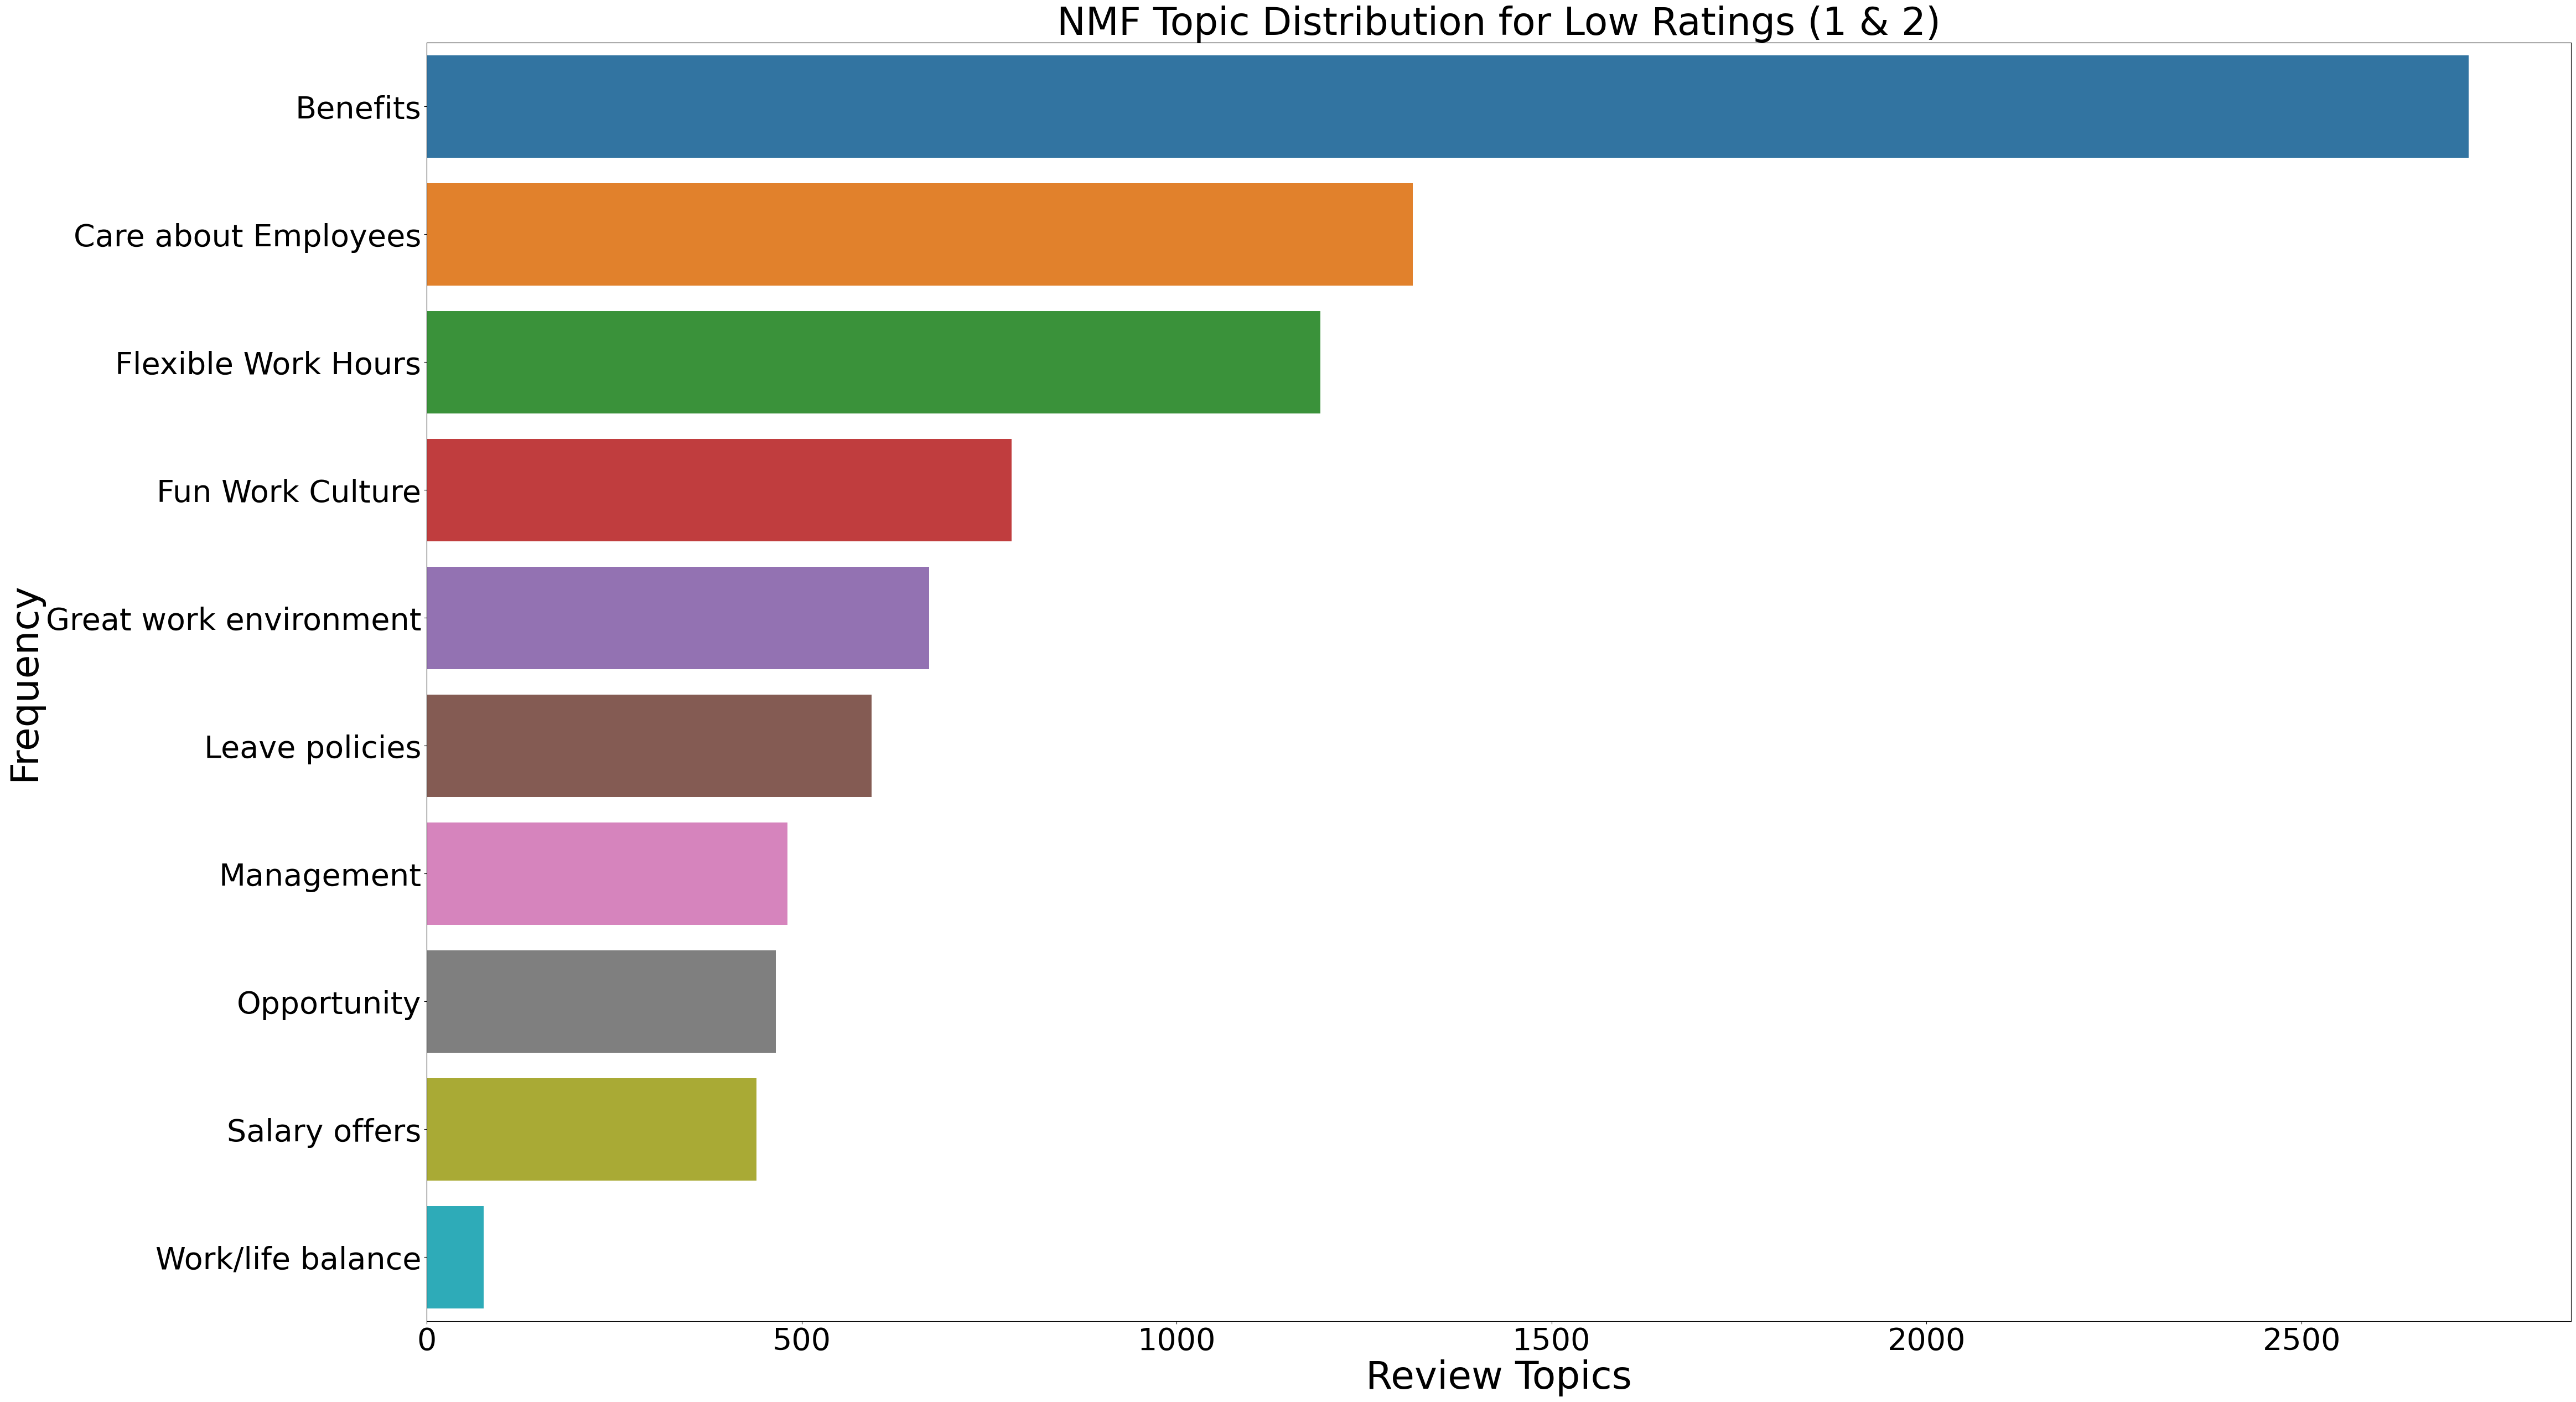

In [60]:
df_low_ratings = reviews_select.loc[(reviews_select['overall-ratings']==1) | (reviews_select['overall-ratings']==2)]
nmf_low_x = df_low_ratings['nmf_topics'].value_counts()
nmf_low_y = nmf_low_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x=nmf_low_x, y=nmf_low_y.index)
plt.title("NMF Topic Distribution for Low Ratings (1 & 2)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Review Topics', fontsize=50)
plt.xticks(fontsize=40)

### Since we have many more positive reviews the topics derived via NMF will be much more accurate.

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

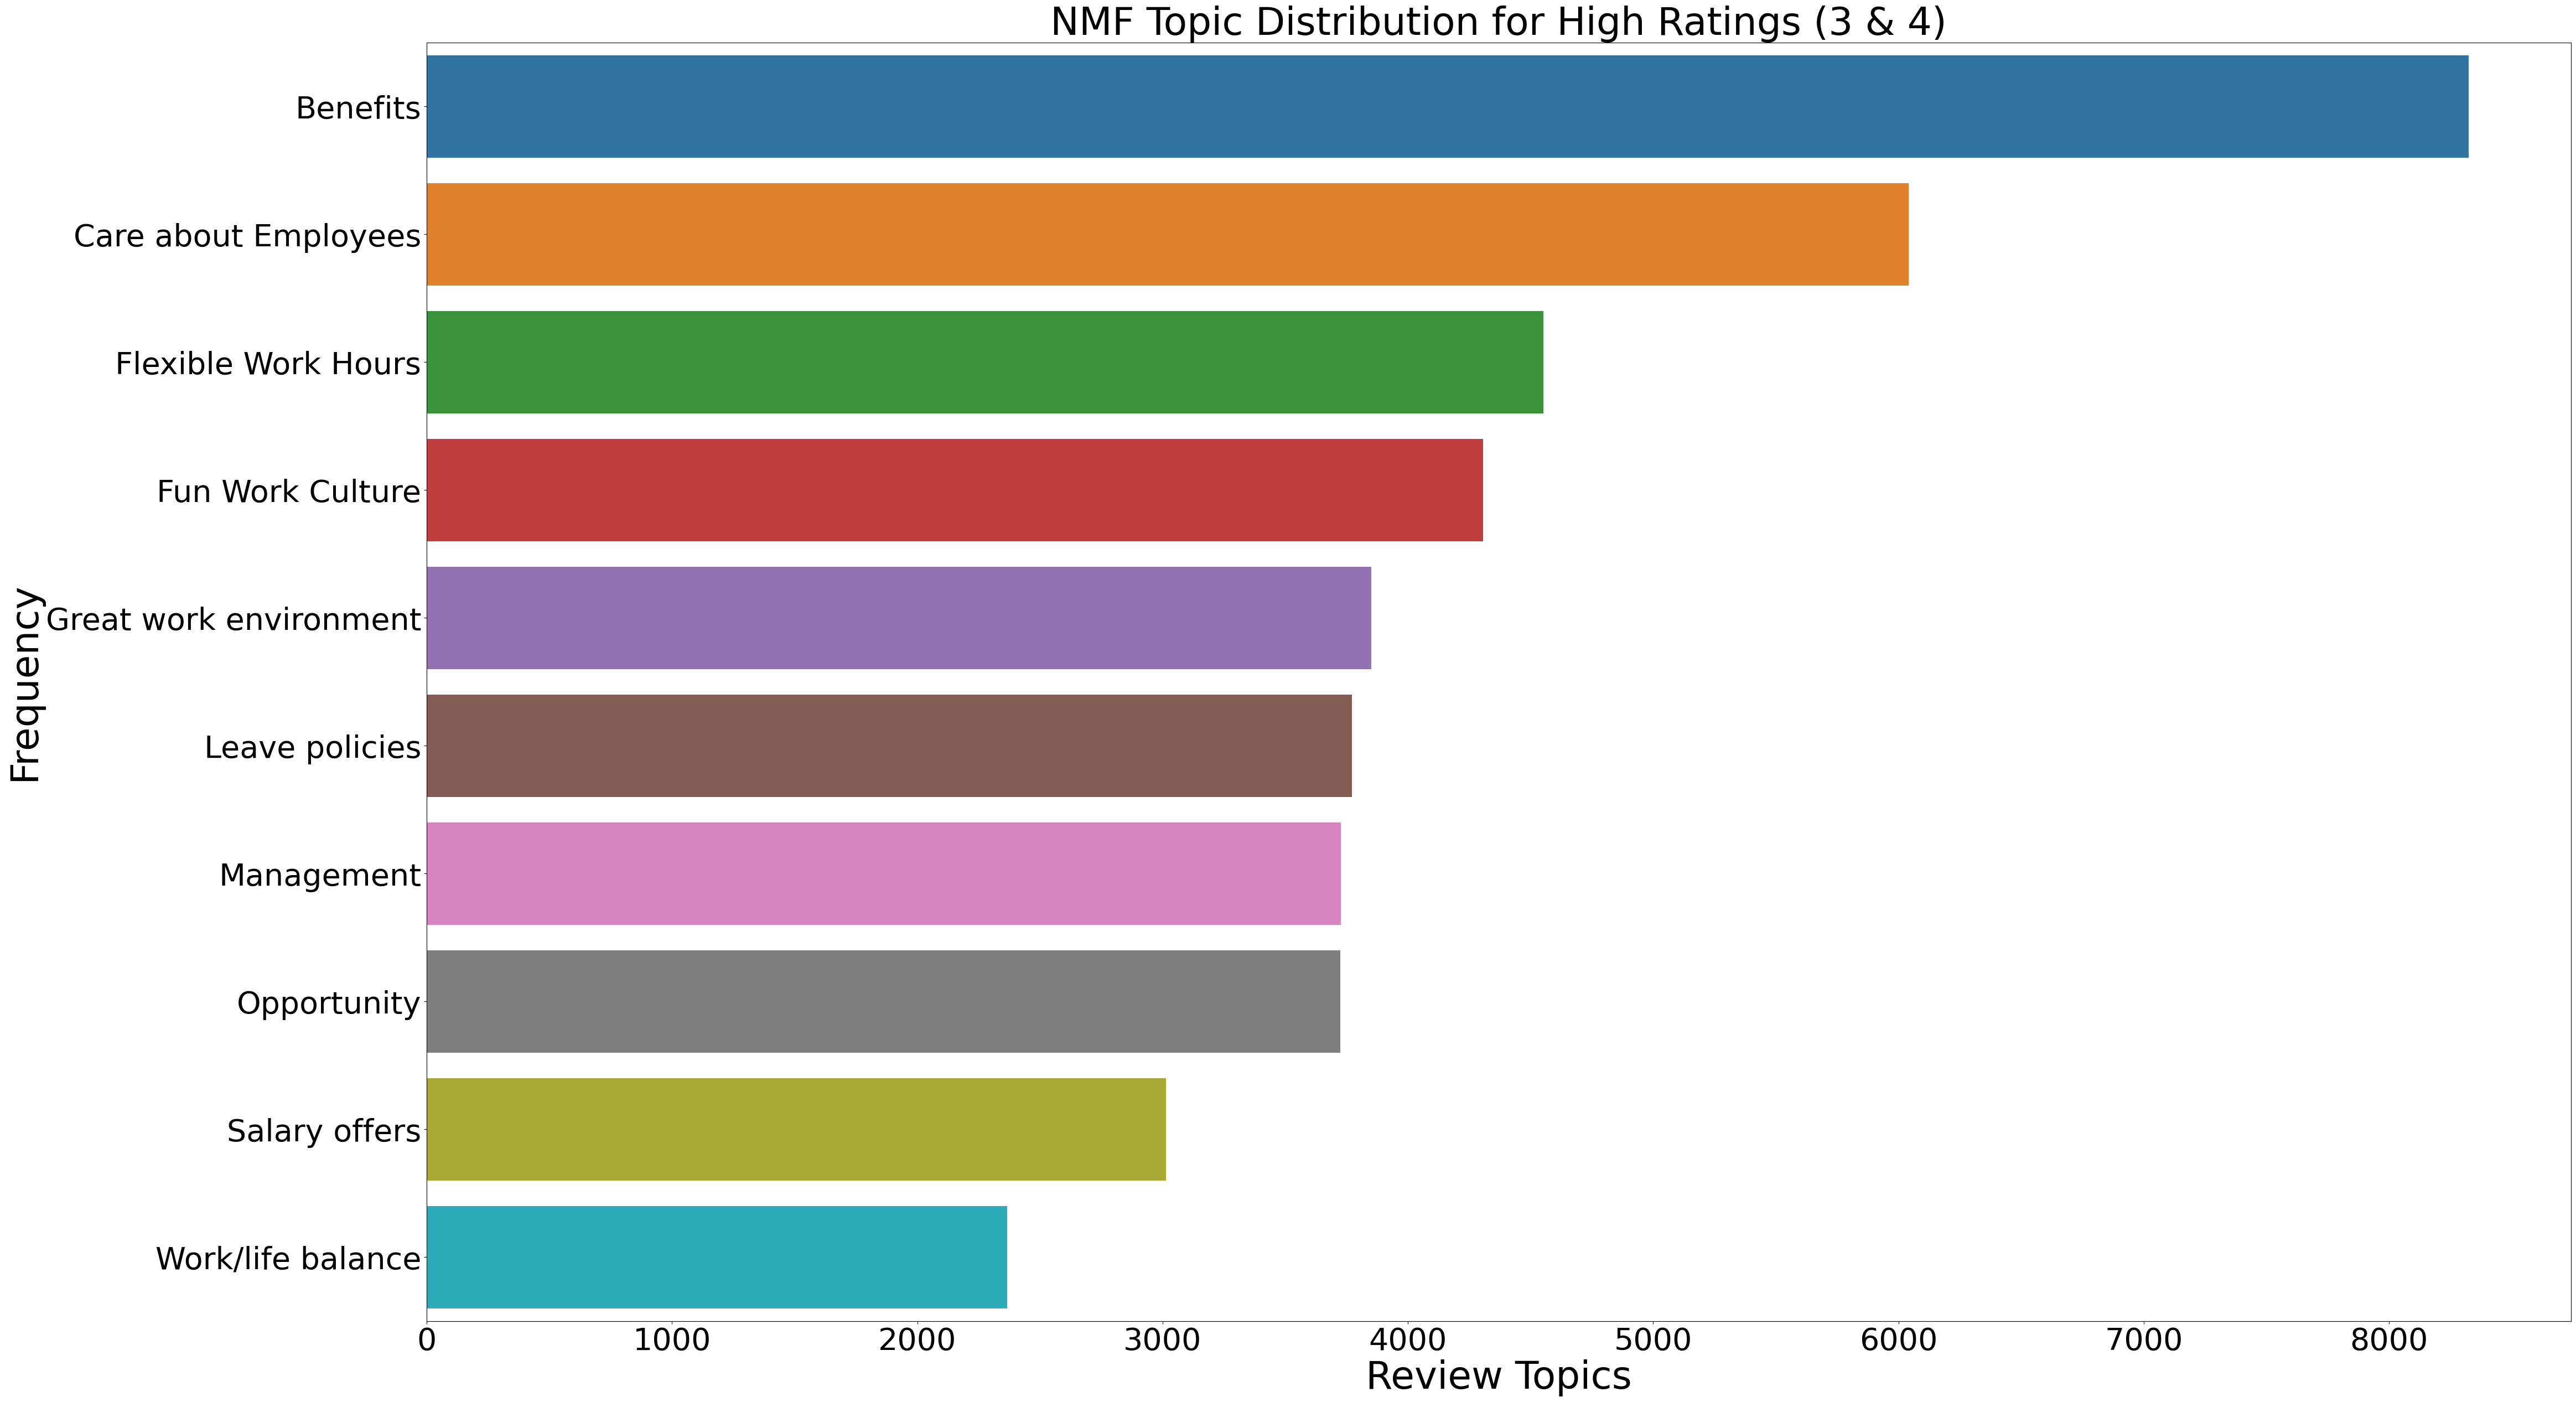

In [61]:
df_high_ratings = reviews_select.loc[(reviews_select['overall-ratings']==4) | (reviews_select['overall-ratings']==5)]
nmf_high_x = df_high_ratings['nmf_topics'].value_counts()
nmf_high_y = nmf_high_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x=nmf_high_x, y=nmf_high_y.index)
plt.title("NMF Topic Distribution for High Ratings (3 & 4)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Review Topics', fontsize=50)
plt.xticks(fontsize=40)